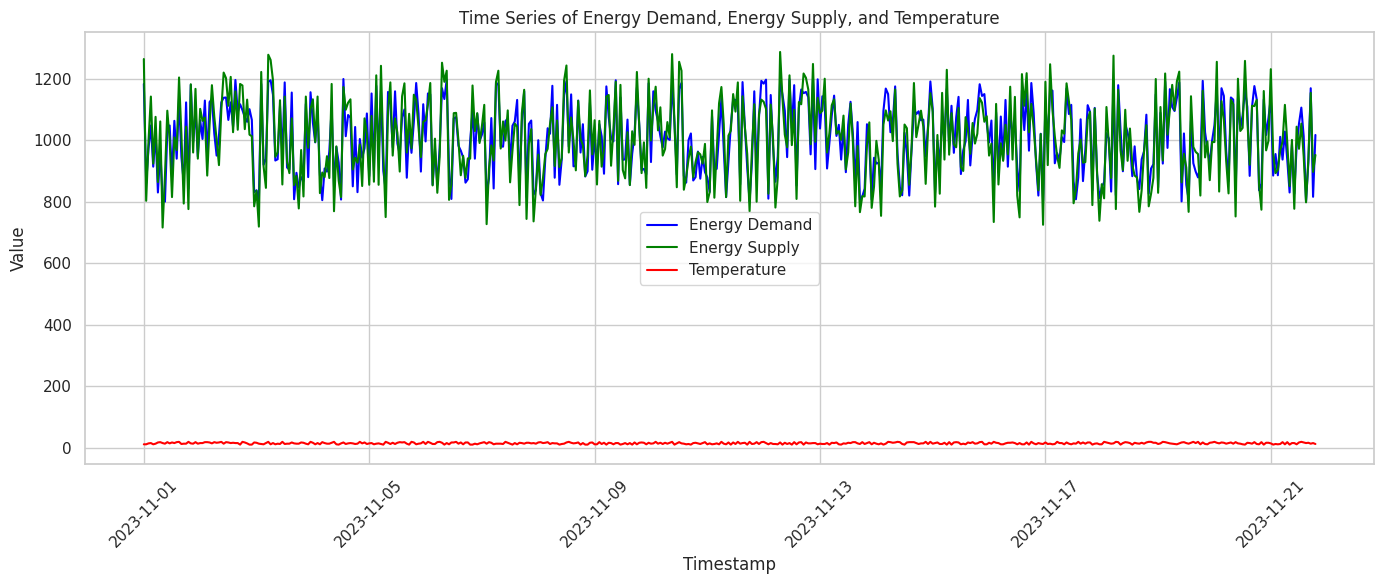

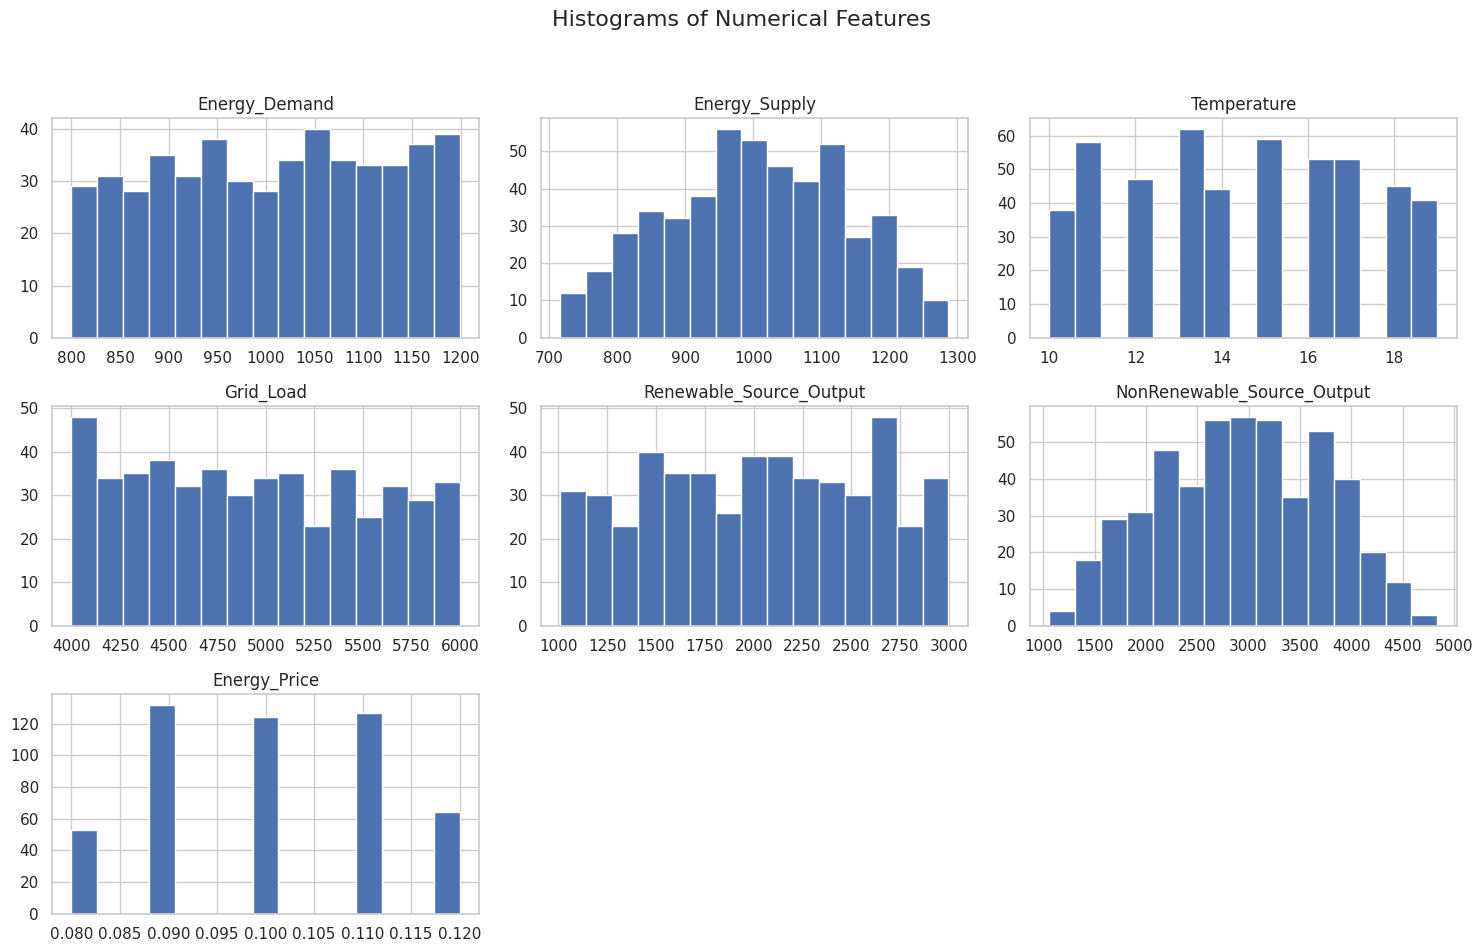

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

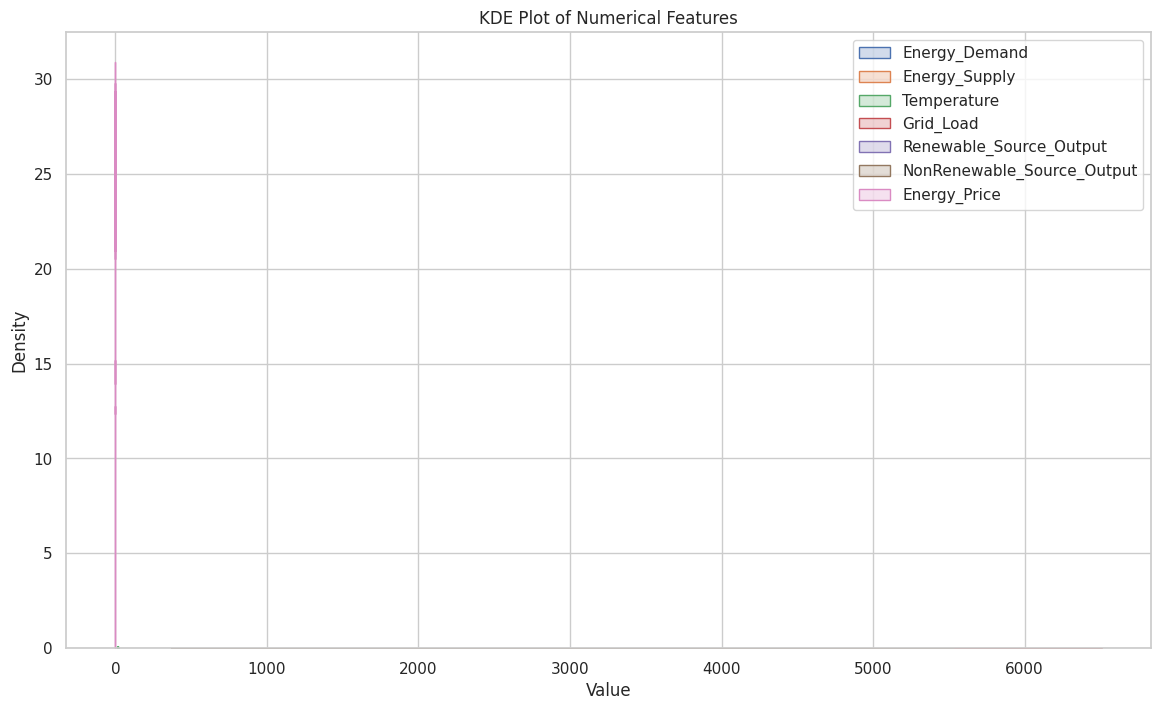

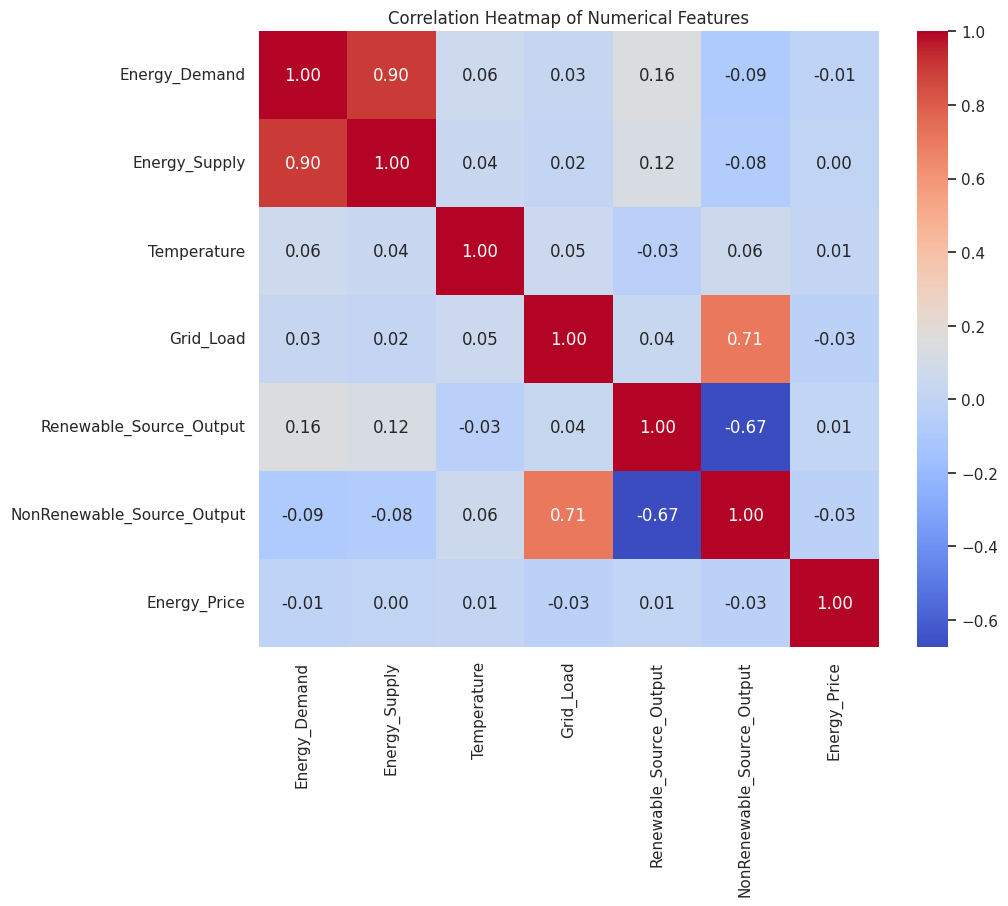

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

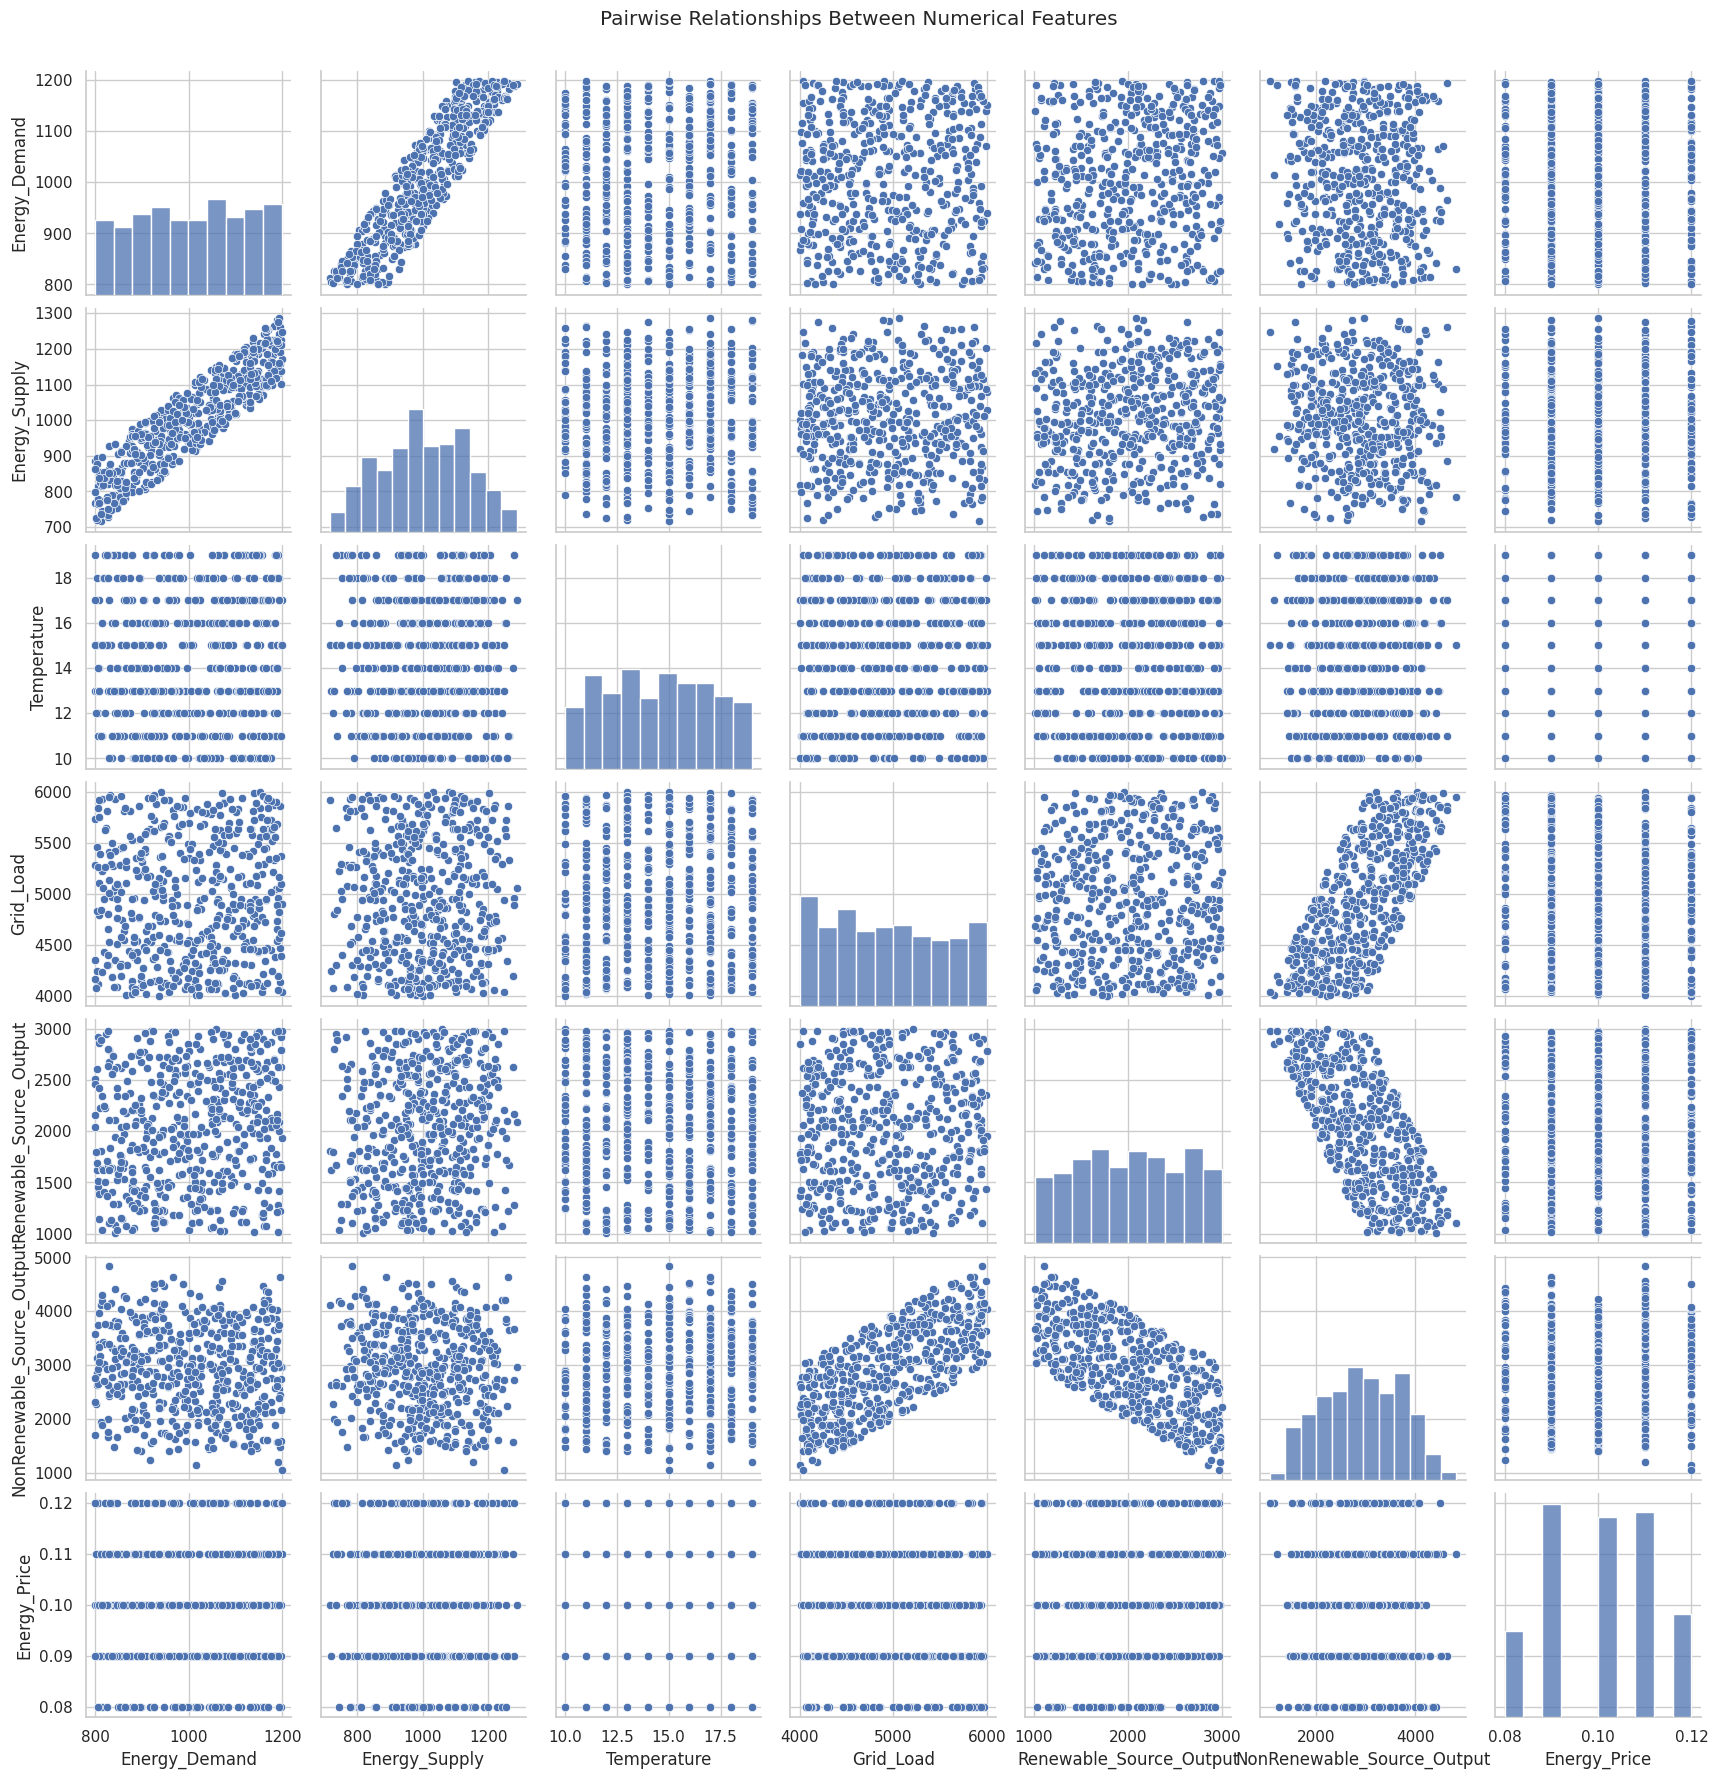

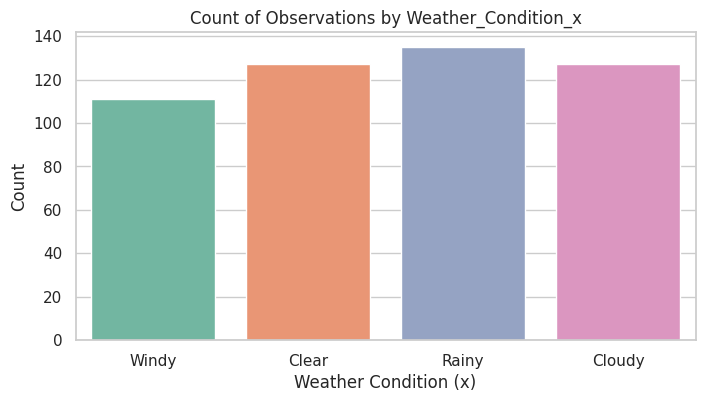

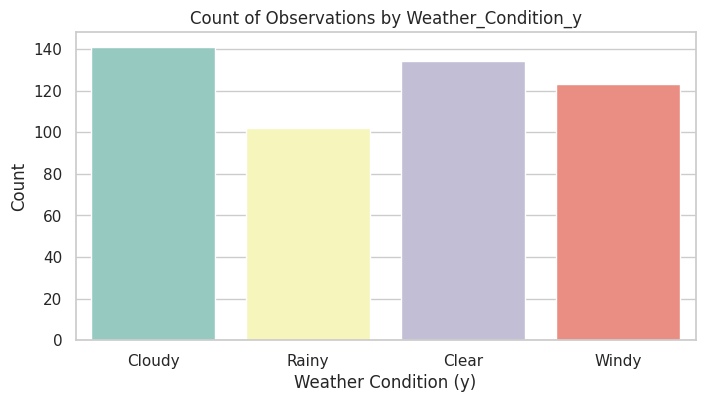

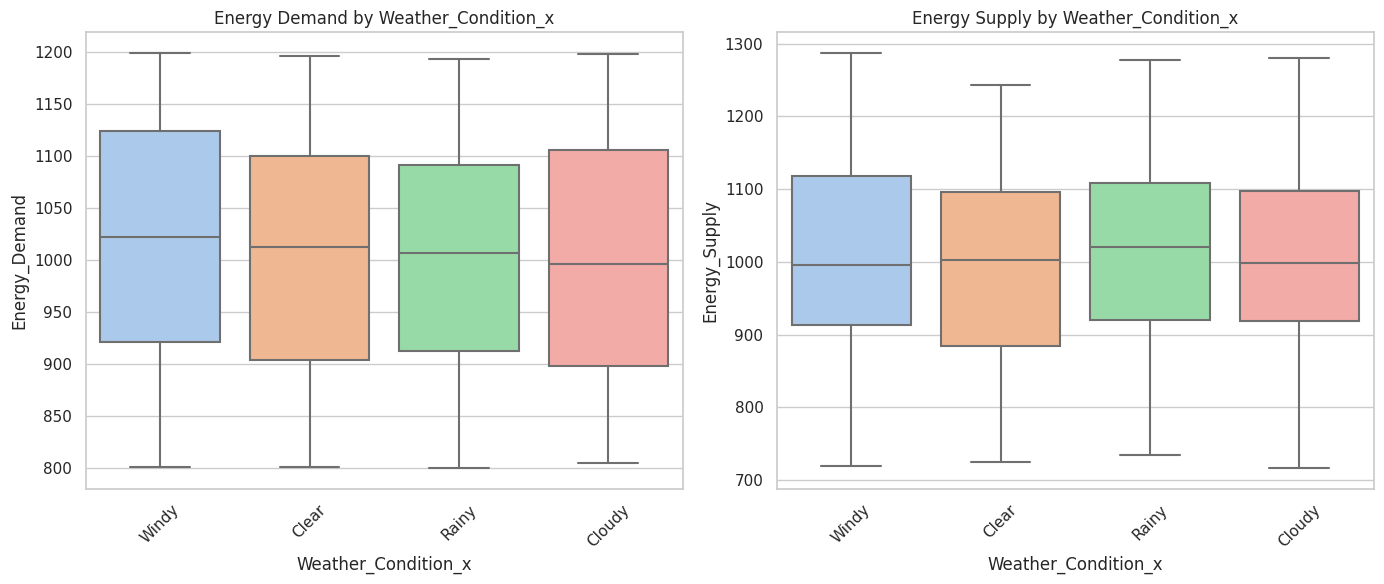

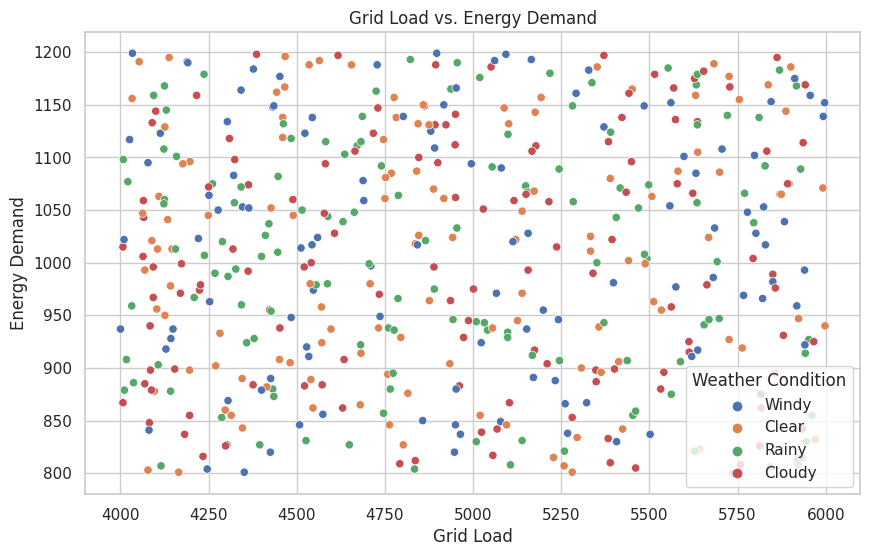

<ipython-input-1-db6e313cc8a5>:164: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Energy Price')


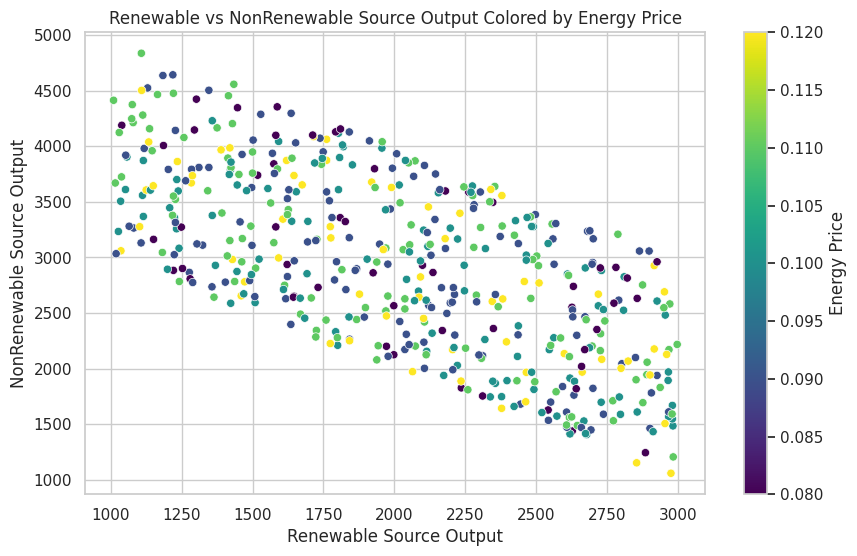

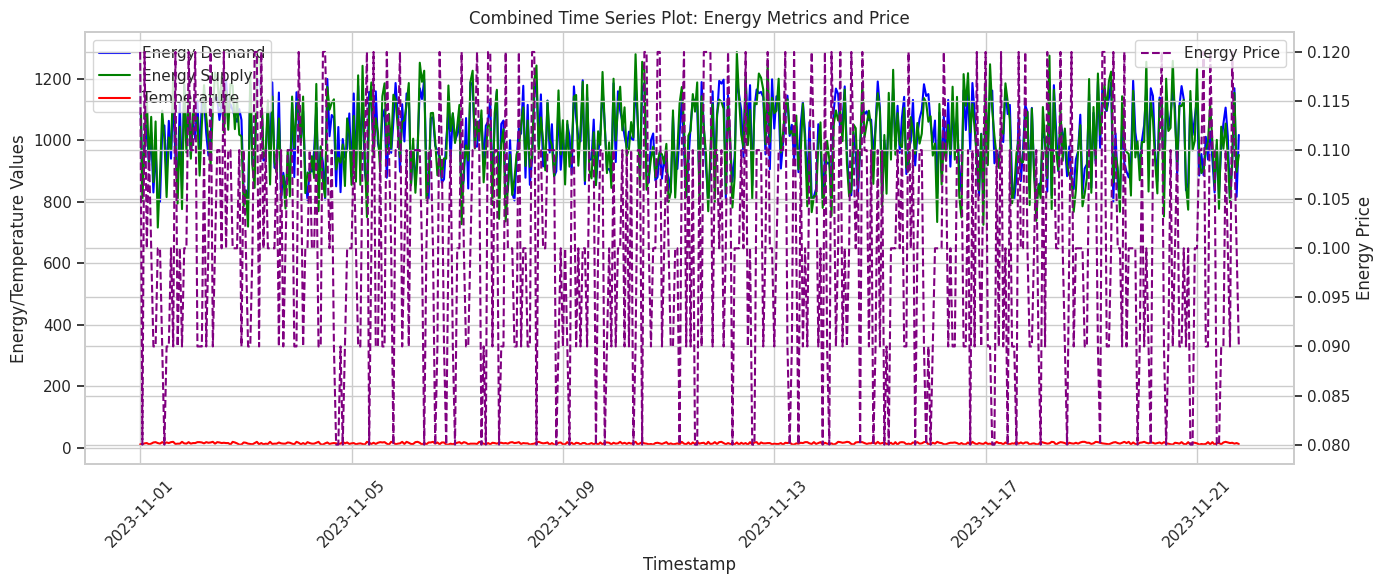

In [1]:
#the basics
import pandas as pd, numpy as np
import math, json, gc, random, os, sys
from matplotlib import pyplot as plt
from tqdm import tqdm

#tensorflow deep learning basics
import tensorflow as tf
#import tensorflow_addons as tfa

import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer,Input,Activation, Lambda,Conv1D, SpatialDropout1D,Convolution1D,Dense,add,GlobalMaxPooling1D,GlobalAveragePooling1D,concatenate,Embedding
from tensorflow.keras.models import Model
from typing import List, Tuple
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split, KFold,  StratifiedKFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, ReLU, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, Add


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure plots are rendered inline (if using a Jupyter notebook)
%matplotlib inline

# -------------------------------
# 1. Load and Prepare the Dataset
# -------------------------------
file_path = "/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv"
df = pd.read_csv(file_path)

# Convert 'Timestamp' column to datetime for time-series analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# List of numerical columns for later use
numerical_cols = ['Energy_Demand', 'Energy_Supply', 'Temperature', 'Grid_Load',
                  'Renewable_Source_Output', 'NonRenewable_Source_Output', 'Energy_Price']

# Set a common plot style
sns.set(style="whitegrid")

# -------------------------------
# 2. Time Series Analysis
# -------------------------------
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['Energy_Demand'], label='Energy Demand', color='blue')
plt.plot(df['Timestamp'], df['Energy_Supply'], label='Energy Supply', color='green')
plt.plot(df['Timestamp'], df['Temperature'], label='Temperature', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of Energy Demand, Energy Supply, and Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Distribution Analysis: Histograms & KDE Plots
# -------------------------------
# Histograms for numerical features
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# KDE plots for numerical features (using fill=True instead of the deprecated shade=True)
plt.figure(figsize=(14, 8))
for col in numerical_cols:
    sns.kdeplot(data=df, x=col, fill=True, label=col)
plt.title('KDE Plot of Numerical Features')
plt.xlabel('Value')
plt.legend()
plt.show()

# -------------------------------
# 4. Correlation Analysis: Heatmap and Pairplot
# -------------------------------
# Compute correlation matrix for numerical columns
corr = df[numerical_cols].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Pairplot for pairwise relationships (this may take a moment)
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()

# -------------------------------
# 5. Categorical Analysis: Weather Conditions
# -------------------------------
# Count plot for Weather_Condition_x
plt.figure(figsize=(8, 4))
sns.countplot(x='Weather_Condition_x', data=df, palette='Set2')
plt.title('Count of Observations by Weather_Condition_x')
plt.xlabel('Weather Condition (x)')
plt.ylabel('Count')
plt.show()

# Count plot for Weather_Condition_y
plt.figure(figsize=(8, 4))
sns.countplot(x='Weather_Condition_y', data=df, palette='Set3')
plt.title('Count of Observations by Weather_Condition_y')
plt.xlabel('Weather Condition (y)')
plt.ylabel('Count')
plt.show()

# Box plots to see how weather conditions affect energy demand and supply (using Weather_Condition_x)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Weather_Condition_x', y='Energy_Demand', data=df, palette='pastel')
plt.title('Energy Demand by Weather_Condition_x')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Weather_Condition_x', y='Energy_Supply', data=df, palette='pastel')
plt.title('Energy Supply by Weather_Condition_x')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# -------------------------------
# 6. Scatter Plots: Exploring Relationships
# -------------------------------
# Scatter plot: Grid Load vs. Energy Demand, colored by Weather_Condition_x
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Grid_Load', y='Energy_Demand', data=df, hue='Weather_Condition_x', palette='deep')
plt.title('Grid Load vs. Energy Demand')
plt.xlabel('Grid Load')
plt.ylabel('Energy Demand')
plt.legend(title='Weather Condition')
plt.show()

# Scatter plot: Renewable vs NonRenewable Source Output, colored by Energy Price.
# Since sns.scatterplot does not return a mappable for a colorbar, we create one manually.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Renewable_Source_Output',
    y='NonRenewable_Source_Output',
    data=df,
    hue='Energy_Price',
    palette='viridis',
    legend=False  # We'll add our own colorbar
)
plt.title('Renewable vs NonRenewable Source Output Colored by Energy Price')
plt.xlabel('Renewable Source Output')
plt.ylabel('NonRenewable Source Output')

# Create a normalization and ScalarMappable for the colorbar
norm = plt.Normalize(df['Energy_Price'].min(), df['Energy_Price'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Required for older versions of matplotlib
cbar = plt.colorbar(sm, label='Energy Price')
plt.show()

# -------------------------------
# 7. Combined Time Series Plot with Dual Y-axis
# -------------------------------
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot energy metrics on the primary y-axis
ax1.plot(df['Timestamp'], df['Energy_Demand'], label='Energy Demand', color='blue')
ax1.plot(df['Timestamp'], df['Energy_Supply'], label='Energy Supply', color='green')
ax1.plot(df['Timestamp'], df['Temperature'], label='Temperature', color='red')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Energy/Temperature Values')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Plot Energy Price on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['Timestamp'], df['Energy_Price'], label='Energy Price', color='purple', linestyle='--')
ax2.set_ylabel('Energy Price')
ax2.legend(loc='upper right')

plt.title("Combined Time Series Plot: Energy Metrics and Price")
plt.tight_layout()
plt.show()



In [2]:
import pandas as pd

# Specify the path to your dataset
file_path = "/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print information about the DataFrame (such as column names, non-null counts, and data types)
print("Data Information:")
print(df.info())

# Print the first 5 rows of the DataFrame
print("\nFirst 5 Rows of Data:")
print(df.head())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   500 non-null    object 
 1   Energy_Demand               500 non-null    int64  
 2   Energy_Supply               500 non-null    int64  
 3   Temperature                 500 non-null    int64  
 4   Weather_Condition_x         500 non-null    object 
 5   Grid_Load                   500 non-null    int64  
 6   Renewable_Source_Output     500 non-null    int64  
 7   NonRenewable_Source_Output  500 non-null    int64  
 8   Energy_Price                500 non-null    float64
 9   Weather_Condition_y         500 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB
None

First 5 Rows of Data:
             Timestamp  Energy_Demand  Energy_Supply  Temperature  \
0  2023-11-01 00:00:00           

In [3]:
# Check unique values in both columns
print(df[['Weather_Condition_x', 'Weather_Condition_y']].drop_duplicates())

# Compare if they are the same
print((df['Weather_Condition_x'] == df['Weather_Condition_y']).value_counts())


   Weather_Condition_x Weather_Condition_y
0                Windy              Cloudy
1                Clear               Rainy
3                Rainy               Rainy
4                Rainy               Clear
5                Clear               Windy
6                Windy               Clear
8               Cloudy               Windy
9                Rainy               Windy
10              Cloudy               Clear
13               Clear              Cloudy
15              Cloudy              Cloudy
17              Cloudy               Rainy
21               Windy               Rainy
24               Clear               Clear
29               Windy               Windy
47               Rainy              Cloudy
False    375
True     125
Name: count, dtype: int64


In [4]:
import pandas as pd

# Specify the path to your dataset
file_path = "/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print basic DataFrame information
print("Data Information:")
df.info()  # This prints the info to stdout

# Print the first 5 rows of the DataFrame
print("\nFirst 5 Rows of Data:")
print(df.head())

# Convert the Timestamp column to datetime format for easier time-based operations
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("\nData Types After Converting Timestamp:")
print(df.dtypes)

# Print summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# If you want to inspect the weather condition columns, you can print unique values
print("\nUnique values in 'Weather_Condition_x':")
print(df['Weather_Condition_x'].unique())

print("\nUnique values in 'Weather_Condition_y':")
print(df['Weather_Condition_y'].unique())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   500 non-null    object 
 1   Energy_Demand               500 non-null    int64  
 2   Energy_Supply               500 non-null    int64  
 3   Temperature                 500 non-null    int64  
 4   Weather_Condition_x         500 non-null    object 
 5   Grid_Load                   500 non-null    int64  
 6   Renewable_Source_Output     500 non-null    int64  
 7   NonRenewable_Source_Output  500 non-null    int64  
 8   Energy_Price                500 non-null    float64
 9   Weather_Condition_y         500 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB

First 5 Rows of Data:
             Timestamp  Energy_Demand  Energy_Supply  Temperature  \
0  2023-11-01 00:00:00           1183 

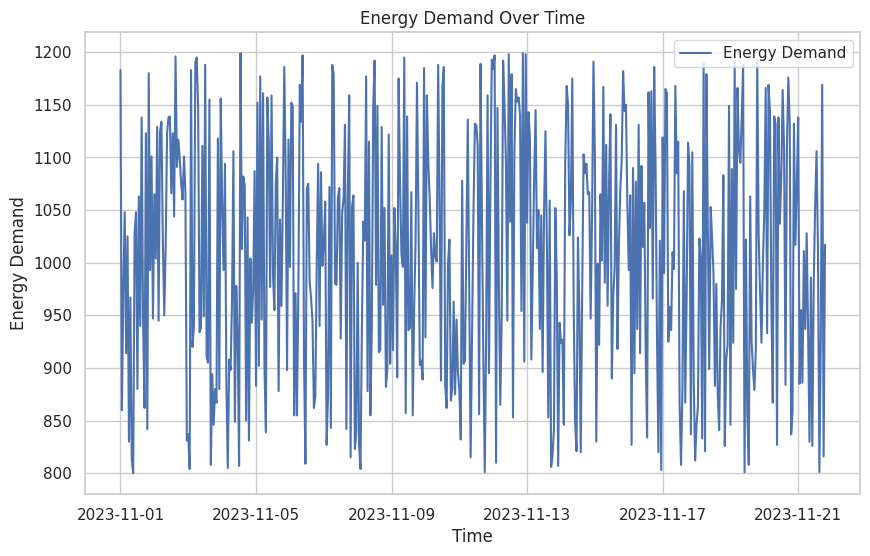

In [5]:
import matplotlib.pyplot as plt

# Plot Energy Demand over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Energy_Demand'], label='Energy Demand')
plt.xlabel('Time')
plt.ylabel('Energy Demand')
plt.title('Energy Demand Over Time')
plt.legend()
plt.show()


# 1. iTBG-Net: A Hybrid Deep Learning Model Combining Temporal Convolutional Networks and BiGRU

In [6]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import deque
import random
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, Add, Dropout
import time

# ===========================
# 1. Data Loading and Preprocessing
# ===========================
data = pd.read_csv('/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv')

# Convert Timestamp to datetime and sort
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values('Timestamp', inplace=True)

# Select the 'Energy_Demand' feature and normalize it
features = ['Energy_Demand']
scaler = MinMaxScaler()
data_features = scaler.fit_transform(data[features].values)

sequence_length = 48
prediction_length = 48

# Create sequences and labels using a sliding window approach.
# Each sequence (input) is of length 'sequence_length' and its corresponding label (target) is the next 'prediction_length' hours.
sequences, labels = [], []
for i in range(len(data_features) - sequence_length - prediction_length + 1):
    seq = data_features[i:i + sequence_length]
    label = data_features[i + sequence_length:i + sequence_length + prediction_length]
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels).astype(np.float32)
total_samples = len(sequences)

# Separate training and forecasting data:
# Training: sequences 0 to total_samples-2
# Forecasting (held-out): the last sequence (total_samples-1)
training_sequences = sequences[:-1]
training_labels = labels[:-1]
forecast_sequence = sequences[-1]
forecast_label = labels[-1]

# ===========================
# Print Dataset & Split Summary
# ===========================
print("===== Dataset & Split Summary =====")
print(f"Total dataset: {total_samples} sequences, covering {len(data)} hours.\n")

if total_samples > 1:
    total_training_samples = len(training_sequences)  # equals total_samples - 1
    # Training Input: the historical period used as input for training.
    train_input_start_time = data['Timestamp'].iloc[0]
    train_input_end_time = data['Timestamp'].iloc[total_training_samples - 1 + sequence_length - 1]
    # Training Targets: the corresponding future periods (ground truth) the model learns to predict.
    train_label_start_time = data['Timestamp'].iloc[sequence_length]
    train_label_end_time = data['Timestamp'].iloc[total_training_samples - 1 + sequence_length + prediction_length - 1]
    # Held-out Forecasting Data: the last sequence is reserved exclusively for final prediction.
    forecast_seq_index = total_samples - 1
    forecast_label_start_time = data['Timestamp'].iloc[forecast_seq_index + sequence_length]
    forecast_label_end_time = data['Timestamp'].iloc[forecast_seq_index + sequence_length + prediction_length - 1]
    
    print("Training Data:")
    print(f"  - Input Hours (sequences 0 to {total_training_samples - 1}):")
    print(f"    from {train_input_start_time} to {train_input_end_time}")
    print(f"  - Target Hours (for sequences 0 to {total_training_samples - 1}):")
    print(f"    from {train_label_start_time} to {train_label_end_time}\n")
    
    print("Held-out Forecasting Data:")
    print(f"  - Forecasting Hours (sequence {forecast_seq_index}):")
    print(f"    from {forecast_label_start_time} to {forecast_label_end_time}\n")
    
    print("Note: The held-out forecasting sequence is reserved for final evaluation and is not used during training.")
    print("      In each training update, a 10% validation split is used (preserving temporal order).\n")

# ===========================
# 2. Replay Buffer for Incremental Learning
# ===========================
class ReplayBuffer:
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)

    def add(self, sequence, label):
        self.buffer.append((sequence, label))

    def sample(self, batch_size):
        if len(self.buffer) < batch_size:
            return list(self.buffer)
        else:
            return random.sample(self.buffer, batch_size)

# ===========================
# 3. Define TCN Block and Build the Hybrid Model (TCN → GRU → LSTM)
# ===========================
def tcn_block(filters, kernel_size, dilation_rate, dropout):
    def block(x):
        # Residual connection via 1x1 convolution to match dimensions.
        res = Conv1D(filters, kernel_size=1, padding="same")(x)
        # First convolution branch with causal padding.
        conv1 = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation=None)(x)
        norm1 = BatchNormalization()(conv1)
        act1 = ReLU()(norm1)
        drop1 = Dropout(dropout)(act1)
        # Second convolution branch with causal padding.
        conv2 = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation=None)(drop1)
        norm2 = BatchNormalization()(conv2)
        act2 = ReLU()(norm2)
        drop2 = Dropout(dropout)(act2)
        # Skip connection: add the residual and the processed path.
        skip = Add()([res, drop2])
        return skip
    return block

def build_hybrid_model(seq_len=sequence_length, pred_len=prediction_length, dropout=0.4, hidden_dim=64):
    inputs = tf.keras.layers.Input(shape=(seq_len, len(features)))
    
    # Three TCN blocks with increasing dilation rates.
    tcn_output = tcn_block(hidden_dim, kernel_size=3, dilation_rate=1, dropout=dropout)(inputs)
    tcn_output = tcn_block(hidden_dim, kernel_size=3, dilation_rate=2, dropout=dropout)(tcn_output)
    #tcn_output = tcn_block(hidden_dim, kernel_size=3, dilation_rate=4, dropout=dropout)(tcn_output)
    
    # Bidirectional GRU layer.
    gru_output = tf.keras.layers.Bidirectional(
        tf.keras.layers.GRU(hidden_dim, dropout=dropout, return_sequences=True, kernel_initializer='orthogonal')
    )(tcn_output)
    
    # Bidirectional LSTM layer.
    lstm_output = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(hidden_dim, dropout=dropout, return_sequences=True, kernel_initializer='orthogonal')
    )(gru_output)
    
    # Use the first 'prediction_length' time steps of the LSTM output for prediction.
    truncated = lstm_output[:, :pred_len, :]
    outputs = tf.keras.layers.Dense(1, activation='linear')(truncated)
    
    # Compile the model with Adam optimizer and mean squared error loss.
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse', tf.keras.metrics.MeanAbsolutePercentageError(name='mape')]
    )
    return model

# Build and visualize the model architecture.
hybrid_model_tcn_gru_lstm = build_hybrid_model()
hybrid_model_tcn_gru_lstm.summary()

tf.keras.utils.plot_model(
    hybrid_model_tcn_gru_lstm,
    to_file="hybrid_model_tcn_gru_lstm_architecture.png",
    show_shapes=True,
    show_layer_names=True
)

# ===========================
# 4. Incremental Online Training Loop with Per-Epoch Metrics
# ===========================
# Training configuration.
chunk_batch_size = 16         # Number of new samples per update (online chunk).
epochs_per_chunk =  100        # Epochs per update.
replay_sample_size = 32       # Number of samples to draw from replay buffer per update.

# Dictionaries to store per-epoch metrics.
metrics_history = {
    "epoch": [],
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []
}
epoch_times = []

replay_buffer = ReplayBuffer(max_size=1000)
global_epoch = 0

# Process only the training sequences (exclude the held-out forecasting sequence)
num_training_chunks = int(np.ceil(len(training_sequences) / chunk_batch_size))
print(f"Starting online incremental training over {num_training_chunks} chunks...")

for chunk_idx in range(0, len(training_sequences), chunk_batch_size):
    # Get new incoming data for this chunk.
    new_sequences = training_sequences[chunk_idx:chunk_idx + chunk_batch_size]
    new_labels = training_labels[chunk_idx:chunk_idx + chunk_batch_size]
    
    # Determine the time window for the new chunk.
    start_idx = chunk_idx
    end_idx = chunk_idx + new_sequences.shape[0] - 1 + sequence_length - 1
    start_time = data['Timestamp'].iloc[start_idx]
    end_time = data['Timestamp'].iloc[end_idx]
    print(f"\nChunk {chunk_idx//chunk_batch_size + 1}/{num_training_chunks} - New Data: "
          f"{new_sequences.shape[0]} samples covering hours from {start_time} to {end_time}")
    
    # Add new samples to the replay buffer.
    for seq, lbl in zip(new_sequences, new_labels):
        replay_buffer.add(seq, lbl)
    
    # Sample replay data for this update.
    replay_samples = replay_buffer.sample(replay_sample_size)
    replay_sequences, replay_labels = zip(*replay_samples)
    replay_sequences = np.array(replay_sequences)
    replay_labels = np.array(replay_labels)
    
    # Combine the new data with replay data to form a training mini-batch.
    train_sequences = np.vstack((new_sequences, replay_sequences))
    train_labels = np.vstack((new_labels, replay_labels))
    
    # Calculate training vs. validation split (using validation_split=0.1 in model.fit).
    total_train_samples = train_sequences.shape[0]
    num_test_samples = int(np.ceil(total_train_samples * 0.1))
    num_training_samples = total_train_samples - num_test_samples
    print(f"Combined training mini-batch: {total_train_samples} samples "
          f"({num_training_samples} for training, {num_test_samples} for validation).")
    
    # Train for a fixed number of epochs on this combined data.
    start_time_chunk = time.time()
    history = hybrid_model_tcn_gru_lstm.fit(
        train_sequences, train_labels,
        batch_size=chunk_batch_size,
        epochs=epochs_per_chunk,
        verbose=0,
        validation_split=0.1,
        shuffle=False  # Preserve temporal order for time series.
    )
    end_time_chunk = time.time()
    
    # Record per-epoch metrics for this chunk update.
    chunk_time = end_time_chunk - start_time_chunk
    avg_epoch_time = chunk_time / epochs_per_chunk
    for epoch in range(epochs_per_chunk):
        global_epoch += 1
        loss = history.history['loss'][epoch]
        val_loss = history.history['val_loss'][epoch]
        # Define "accuracy" as 1 - loss (for visualization purposes).
        acc = 1 - loss
        val_acc = 1 - val_loss
        metrics_history["epoch"].append(global_epoch)
        metrics_history["loss"].append(loss)
        metrics_history["val_loss"].append(val_loss)
        metrics_history["accuracy"].append(acc)
        metrics_history["val_accuracy"].append(val_acc)
        epoch_times.append(avg_epoch_time)
    
    print(f"Chunk {chunk_idx//chunk_batch_size + 1}/{num_training_chunks}: "
          f"Avg Loss={np.mean(history.history['loss']):.4f}, "
          f"Avg Val Loss={np.mean(history.history['val_loss']):.4f}, "
          f"Time for chunk={chunk_time:.2f}s")

# Save the trained model.
model_save_path = "hybrid_model_tcn_gru_lstm.h5"
hybrid_model_tcn_gru_lstm.save(model_save_path)
print(f"Model saved to {model_save_path}")



===== Dataset & Split Summary =====
Total dataset: 405 sequences, covering 500 hours.

Training Data:
  - Input Hours (sequences 0 to 403):
    from 2023-11-01 00:00:00 to 2023-11-19 18:00:00
  - Target Hours (for sequences 0 to 403):
    from 2023-11-03 00:00:00 to 2023-11-21 18:00:00

Held-out Forecasting Data:
  - Forecasting Hours (sequence 404):
    from 2023-11-19 20:00:00 to 2023-11-21 19:00:00

Note: The held-out forecasting sequence is reserved for final evaluation and is not used during training.
      In each training update, a 10% validation split is used (preserving temporal order).



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 48, 64)         │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 48, 64)         │            256 │ conv1d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 48, 64)         │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 48, 64)         │              0 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 48, 64)         │         12,352 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 48, 64)         │            256 │ conv1d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 48, 64)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 48, 64)         │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 48, 64)         │              0 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 48, 64)         │              0 │ conv1d[0][0],          │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 48, 64)         │         12,352 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 48, 64)         │            256 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 48, 64)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 48, 64)         │              0 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 48, 64)         │         12,352 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 48, 64)         │            256 │ conv1d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 191,489 (748.00 KB)

 Trainable params: 190,977 (746.00 KB)

 Non-trainable params: 512 (2.00 KB)

Starting online incremental training over 26 chunks...

Chunk 1/26 - New Data: 16 samples covering hours from 2023-11-01 00:00:00 to 2023-11-03 14:00:00
Combined training mini-batch: 32 samples (28 for training, 4 for validation).
Chunk 1/26: Avg Loss=0.0837, Avg Val Loss=0.1405, Time for chunk=18.29s

Chunk 2/26 - New Data: 16 samples covering hours from 2023-11-01 16:00:00 to 2023-11-04 06:00:00
Combined training mini-batch: 48 samples (43 for training, 5 for validation).
Chunk 2/26: Avg Loss=0.0304, Avg Val Loss=0.0660, Time for chunk=9.93s

Chunk 3/26 - New Data: 16 samples covering hours from 2023-11-02 08:00:00 to 2023-11-04 22:00:00
Combined training mini-batch: 48 samples (43 for training, 5 for validation).
Chunk 3/26: Avg Loss=0.0191, Avg Val Loss=0.0208, Time for chunk=9.59s

Chunk 4/26 - New Data: 16 samples covering hours from 2023-11-03 00:00:00 to 2023-11-05 14:00:00
Combined training mini-batch: 48 samples (43 for training, 5 for validation).
Chunk 4/26: Avg Loss=0.0140

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


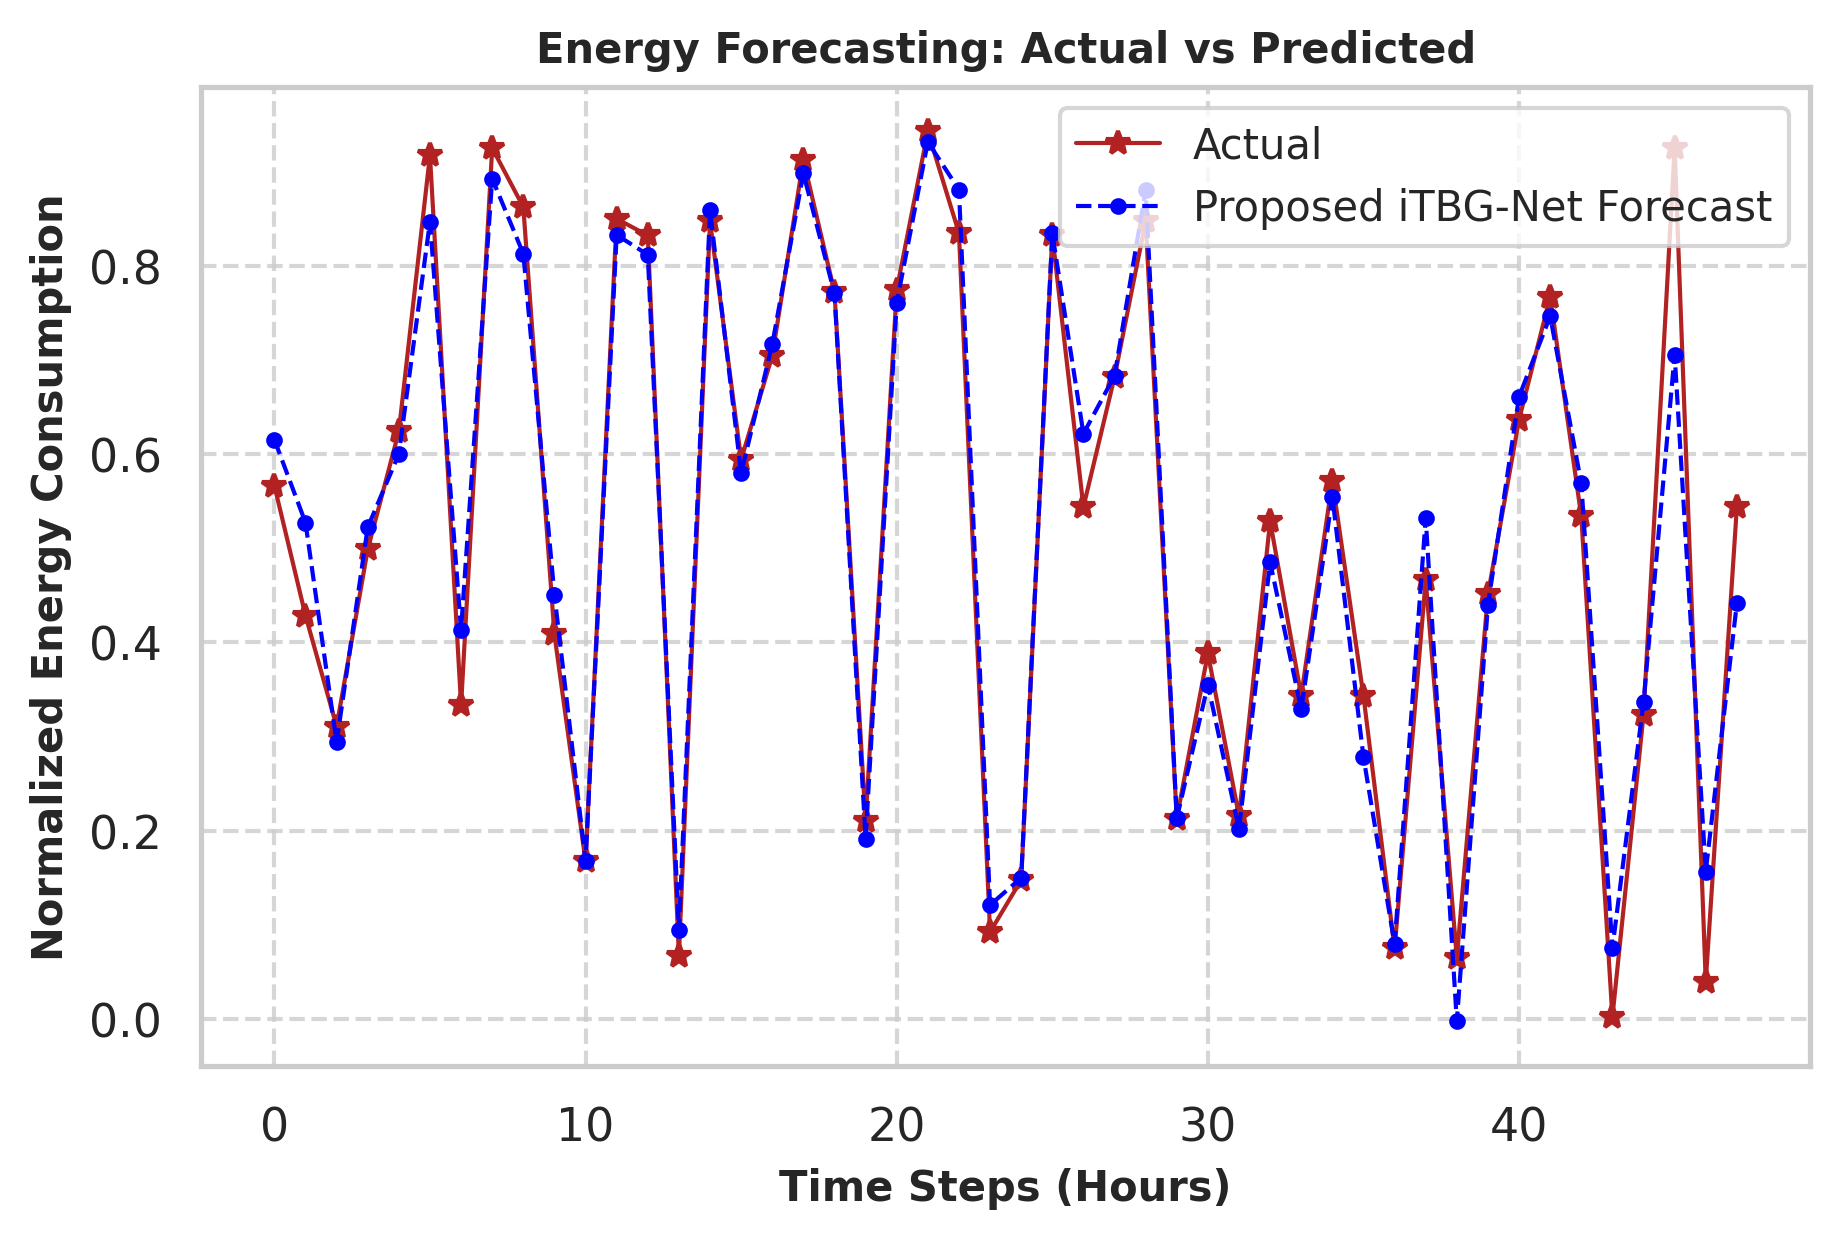

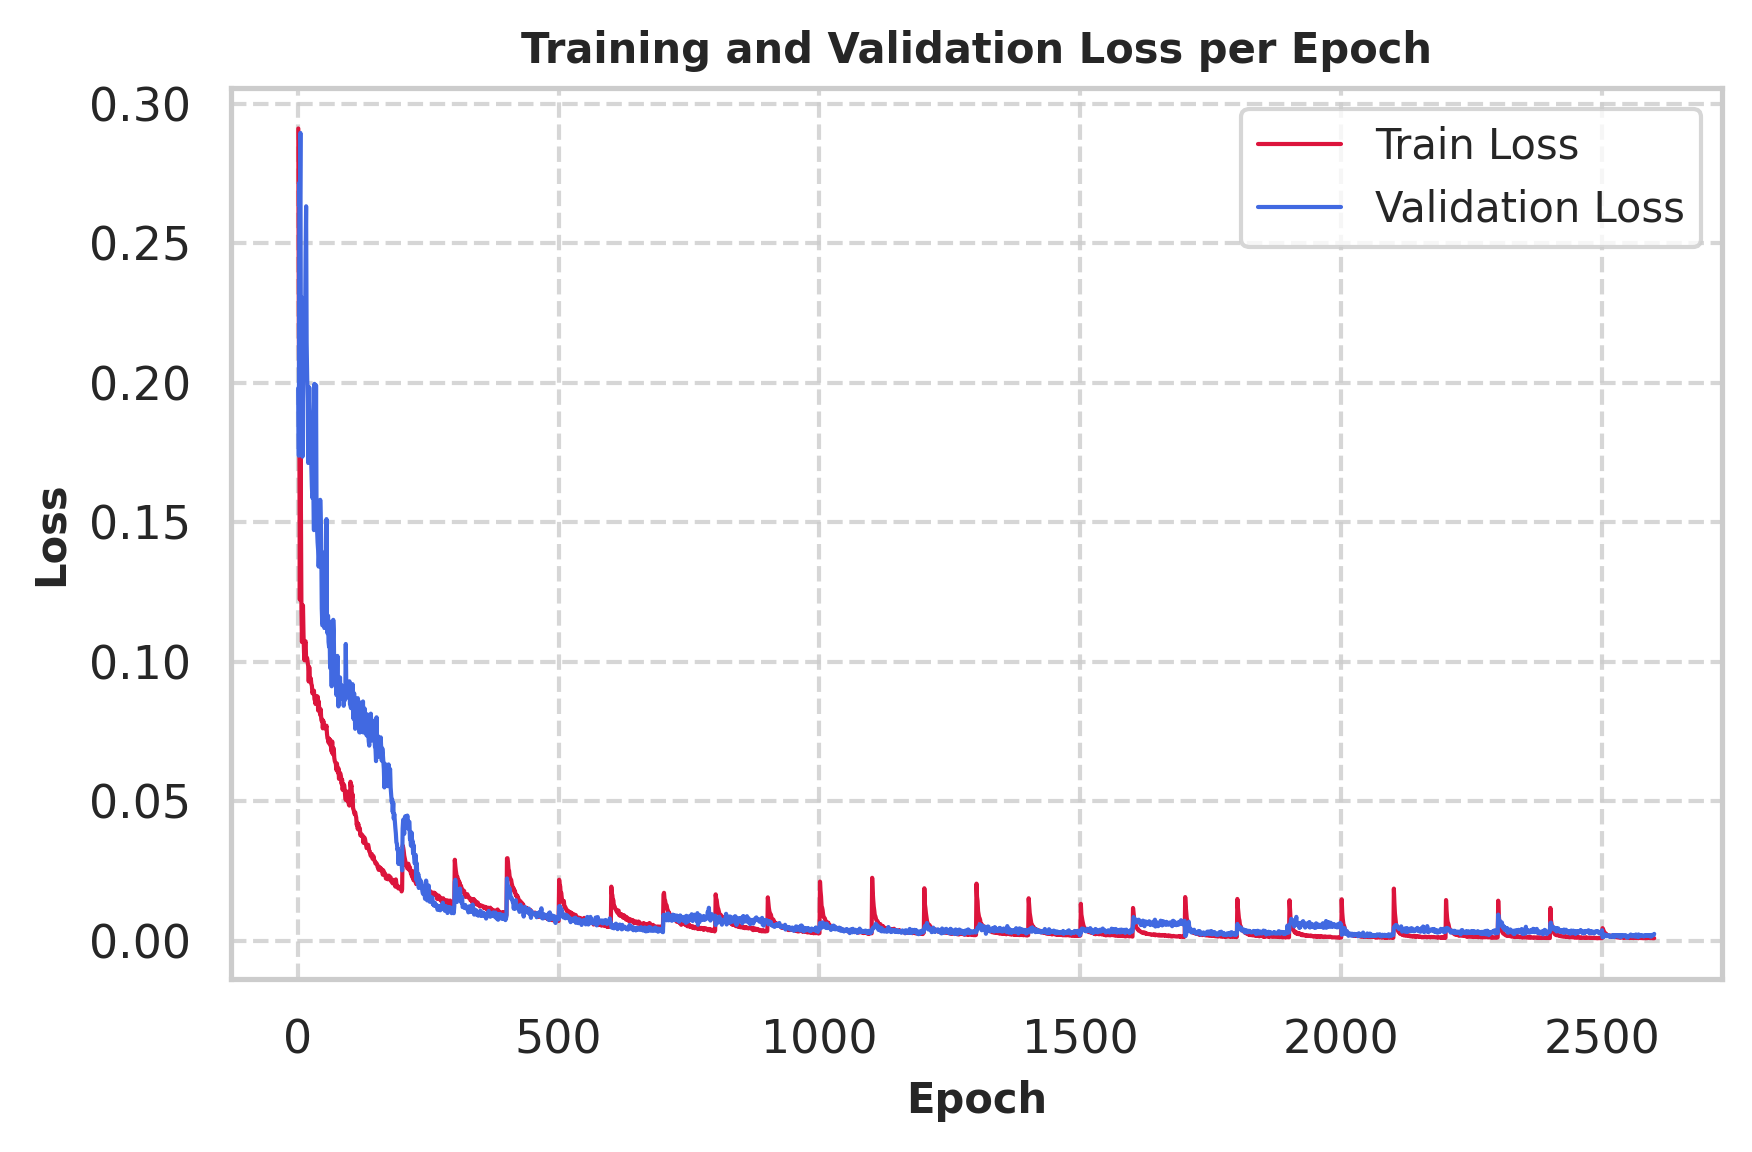

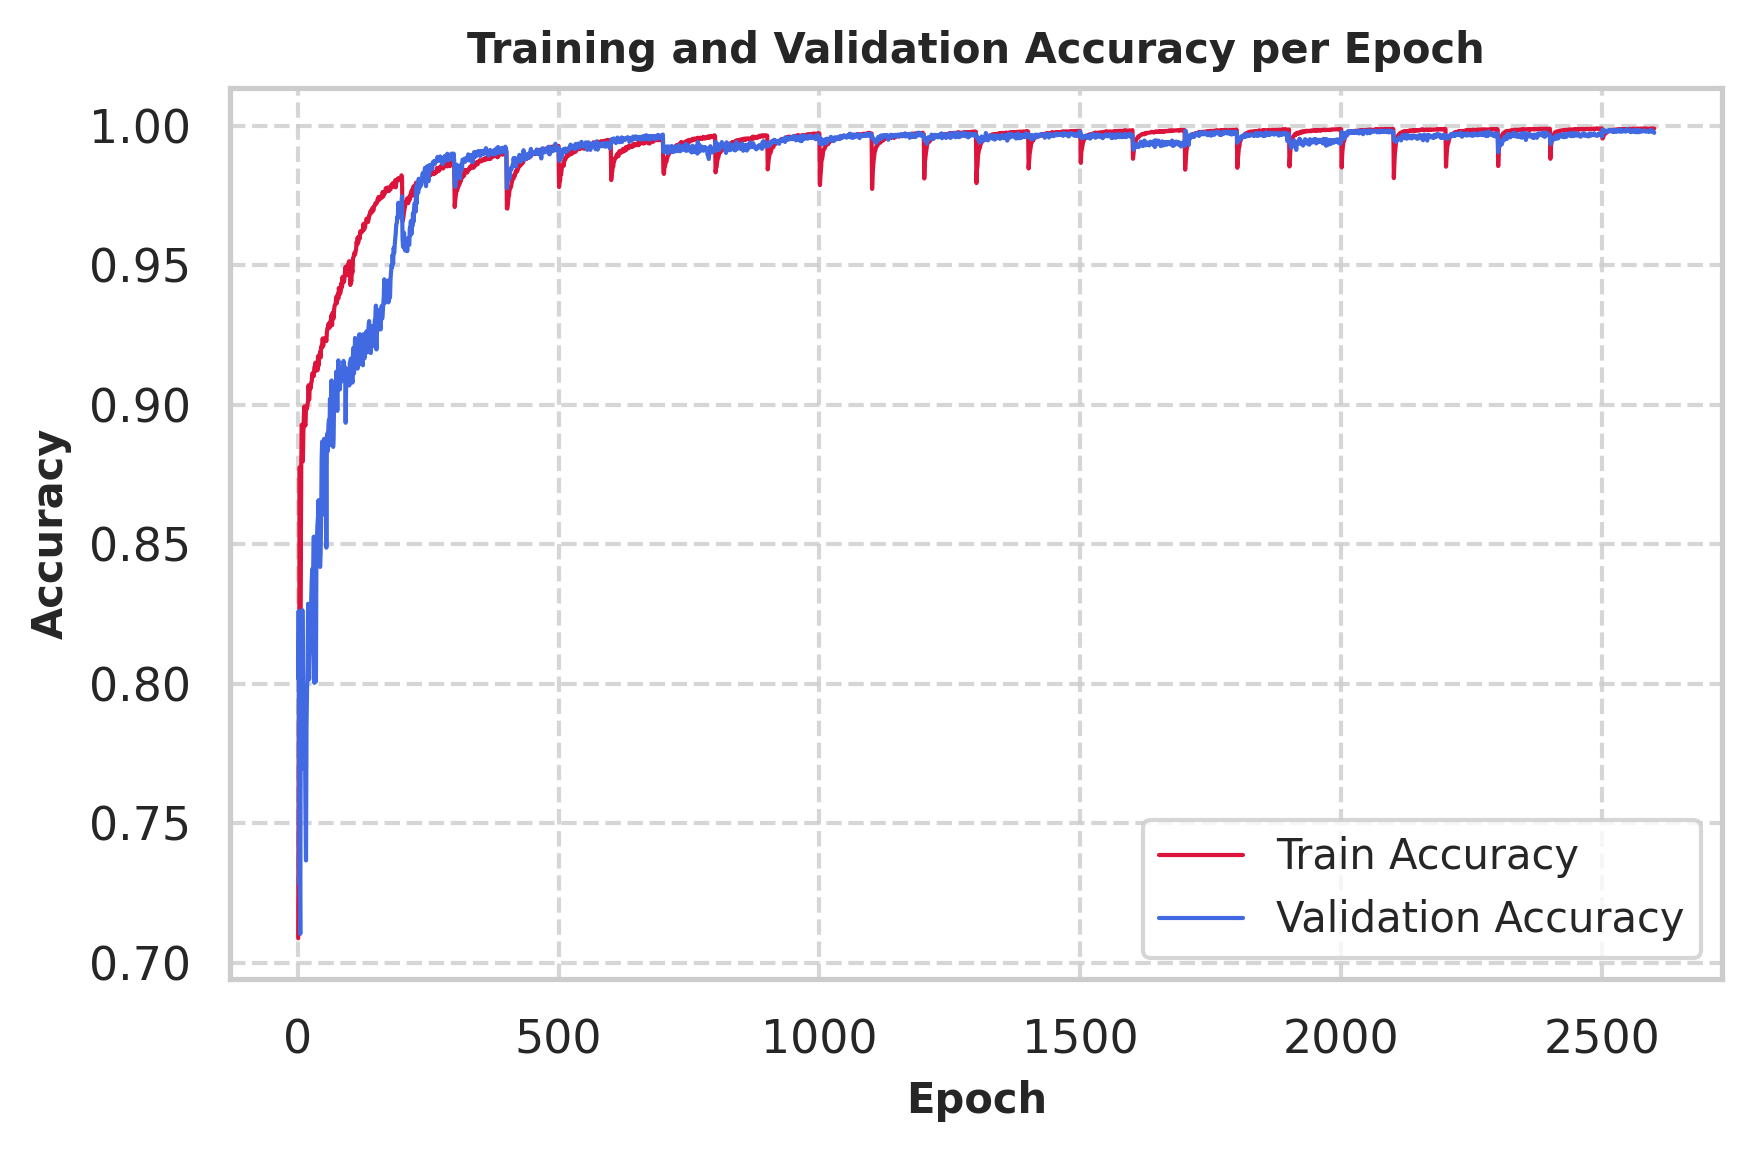

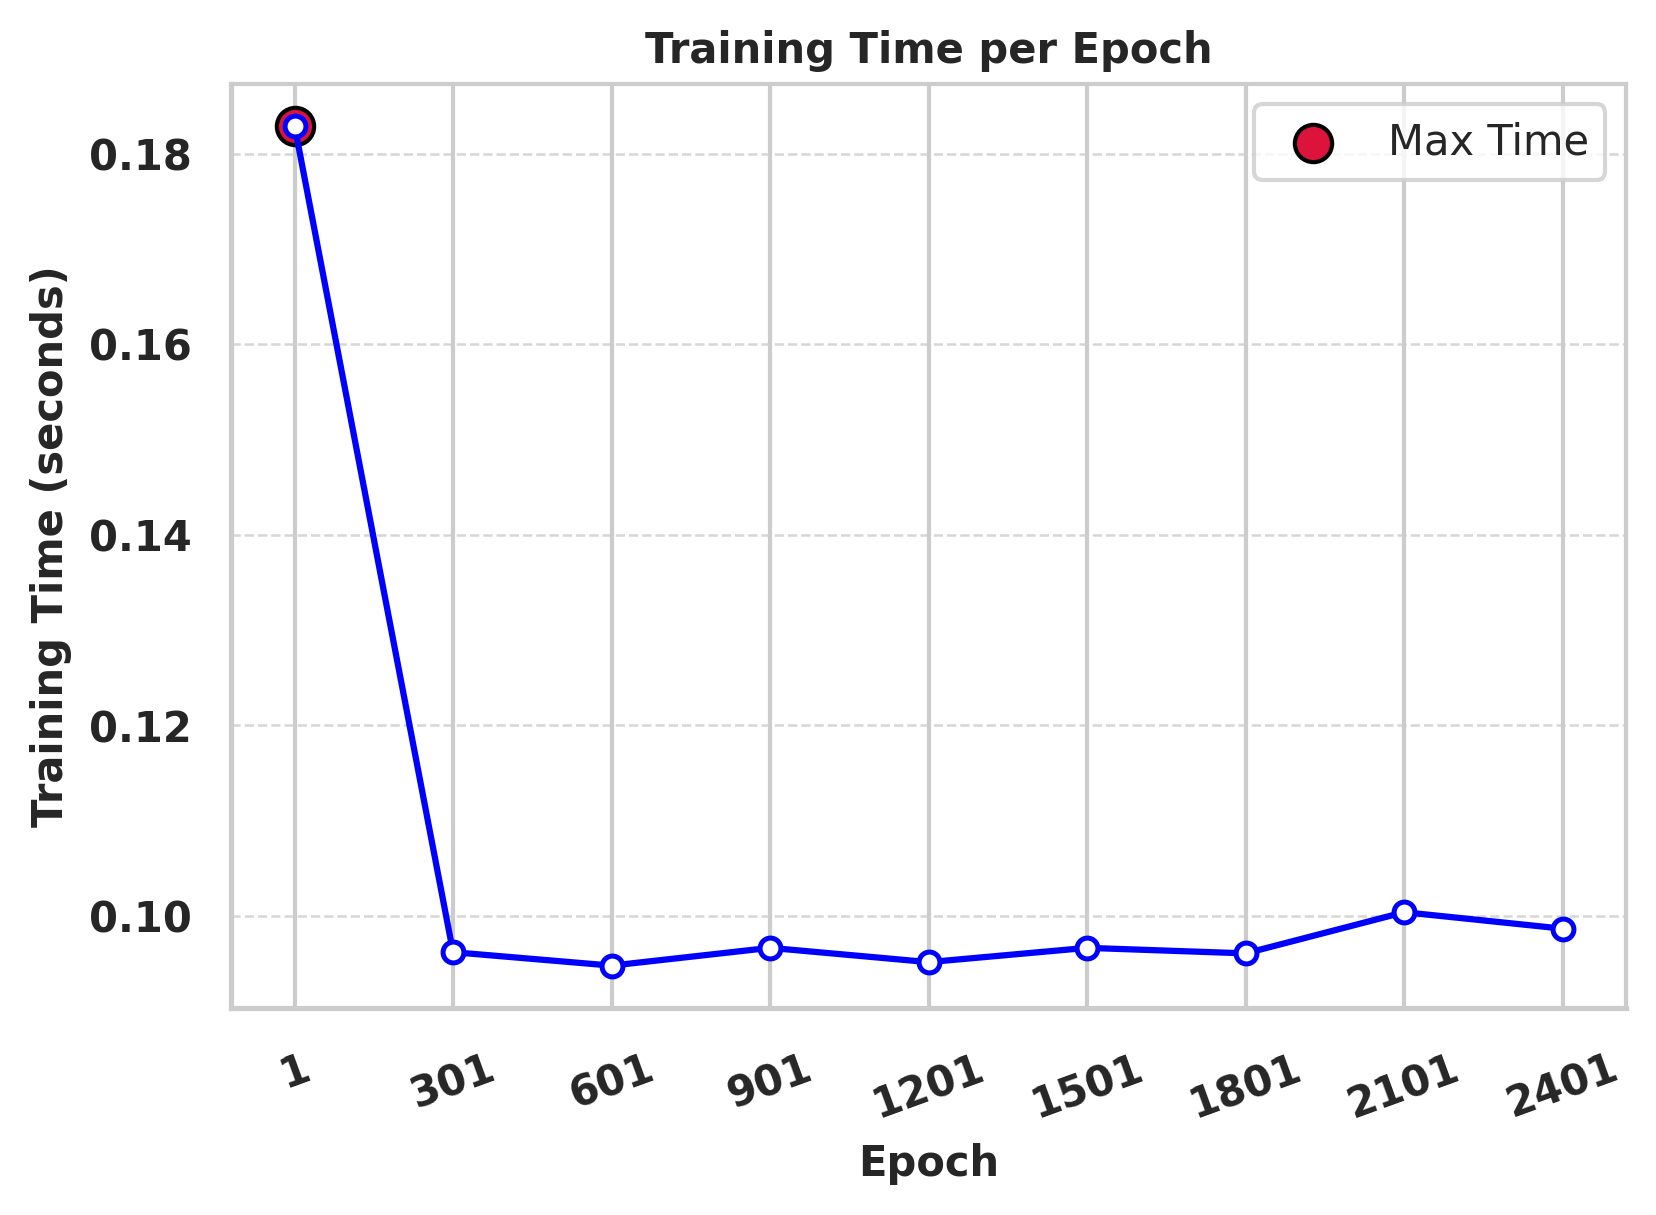

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Define actual and predicted values for forecast plot
# -------------------------------
predicted_values = hybrid_model_tcn_gru_lstm.predict(np.expand_dims(forecast_sequence, axis=0)).flatten()
actual_values = forecast_label.flatten()

# -------------------------------
# 1. Plot Actual vs. Predicted for the Forecast Sample
# -------------------------------
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.plot(range(prediction_length), actual_values, label="Actual", color="firebrick", marker="*", linewidth=1)
ax.plot(range(prediction_length), predicted_values, label="Proposed iTBG-Net Forecast", color="blue", linestyle="--", marker=".", linewidth=1)
ax.set_title("Energy Forecasting: Actual vs Predicted", fontsize=10, fontweight="bold")
ax.set_xlabel("Time Steps (Hours)", fontsize=10, fontweight="bold")
ax.set_ylabel("Normalized Energy Consumption", fontsize=10, fontweight="bold")
ax.legend(fontsize=10, loc="upper right")
ax.grid(True, linestyle="--", alpha=0.8)
plt.tight_layout(pad=0.2)
plt.savefig("PM_forecasting.png", dpi=300, bbox_inches="tight")
plt.savefig("PM_forecasting.pdf", dpi=300, bbox_inches="tight")
plt.savefig("PM_forecasting.eps", dpi=300, bbox_inches="tight")
plt.show()


# -------------------------------
# 2. Plot Training and Validation Loss over Epochs
# -------------------------------
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(metrics_history["epoch"], metrics_history["loss"], label="Train Loss", color="crimson", linewidth=1)
plt.plot(metrics_history["epoch"], metrics_history["val_loss"], label="Validation Loss", color="royalblue", linewidth=1)
plt.title("Training and Validation Loss per Epoch", fontsize=10, fontweight="bold")
plt.xlabel("Epoch", fontsize=10, fontweight="bold")
plt.ylabel("Loss", fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.8)
plt.tight_layout()
plt.savefig("PM_loss_per_epoch.png", dpi=300, bbox_inches="tight")
plt.savefig("PM_loss_per_epoch.pdf", dpi=300, bbox_inches="tight")
plt.savefig("PM_loss_per_epoch.eps", dpi=300, bbox_inches="tight")
plt.show()


# -------------------------------
# 3. Plot Training and Validation Accuracy over Epochs (Illustrative: 1 - loss)
# -------------------------------
plt.figure(figsize=(6, 4), dpi=300)
train_accuracy = [1 - l for l in metrics_history["loss"]]
val_accuracy = [1 - l for l in metrics_history["val_loss"]]
plt.plot(metrics_history["epoch"], train_accuracy, label="Train Accuracy", color="crimson", linewidth=1)
plt.plot(metrics_history["epoch"], val_accuracy, label="Validation Accuracy", color="royalblue", linewidth=1)
plt.title("Training and Validation Accuracy per Epoch", fontsize=10, fontweight="bold")
plt.xlabel("Epoch", fontsize=10, fontweight="bold")
plt.ylabel("Accuracy", fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.8)
plt.tight_layout()
plt.savefig("PM_accuracy_per_epoch.png", dpi=300, bbox_inches="tight")
plt.savefig("PM_accuracy_per_epoch.pdf", dpi=300, bbox_inches="tight")
plt.savefig("PM_accuracy_per_epoch.eps", dpi=300, bbox_inches="tight")
plt.show()


# -------------------------------
# 4. Enhanced Training Time per Epoch (Plotting Selected Epochs with Outer Boundaries)
# -------------------------------
# Convert epoch_times to numpy array and create an epoch index.
epochs = np.arange(1, len(epoch_times) + 1)
training_times = np.array(epoch_times)

# Select data points every 300 epochs (adjust step as needed)
selected_indices = np.arange(0, len(epochs), 300)  
selected_epochs = epochs[selected_indices]
selected_training_times = training_times[selected_indices]

plt.figure(figsize=(6, 4), dpi=300)

# Line plot for training time for the selected epochs.
plt.plot(selected_epochs, selected_training_times, marker="o", linestyle="-", color="blue", 
         markersize=5, linewidth=1.5, markerfacecolor="white", markeredgewidth=1.2, markeredgecolor="blue")

# Highlight the maximum training time for emphasis.
max_time = max(selected_training_times)
max_epoch = selected_epochs[np.argmax(selected_training_times)]
plt.scatter(max_epoch, max_time, color="crimson", edgecolor="black", s=80, label="Max Time")

# Labels & Titles.
plt.xlabel("Epoch", fontsize=10, fontweight="bold")
plt.ylabel("Training Time (seconds)", fontsize=10, fontweight="bold")
plt.title("Training Time per Epoch", fontsize=10, fontweight="bold", pad=5)

# Set x-axis ticks to the selected epochs.
plt.xticks(selected_epochs, fontsize=10, fontweight="bold", rotation=20)
plt.yticks(fontsize=10, fontweight="bold")

# Grid for clarity.
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.8)

# Restore Outer Boundaries (Top and Right Spines).
ax = plt.gca()
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["top"].set_linewidth(1.0)
ax.spines["right"].set_linewidth(1.0)

# Add legend.
plt.legend(fontsize=10, frameon=True, loc="upper right")

# Save the figure.
plt.savefig("PM_Training_Time_LinePlot.eps", dpi=300, bbox_inches="tight")
plt.savefig("PM_Training_Time_LinePlot.png", dpi=300, bbox_inches="tight")
plt.savefig("PM_Training_Time_LinePlot.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [9]:
# ===========================
# 7. Save the Performance Metrics for Later Comparison
# ===========================
np.savez("hybrid_metrics.npz",
         epochs=np.array(metrics_history["epoch"]),
         loss=np.array(metrics_history["loss"]),
         val_loss=np.array(metrics_history["val_loss"]),
         accuracy=np.array(metrics_history["accuracy"]),
         val_accuracy=np.array(metrics_history["val_accuracy"]),
         epoch_times=np.array(epoch_times),
         forecast_pred=np.array(predicted_values),
         actual=np.array(actual_values))
print("Hybrid model metrics saved to hybrid_metrics.npz")

Hybrid model metrics saved to hybrid_metrics.npz


# 2. CNN Model Incremental Learning

===== Dataset & Split Summary =====
Total dataset: 405 sequences, covering 500 hours.

Training Data:
  - Input Hours (for sequences 0 to 403):
      from 2023-11-01 00:00:00 to 2023-11-19 18:00:00
  - Target Hours (for sequences 0 to 403):
      from 2023-11-03 00:00:00 to 2023-11-21 18:00:00

Held-out Forecasting Data:
  - Forecasting Hours (for sequence 404):
      from 2023-11-19 20:00:00 to 2023-11-21 19:00:00

Note: The held-out forecasting sequence is reserved for final evaluation and is not used during training.
      In each training update, a 10% validation split is used (preserving temporal order).



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 48, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 48, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 48, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 48)                  │           3,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,448 (431.44 KB)

 Trainable params: 110,448 (431.44 KB)

 Non-trainable params: 0 (0.00 B)

Starting online incremental training for CNN model over 26 chunks...
Chunk 1/26: Avg Loss=0.1006, Avg Val Loss=0.1018, Time for chunk=8.28s
Chunk 2/26: Avg Loss=0.0799, Avg Val Loss=0.0767, Time for chunk=5.57s
Chunk 3/26: Avg Loss=0.0749, Avg Val Loss=0.0859, Time for chunk=4.44s
Chunk 4/26: Avg Loss=0.0708, Avg Val Loss=0.0822, Time for chunk=4.43s
Chunk 5/26: Avg Loss=0.0706, Avg Val Loss=0.0890, Time for chunk=4.42s
Chunk 6/26: Avg Loss=0.0688, Avg Val Loss=0.0909, Time for chunk=4.32s
Chunk 7/26: Avg Loss=0.0685, Avg Val Loss=0.0885, Time for chunk=4.39s
Chunk 8/26: Avg Loss=0.0637, Avg Val Loss=0.0818, Time for chunk=4.50s
Chunk 9/26: Avg Loss=0.0602, Avg Val Loss=0.0860, Time for chunk=4.42s
Chunk 10/26: Avg Loss=0.0565, Avg Val Loss=0.0858, Time for chunk=4.45s
Chunk 11/26: Avg Loss=0.0591, Avg Val Loss=0.0743, Time for chunk=4.47s
Chunk 12/26: Avg Loss=0.0708, Avg Val Loss=0.0911, Time for chunk=4.46s
Chunk 13/26: Avg Loss=0.0662, Avg Val Loss=0.0891, Time for chunk=4.42s
Chun

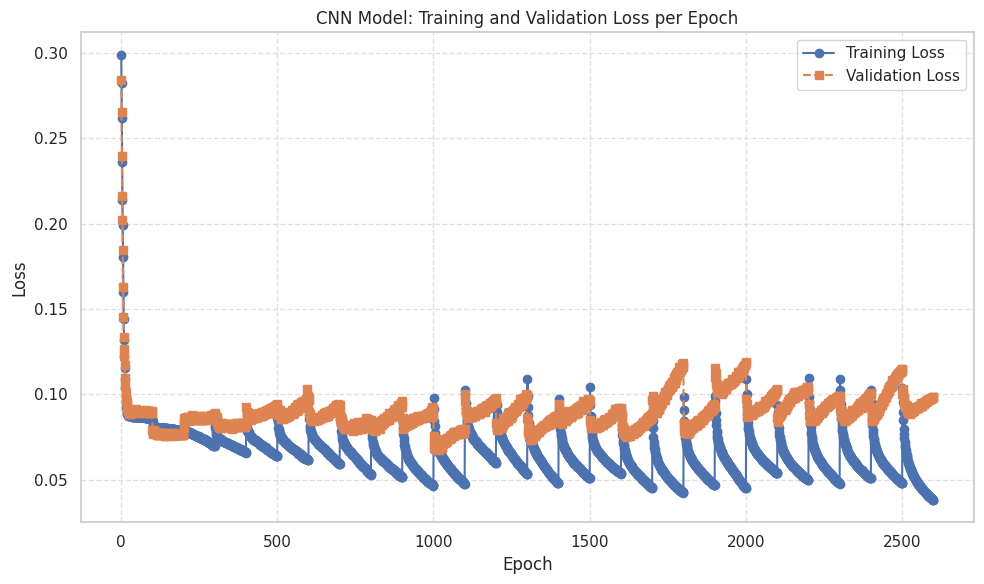

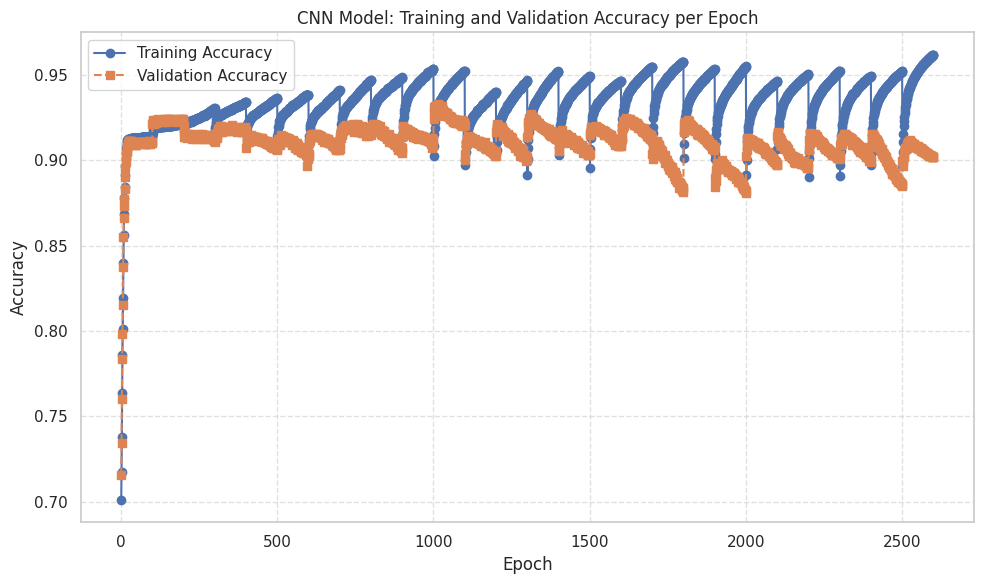

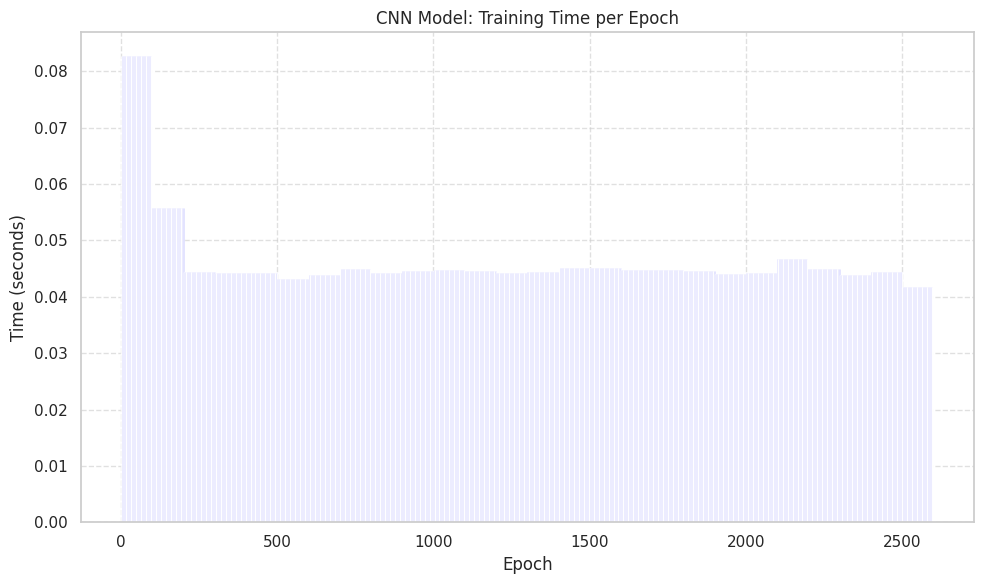

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


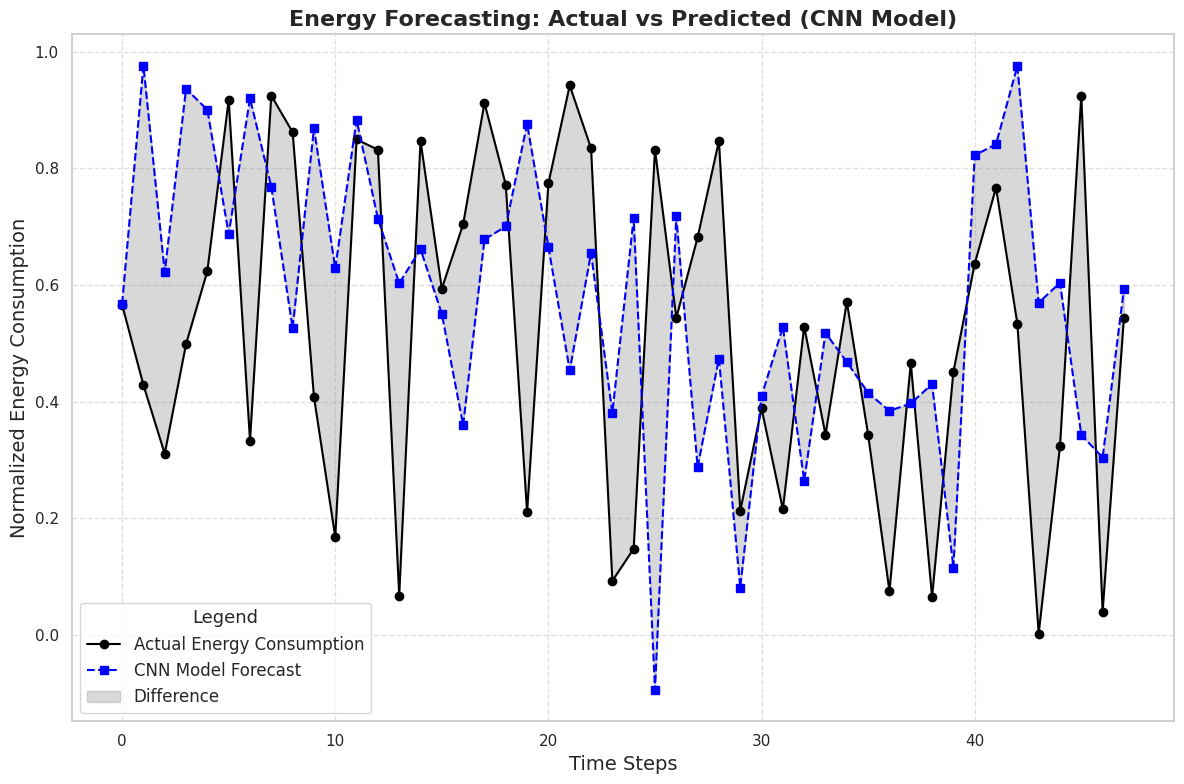

CNN model saved to cnn_model_incremental.h5
CNN model metrics saved to cnn_metrics.npz


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from collections import deque
import random
import time
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Data Loading and Preprocessing
# -----------------------------------------------------------------------------
data = pd.read_csv('/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values('Timestamp', inplace=True)

features = ['Energy_Demand']
scaler = MinMaxScaler()
data_features = scaler.fit_transform(data[features].values)

sequence_length = 48
prediction_length = 48

# Create sequences and labels using a sliding window approach.
# Each sequence (input) is of length 'sequence_length'
# and its corresponding label (target) is the next 'prediction_length' hours.
sequences, labels = [], []
for i in range(len(data_features) - sequence_length - prediction_length + 1):
    seq = data_features[i:i + sequence_length]
    label = data_features[i + sequence_length:i + sequence_length + prediction_length]
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels).astype(np.float32)

# Total number of sequences created
total_samples = len(sequences)
total_hours_dataset = len(data)  # total hours in the original data

print("===== Dataset & Split Summary =====")
print(f"Total dataset: {total_samples} sequences, covering {total_hours_dataset} hours.\n")

# -----------------------------------------------------------------------------
# Split the data into training and held-out forecasting samples.
# Training: sequences 0 to total_samples-2
# Forecasting (held-out): the last sequence (total_samples-1)
# -----------------------------------------------------------------------------
if total_samples > 1:
    training_sequences = sequences[:-1]
    training_labels = labels[:-1]
    forecast_sequence = sequences[-1]
    forecast_label = labels[-1]
    
    total_training_samples = len(training_sequences)  # equals total_samples - 1

    # Training Input: The historical period used as input for training.
    train_input_start_time = data['Timestamp'].iloc[0]
    train_input_end_time = data['Timestamp'].iloc[total_training_samples - 1 + sequence_length - 1]
    
    # Training Targets: The future (ground truth) periods the model learns to predict.
    train_label_start_time = data['Timestamp'].iloc[sequence_length]
    train_label_end_time = data['Timestamp'].iloc[total_training_samples - 1 + sequence_length + prediction_length - 1]
    
    # Held-out Forecasting Data: The last sequence is reserved for final prediction.
    forecast_seq_index = total_samples - 1
    forecast_label_start_time = data['Timestamp'].iloc[forecast_seq_index + sequence_length]
    forecast_label_end_time = data['Timestamp'].iloc[forecast_seq_index + sequence_length + prediction_length - 1]
    
    print("Training Data:")
    print(f"  - Input Hours (for sequences 0 to {total_training_samples - 1}):")
    print(f"      from {train_input_start_time} to {train_input_end_time}")
    print(f"  - Target Hours (for sequences 0 to {total_training_samples - 1}):")
    print(f"      from {train_label_start_time} to {train_label_end_time}\n")
    
    print("Held-out Forecasting Data:")
    print(f"  - Forecasting Hours (for sequence {forecast_seq_index}):")
    print(f"      from {forecast_label_start_time} to {forecast_label_end_time}\n")
    
    print("Note: The held-out forecasting sequence is reserved for final evaluation and is not used during training.")
    print("      In each training update, a 10% validation split is used (preserving temporal order).\n")
else:
    # In the unlikely event that there is only one sequence, use it for both training and forecasting.
    training_sequences = sequences
    training_labels = labels
    forecast_sequence = sequences
    forecast_label = labels

# -----------------------------------------------------------------------------
# 2. Replay Buffer for Incremental Learning
# -----------------------------------------------------------------------------
class ReplayBuffer:
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, sequence, label):
        self.buffer.append((sequence, label))
    
    def sample(self, batch_size):
        # Return all samples if the buffer is not full.
        if len(self.buffer) < batch_size:
            return list(self.buffer)
        return random.sample(self.buffer, batch_size)

def incremental_learning_update(model, new_sequences, new_labels, replay_buffer, batch_size=32, epochs=1):
    # Add new samples to the replay buffer.
    for seq, lbl in zip(new_sequences, new_labels):
        replay_buffer.add(seq, lbl)
    
    # Sample a batch from the replay buffer.
    replay_samples = replay_buffer.sample(batch_size)
    replay_sequences, replay_labels = zip(*replay_samples)
    replay_sequences = np.array(replay_sequences)
    replay_labels = np.array(replay_labels)
    
    # Combine new data with replayed samples.
    combined_sequences = np.vstack((new_sequences, replay_sequences))
    combined_labels = np.vstack((new_labels, replay_labels))
    
    # Incremental training on the combined data.
    history = model.fit(combined_sequences, combined_labels,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.1)
    return history

# -----------------------------------------------------------------------------
# 3. CNN Model Definition
# -----------------------------------------------------------------------------
def build_cnn_model(seq_len=sequence_length, pred_len=prediction_length, hidden_dim=128):
    inputs = tf.keras.layers.Input(shape=(seq_len, len(features)))
    
    # Three convolutional layers.
    conv1 = tf.keras.layers.Conv1D(filters=hidden_dim, kernel_size=3, activation='relu', padding='same')(inputs)
    conv2 = tf.keras.layers.Conv1D(filters=hidden_dim, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = tf.keras.layers.Conv1D(filters=hidden_dim, kernel_size=3, activation='relu', padding='same')(conv2)
    
    # Global average pooling to aggregate features over time.
    pool = tf.keras.layers.GlobalAveragePooling1D()(conv3)
    dense1 = tf.keras.layers.Dense(64, activation='relu')(pool)
    
    # Output layer produces 'prediction_length' outputs.
    outputs = tf.keras.layers.Dense(pred_len, activation='linear')(dense1)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae', 'mse', tf.keras.metrics.MeanAbsolutePercentageError(name='mape')])
    return model

# Build and summarize the CNN model.
cnn_model = build_cnn_model()
cnn_model.summary()

# -----------------------------------------------------------------------------
# 4. Incremental Online Training Loop with Per-Epoch Metrics for CNN Model
# -----------------------------------------------------------------------------
# Training configuration.
chunk_batch_size = 16         # New samples per update (online chunk)
epochs_per_chunk = 100         # Number of epochs per update
replay_sample_size = 32       # Number of samples drawn from the replay buffer per update


# Record per-epoch metrics and training times.
cnn_metrics_history = {
    "epoch": [],
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []
}
cnn_epoch_times = []

# Use only the training sequences (held-out forecasting sample is not used here)
replay_buffer_cnn = ReplayBuffer(max_size=1000)
global_epoch = 0

num_training_chunks = int(np.ceil(len(training_sequences) / chunk_batch_size))
print(f"Starting online incremental training for CNN model over {num_training_chunks} chunks...")

for chunk_idx in range(0, len(training_sequences), chunk_batch_size):
    # Get the new training data chunk.
    new_sequences = training_sequences[chunk_idx:chunk_idx + chunk_batch_size]
    new_labels = training_labels[chunk_idx:chunk_idx + chunk_batch_size]
    
    # Add new training data to the replay buffer.
    for seq, lbl in zip(new_sequences, new_labels):
        replay_buffer_cnn.add(seq, lbl)
    
    # Sample replay data.
    replay_samples = replay_buffer_cnn.sample(replay_sample_size)
    replay_sequences, replay_labels = zip(*replay_samples)
    replay_sequences = np.array(replay_sequences)
    replay_labels = np.array(replay_labels)
    
    # Combine new data with replayed samples.
    train_sequences = np.vstack((new_sequences, replay_sequences))
    train_labels = np.vstack((new_labels, replay_labels))
    
    # Train the model for a fixed number of epochs on the combined data.
    start_time_chunk = time.time()
    history = cnn_model.fit(
        train_sequences, train_labels,
        batch_size=chunk_batch_size,
        epochs=epochs_per_chunk,
        verbose=0,
        validation_split=0.1
    )
    end_time_chunk = time.time()
    
    chunk_time = end_time_chunk - start_time_chunk
    avg_epoch_time = chunk_time / epochs_per_chunk
    
    # Record metrics per epoch.
    for epoch in range(epochs_per_chunk):
        global_epoch += 1
        loss = history.history['loss'][epoch]
        val_loss = history.history['val_loss'][epoch]
        # "Accuracy" here is defined as 1 - loss (for visualization purposes).
        acc = 1 - loss
        val_acc = 1 - val_loss
        cnn_metrics_history["epoch"].append(global_epoch)
        cnn_metrics_history["loss"].append(loss)
        cnn_metrics_history["val_loss"].append(val_loss)
        cnn_metrics_history["accuracy"].append(acc)
        cnn_metrics_history["val_accuracy"].append(val_acc)
        cnn_epoch_times.append(avg_epoch_time)
    
    print(f"Chunk {chunk_idx//chunk_batch_size + 1}/{num_training_chunks}: "
          f"Avg Loss={np.mean(history.history['loss']):.4f}, "
          f"Avg Val Loss={np.mean(history.history['val_loss']):.4f}, "
          f"Time for chunk={chunk_time:.2f}s")

# -----------------------------------------------------------------------------
# 5. Visualization of Performance Metrics per Epoch for CNN Model
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(cnn_metrics_history["epoch"], cnn_metrics_history["loss"], label="Training Loss", marker="o")
plt.plot(cnn_metrics_history["epoch"], cnn_metrics_history["val_loss"], label="Validation Loss", marker="s", linestyle="--")
plt.title("CNN Model: Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("cnn_loss_per_epoch.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cnn_metrics_history["epoch"], cnn_metrics_history["accuracy"], label="Training Accuracy", marker="o")
plt.plot(cnn_metrics_history["epoch"], cnn_metrics_history["val_accuracy"], label="Validation Accuracy", marker="s", linestyle="--")
plt.title("CNN Model: Training and Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("cnn_accuracy_per_epoch.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(cnn_metrics_history["epoch"], cnn_epoch_times, color="blue", alpha=0.7)
plt.title("CNN Model: Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("cnn_time_per_epoch.png")
plt.show()

# -----------------------------------------------------------------------------
# 6. Forecasting Visualization: Compare Actual vs. Predicted Values for CNN Model
# -----------------------------------------------------------------------------
# Use the held-out forecasting sequence (not used during training).
actual_values = forecast_label.flatten()

# Generate forecast using the trained CNN model.
# Note: The CNN model output shape is (batch_size, prediction_length); we use the first (and only) sample.
predicted_values = cnn_model.predict(np.expand_dims(forecast_sequence, axis=0)).flatten()

plt.figure(figsize=(12, 8))
plt.plot(range(len(actual_values)), actual_values, label="Actual Energy Consumption", color="black", marker="o")
plt.plot(range(len(predicted_values)), predicted_values, label="CNN Model Forecast", color="blue", linestyle="--", marker="s")
plt.fill_between(range(len(actual_values)), actual_values, predicted_values, 
                 color="gray", alpha=0.3, label="Difference")
plt.title("Energy Forecasting: Actual vs Predicted (CNN Model)", fontsize=16, fontweight="bold")
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Normalized Energy Consumption", fontsize=14)
plt.legend(fontsize=12, loc="best", title="Legend", title_fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("cnn_forecasting_actual_vs_predicted.png")
plt.show()

# -----------------------------------------------------------------------------
# 7. Save the Trained CNN Model and Performance Metrics for Later Comparison
# -----------------------------------------------------------------------------
model_save_path = "cnn_model_incremental.h5"
cnn_model.save(model_save_path)
print(f"CNN model saved to {model_save_path}")

np.savez("cnn_metrics.npz",
         epochs=np.array(cnn_metrics_history["epoch"]),
         loss=np.array(cnn_metrics_history["loss"]),
         val_loss=np.array(cnn_metrics_history["val_loss"]),
         accuracy=np.array(cnn_metrics_history["accuracy"]),
         val_accuracy=np.array(cnn_metrics_history["val_accuracy"]),
         epoch_times=np.array(cnn_epoch_times),
         forecast_pred=np.array(predicted_values),
         actual=np.array(actual_values))
print("CNN model metrics saved to cnn_metrics.npz")


# 3. LSTM Modeling Incremental Learning

===== Dataset & Split Summary =====
Total dataset: 405 sequences, covering 500 hours.

Training Data:
  - Input Hours (for sequences 0 to 403):
      from 2023-11-01 00:00:00 to 2023-11-19 18:00:00
  - Target Hours (for sequences 0 to 403):
      from 2023-11-03 00:00:00 to 2023-11-21 18:00:00

Held-out Forecasting Data:
  - Forecasting Hours (for sequence 404):
      from 2023-11-19 20:00:00 to 2023-11-21 19:00:00

Note: The held-out forecasting sequence is reserved for final evaluation and is not used during training.
      In each training update, a 10% validation split is used (preserving temporal order).



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 48, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 48, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 48)                  │           3,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 341,104 (1.30 MB)

 Trainable params: 341,104 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

Starting online incremental training for LSTM model over 26 chunks...
Chunk 1/26: Avg Loss=0.0972, Avg Val Loss=0.1015, Time for chunk=9.41s
Chunk 2/26: Avg Loss=0.0773, Avg Val Loss=0.0802, Time for chunk=6.61s
Chunk 3/26: Avg Loss=0.0782, Avg Val Loss=0.0889, Time for chunk=6.33s
Chunk 4/26: Avg Loss=0.0738, Avg Val Loss=0.0961, Time for chunk=6.01s
Chunk 5/26: Avg Loss=0.0719, Avg Val Loss=0.0880, Time for chunk=6.29s
Chunk 6/26: Avg Loss=0.0694, Avg Val Loss=0.0938, Time for chunk=6.16s
Chunk 7/26: Avg Loss=0.0678, Avg Val Loss=0.0881, Time for chunk=6.08s
Chunk 8/26: Avg Loss=0.0640, Avg Val Loss=0.0965, Time for chunk=6.06s
Chunk 9/26: Avg Loss=0.0586, Avg Val Loss=0.0830, Time for chunk=6.04s
Chunk 10/26: Avg Loss=0.0528, Avg Val Loss=0.1102, Time for chunk=6.06s
Chunk 11/26: Avg Loss=0.0564, Avg Val Loss=0.1044, Time for chunk=6.38s
Chunk 12/26: Avg Loss=0.0650, Avg Val Loss=0.1116, Time for chunk=6.18s
Chunk 13/26: Avg Loss=0.0652, Avg Val Loss=0.1050, Time for chunk=6.12s
Chu

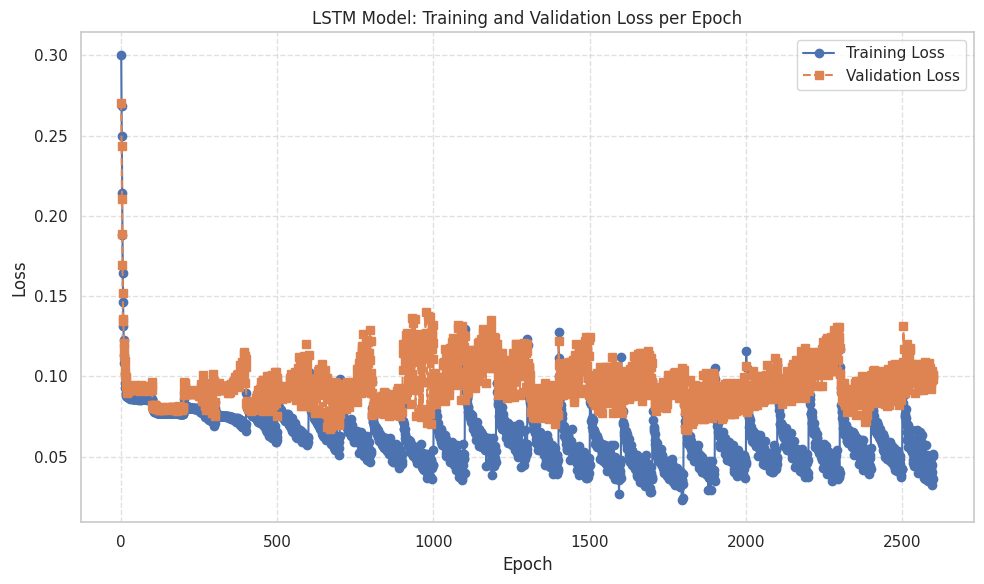

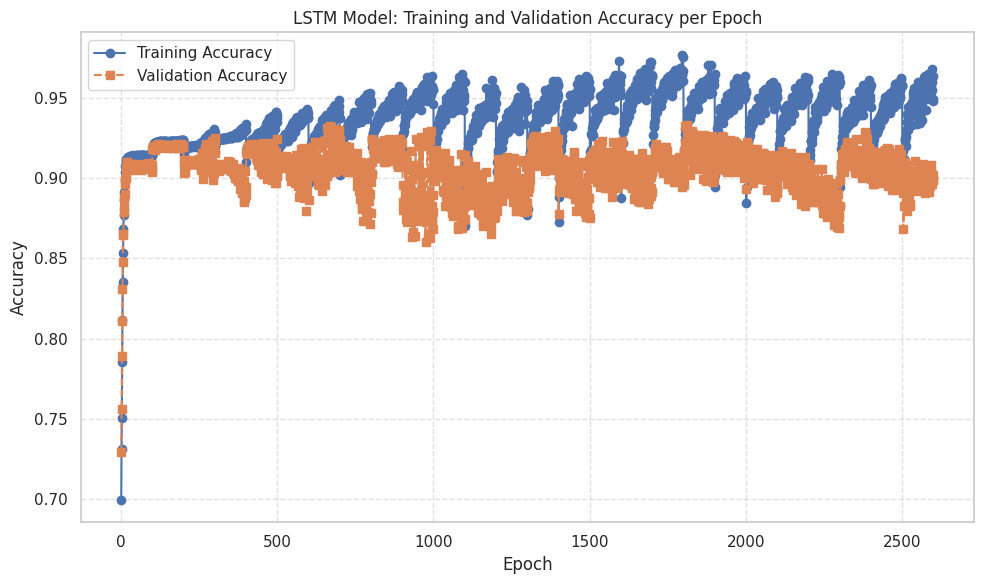

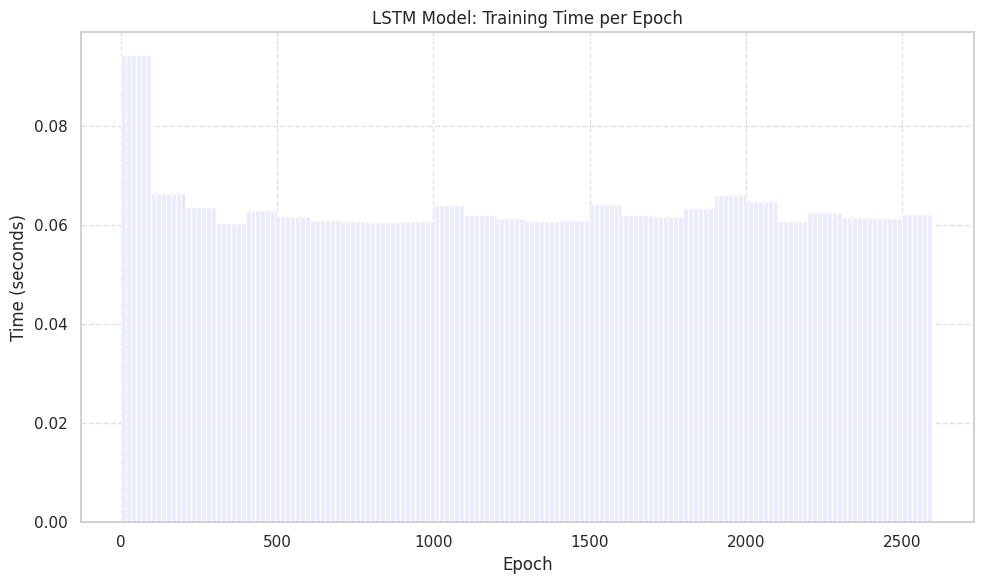

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


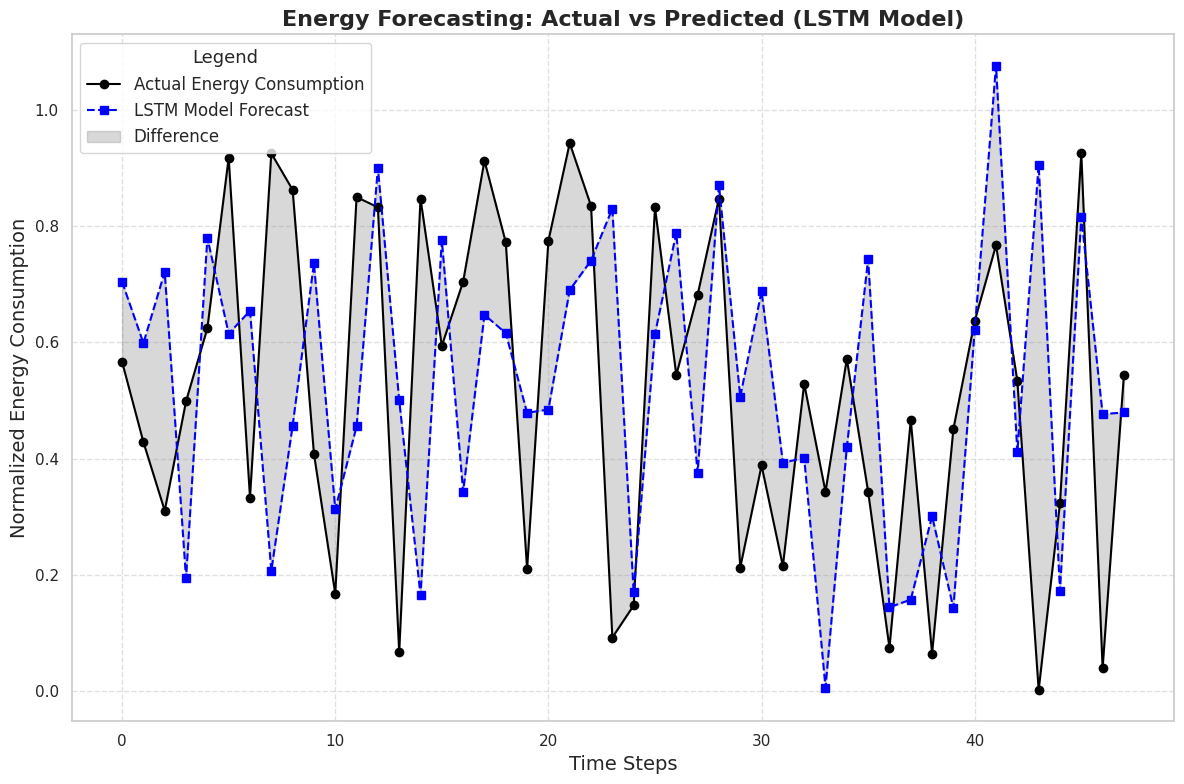

LSTM model saved to lstm_model_incremental.h5
LSTM model metrics saved to lstm_metrics.npz


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from collections import deque
import random
import time
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Data Loading and Preprocessing
# -----------------------------------------------------------------------------
data = pd.read_csv('/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values('Timestamp', inplace=True)

features = ['Energy_Demand']
scaler = MinMaxScaler()
data_features = scaler.fit_transform(data[features].values)

sequence_length = 48
prediction_length = 48

# Create sequences and labels using a sliding window approach.
# Each input sequence is of length 'sequence_length'
# and its corresponding target is the next 'prediction_length' hours.
sequences, labels = [], []
for i in range(len(data_features) - sequence_length - prediction_length + 1):
    seq = data_features[i:i + sequence_length]
    label = data_features[i + sequence_length:i + sequence_length + prediction_length]
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels).astype(np.float32)
total_samples = len(sequences)
total_hours_dataset = len(data)  # Total hours in the original data

print("===== Dataset & Split Summary =====")
print(f"Total dataset: {total_samples} sequences, covering {total_hours_dataset} hours.")

# -----------------------------------------------------------------------------
# Split the data: Reserve the last sequence for forecasting.
# Training: sequences 0 to total_samples-2.
# Forecasting (held-out): sequence total_samples-1.
# -----------------------------------------------------------------------------
if total_samples > 1:
    training_sequences = sequences[:-1]
    training_labels = labels[:-1]
    forecast_sequence = sequences[-1]
    forecast_label = labels[-1]
    
    total_training_samples = len(training_sequences)  # equals total_samples - 1

    # Training Input Hours: period spanned by the training input sequences.
    train_input_start_time = data['Timestamp'].iloc[0]
    train_input_end_time = data['Timestamp'].iloc[total_training_samples - 1 + sequence_length - 1]
    
    # Training Target Hours: the corresponding target windows for training.
    train_label_start_time = data['Timestamp'].iloc[sequence_length]
    train_label_end_time = data['Timestamp'].iloc[total_training_samples - 1 + sequence_length + prediction_length - 1]
    
    # Held-out Forecasting Data: the last sequence.
    forecast_seq_index = total_samples - 1
    forecast_label_start_time = data['Timestamp'].iloc[forecast_seq_index + sequence_length]
    forecast_label_end_time = data['Timestamp'].iloc[forecast_seq_index + sequence_length + prediction_length - 1]
    
    print("\nTraining Data:")
    print(f"  - Input Hours (for sequences 0 to {total_training_samples - 1}):")
    print(f"      from {train_input_start_time} to {train_input_end_time}")
    print(f"  - Target Hours (for sequences 0 to {total_training_samples - 1}):")
    print(f"      from {train_label_start_time} to {train_label_end_time}\n")
    
    print("Held-out Forecasting Data:")
    print(f"  - Forecasting Hours (for sequence {forecast_seq_index}):")
    print(f"      from {forecast_label_start_time} to {forecast_label_end_time}\n")
    
    print("Note: The held-out forecasting sequence is reserved for final evaluation and is not used during training.")
    print("      In each training update, a 10% validation split is used (preserving temporal order).\n")
else:
    training_sequences = sequences
    training_labels = labels
    forecast_sequence = sequences
    forecast_label = labels

# -----------------------------------------------------------------------------
# 2. Replay Buffer for Incremental Learning
# -----------------------------------------------------------------------------
class ReplayBuffer:
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, sequence, label):
        self.buffer.append((sequence, label))
    
    def sample(self, batch_size):
        if len(self.buffer) < batch_size:
            return list(self.buffer)
        return random.sample(self.buffer, batch_size)

def incremental_learning_update(model, new_sequences, new_labels, replay_buffer, batch_size=32, epochs=1):
    # Add new samples to the replay buffer.
    for seq, lbl in zip(new_sequences, new_labels):
        replay_buffer.add(seq, lbl)
    
    # Sample a batch from the replay buffer.
    replay_samples = replay_buffer.sample(batch_size)
    replay_sequences, replay_labels = zip(*replay_samples)
    replay_sequences = np.array(replay_sequences)
    replay_labels = np.array(replay_labels)
    
    # Combine new data with replayed samples.
    combined_sequences = np.vstack((new_sequences, replay_sequences))
    combined_labels = np.vstack((new_labels, replay_labels))
    
    # Incremental training on the combined data.
    history = model.fit(combined_sequences, combined_labels,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.1)
    return history

# -----------------------------------------------------------------------------
# 3. Define the LSTM Model
# -----------------------------------------------------------------------------
def build_lstm_model(seq_len=sequence_length, pred_len=prediction_length, hidden_dim=128):
    inputs = tf.keras.layers.Input(shape=(seq_len, len(features)))
    
    # Three LSTM layers with dropout.
    lstm1 = tf.keras.layers.LSTM(hidden_dim, return_sequences=True, dropout=0.3)(inputs)
    lstm2 = tf.keras.layers.LSTM(hidden_dim, return_sequences=True, dropout=0.3)(lstm1)
    lstm3 = tf.keras.layers.LSTM(hidden_dim, return_sequences=False, dropout=0.3)(lstm2)
    
    # Dense layers for final prediction.
    dense1 = tf.keras.layers.Dense(64, activation='relu')(lstm3)
    outputs = tf.keras.layers.Dense(pred_len, activation='linear')(dense1)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae', 'mse', tf.keras.metrics.MeanAbsolutePercentageError(name='mape')])
    return model

# Build and summarize the LSTM model.
lstm_model = build_lstm_model()
lstm_model.summary()

# -----------------------------------------------------------------------------
# 4. Incremental Online Training Loop with Per-Epoch Metrics for the LSTM Model
# -----------------------------------------------------------------------------
# Training configuration.
chunk_batch_size = 16        # New samples per update (online chunk)
epochs_per_chunk = 100        # Number of epochs per update
replay_sample_size = 32      # Number of samples drawn from the replay buffer per update

# Record per-epoch metrics and training times.
lstm_metrics_history = {
    "epoch": [],
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []
}
lstm_epoch_times = []

# Use only the training sequences (forecasting sample is held out)
replay_buffer_lstm = ReplayBuffer(max_size=1000)
global_epoch = 0

num_training_chunks = int(np.ceil(len(training_sequences) / chunk_batch_size))
print(f"Starting online incremental training for LSTM model over {num_training_chunks} chunks...")

for chunk_idx in range(0, len(training_sequences), chunk_batch_size):
    # Get new training data chunk.
    new_sequences = training_sequences[chunk_idx:chunk_idx + chunk_batch_size]
    new_labels = training_labels[chunk_idx:chunk_idx + chunk_batch_size]
    
    # Add new data to the replay buffer.
    for seq, lbl in zip(new_sequences, new_labels):
        replay_buffer_lstm.add(seq, lbl)
    
    # Sample replay data for this update.
    replay_samples = replay_buffer_lstm.sample(replay_sample_size)
    replay_sequences, replay_labels = zip(*replay_samples)
    replay_sequences = np.array(replay_sequences)
    replay_labels = np.array(replay_labels)
    
    # Combine new data with replayed samples.
    train_sequences = np.vstack((new_sequences, replay_sequences))
    train_labels = np.vstack((new_labels, replay_labels))
    
    # Train the model for a fixed number of epochs on the combined data.
    start_time_chunk = time.time()
    history = incremental_learning_update(
        lstm_model,
        new_sequences,
        new_labels,
        replay_buffer_lstm,
        batch_size=chunk_batch_size,
        epochs=epochs_per_chunk
    )
    end_time_chunk = time.time()
    
    chunk_time = end_time_chunk - start_time_chunk
    avg_epoch_time = chunk_time / epochs_per_chunk
    
    # Record per-epoch metrics.
    for epoch in range(epochs_per_chunk):
        global_epoch += 1
        loss = history.history['loss'][epoch]
        val_loss = history.history['val_loss'][epoch]
        # "Accuracy" defined as 1 - loss (for visualization purposes).
        acc = 1 - loss
        val_acc = 1 - val_loss
        lstm_metrics_history["epoch"].append(global_epoch)
        lstm_metrics_history["loss"].append(loss)
        lstm_metrics_history["val_loss"].append(val_loss)
        lstm_metrics_history["accuracy"].append(acc)
        lstm_metrics_history["val_accuracy"].append(val_acc)
        lstm_epoch_times.append(avg_epoch_time)
    
    print(f"Chunk {chunk_idx//chunk_batch_size + 1}/{num_training_chunks}: "
          f"Avg Loss={np.mean(history.history['loss']):.4f}, "
          f"Avg Val Loss={np.mean(history.history['val_loss']):.4f}, "
          f"Time for chunk={chunk_time:.2f}s")

# -----------------------------------------------------------------------------
# 5. Visualization of Performance Metrics per Epoch for the LSTM Model
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(lstm_metrics_history["epoch"], lstm_metrics_history["loss"], label="Training Loss", marker="o")
plt.plot(lstm_metrics_history["epoch"], lstm_metrics_history["val_loss"], label="Validation Loss", marker="s", linestyle="--")
plt.title("LSTM Model: Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("lstm_loss_per_epoch.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lstm_metrics_history["epoch"], lstm_metrics_history["accuracy"], label="Training Accuracy", marker="o")
plt.plot(lstm_metrics_history["epoch"], lstm_metrics_history["val_accuracy"], label="Validation Accuracy", marker="s", linestyle="--")
plt.title("LSTM Model: Training and Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("lstm_accuracy_per_epoch.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(lstm_metrics_history["epoch"], lstm_epoch_times, color="blue", alpha=0.7)
plt.title("LSTM Model: Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("lstm_time_per_epoch.png")
plt.show()

# -----------------------------------------------------------------------------
# 6. Forecasting Visualization: Compare Actual vs. Predicted Values for the LSTM Model
# -----------------------------------------------------------------------------
# Use the held-out forecasting sequence (not used during training).
actual_values = forecast_label.flatten()

# Generate forecast using the trained LSTM model.
predicted_values = lstm_model.predict(np.expand_dims(forecast_sequence, axis=0)).flatten()

plt.figure(figsize=(12, 8))
plt.plot(range(len(actual_values)), actual_values, label="Actual Energy Consumption", color="black", marker="o")
plt.plot(range(len(predicted_values)), predicted_values, label="LSTM Model Forecast", color="blue", linestyle="--", marker="s")
plt.fill_between(range(len(actual_values)), actual_values, predicted_values, color="gray", alpha=0.3, label="Difference")
plt.title("Energy Forecasting: Actual vs Predicted (LSTM Model)", fontsize=16, fontweight="bold")
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Normalized Energy Consumption", fontsize=14)
plt.legend(fontsize=12, loc="best", title="Legend", title_fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("lstm_forecasting_actual_vs_predicted.png")
plt.show()

# -----------------------------------------------------------------------------
# 7. Save the Trained LSTM Model and Performance Metrics for Later Comparison
# -----------------------------------------------------------------------------
lstm_model_save_path = "lstm_model_incremental.h5"
lstm_model.save(lstm_model_save_path)
print(f"LSTM model saved to {lstm_model_save_path}")

np.savez("lstm_metrics.npz",
         epochs=np.array(lstm_metrics_history["epoch"]),
         loss=np.array(lstm_metrics_history["loss"]),
         val_loss=np.array(lstm_metrics_history["val_loss"]),
         accuracy=np.array(lstm_metrics_history["accuracy"]),
         val_accuracy=np.array(lstm_metrics_history["val_accuracy"]),
         epoch_times=np.array(lstm_epoch_times),
         forecast_pred=np.array(predicted_values),
         actual=np.array(actual_values))
print("LSTM model metrics saved to lstm_metrics.npz")


# 4. LSTM Model in Non-Incremental Fashion.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# -----------------------------------------------------------------------------
# 1. Data Loading and Preprocessing
# -----------------------------------------------------------------------------
data = pd.read_csv('/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv')

# Convert Timestamp to datetime and sort
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values('Timestamp', inplace=True)

# Use 'Energy_Demand' as the feature for prediction and normalize
features = ['Energy_Demand']
scaler = MinMaxScaler()
data_features = scaler.fit_transform(data[features].values)

sequence_length = 48
prediction_length = 48

# Create sequences and labels
sequences, labels = [], []
for i in range(len(data_features) - sequence_length - prediction_length + 1):
    seq = data_features[i:i + sequence_length]
    label = data_features[i + sequence_length:i + sequence_length + prediction_length]
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences).astype(np.float32)
labels = np.array(labels).astype(np.float32)

# -----------------------------------------------------------------------------
# 2. Dataset Splitting Strategy
# -----------------------------------------------------------------------------
# Use all sequences except the last one for training,
# and reserve the final sequence for final evaluation/forecasting.
x_train = sequences[:-1]
y_train = labels[:-1]
x_forecast = sequences[-1]  # Held-out forecasting sequence
y_forecast = labels[-1]

print(f"Training sequences shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print("Held-out forecasting sequence shape:", x_forecast.shape)

# -----------------------------------------------------------------------------
# 3. Define the LSTM Model
# -----------------------------------------------------------------------------
def build_lstm_model(seq_len, pred_len, hidden_dim=128, feature_dim=1):
    inputs = tf.keras.layers.Input(shape=(seq_len, feature_dim))

    # LSTM layers
    lstm1 = tf.keras.layers.LSTM(hidden_dim, return_sequences=True, dropout=0.3)(inputs)
    lstm2 = tf.keras.layers.LSTM(hidden_dim, return_sequences=True, dropout=0.3)(lstm1)
    lstm3 = tf.keras.layers.LSTM(hidden_dim, return_sequences=False, dropout=0.3)(lstm2)

    # Dense layers
    dense1 = tf.keras.layers.Dense(64, activation='relu')(lstm3)
    outputs = tf.keras.layers.Dense(pred_len, activation='linear')(dense1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse', tf.keras.metrics.MeanAbsolutePercentageError(name='mape')]
    )
    return model

# Build the model
lstm_model_nonil = build_lstm_model(seq_len=sequence_length, pred_len=prediction_length, feature_dim=1)
lstm_model_nonil.summary()

# -----------------------------------------------------------------------------
# 4. Training Loop and Metrics Collection (Non-Incremental)
# -----------------------------------------------------------------------------
training_times = []
losses = []
val_losses = []
avg_accuracy = []    # Using MAE as a proxy for "accuracy" (lower MAE is better)
val_accuracy = []    # Using validation MAE as well

batch_size = 16
epochs = 2500

for epoch in range(epochs):
    print(f"Starting epoch {epoch + 1}/{epochs}")
    epoch_start_time = time.time()
    history = lstm_model_nonil.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=1,  # Train one epoch at a time to capture metrics
        validation_split=0.2,
        shuffle=True,
        verbose=1
    )
    epoch_end_time = time.time()

    # Record training time for this epoch
    training_times.append(epoch_end_time - epoch_start_time)

    # Record loss and validation loss
    losses.append(history.history['loss'][0])
    val_losses.append(history.history['val_loss'][0])

    # Record average accuracy and validation accuracy (using MAE as proxy)
    avg_accuracy.append(history.history['mae'][0])
    val_accuracy.append(history.history['val_mae'][0])

# -----------------------------------------------------------------------------
# 5. Save the Trained LSTM Model (Non-Incremental)
# -----------------------------------------------------------------------------
lstm_model_nonil_save_path = "lstm_model_nonil.h5"
lstm_model_nonil.save(lstm_model_nonil_save_path)
print(f"Model saved to {lstm_model_nonil_save_path}")

# -----------------------------------------------------------------------------
# 6. Forecasting Visualization: Generate Final Forecast on Held-Out Data
# -----------------------------------------------------------------------------
# For forecasting, use the held-out forecasting sequence.
forecast_pred = lstm_model_nonil.predict(np.expand_dims(x_forecast, axis=0)).flatten()
actual = y_forecast.flatten()

plt.figure(figsize=(12, 8))
plt.plot(range(len(actual)), actual, label="Actual Energy Demand", color="black", marker="o")
plt.plot(range(len(forecast_pred)), forecast_pred, label="LSTM Forecast (Non-Incremental)", color="blue", linestyle="--", marker="s")
plt.fill_between(range(len(actual)), actual, forecast_pred, color="gray", alpha=0.3, label="Difference")
plt.title("Energy Forecasting: Actual vs Predicted (LSTM Non-Incremental Model)", fontsize=16, fontweight="bold")
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Normalized Energy Consumption", fontsize=14)
plt.legend(fontsize=12, loc="best", title="Legend", title_fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("lstm_nonil_forecasting.png")
plt.show()

# -----------------------------------------------------------------------------
# 7. Save Performance Metrics for Later Comparison
# -----------------------------------------------------------------------------
epoch_numbers = np.arange(1, epochs + 1)
np.savez("lstm_nonil_metrics.npz",
         epochs=epoch_numbers,
         loss=np.array(losses),
         val_loss=np.array(val_losses),
         accuracy=np.array(avg_accuracy),
         val_accuracy=np.array(val_accuracy),
         epoch_times=np.array(training_times),
         forecast_pred=forecast_pred,
         actual=actual)
print("LSTM Non-Incremental model metrics saved to lstm_nonil_metrics.npz")


Training sequences shape: (404, 48, 1)
Training labels shape: (404, 48, 1)
Held-out forecasting sequence shape: (48, 1)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 48, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 48, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 48, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 48)                  │           3,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 341,104 (1.30 MB)

 Trainable params: 341,104 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

Starting epoch 1/2500
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2569 - mae: 0.4226 - mape: 152.6517 - mse: 0.2569 - val_loss: 0.1074 - val_mae: 0.2800 - val_mape: 475.9340 - val_mse: 0.1074
Starting epoch 2/2500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0889 - mae: 0.2541 - mape: 245.5419 - mse: 0.0889 - val_loss: 0.0949 - val_mae: 0.2682 - val_mape: 475.9036 - val_mse: 0.0949
Starting epoch 3/2500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0840 - mae: 0.2487 - mape: 240.5790 - mse: 0.0840 - val_loss: 0.0923 - val_mae: 0.2655 - val_mape: 467.9775 - val_mse: 0.0923
Starting epoch 4/2500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0844 - mae: 0.2499 - mape: 260.5837 - mse: 0.0844 - val_loss: 0.0935 - val_mae: 0.2670 - val_mape: 487.2570 - val_mse: 0.0935
Starting epoch 5/2500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0842 - mae: 0.2501 - mape: 263.6562 - mse: 0.0842 - val_loss: 0.0928 - val_mae: 0.2662 - val_mape: 478.1965 - val_mse: 0.0928
Starting e

**xLSTM Modeling Importing**

In [13]:
# Clone the XLSTM repository
!git clone https://github.com/NX-AI/xlstm.git

# Navigate to the xlstm directory
%cd xlstm




Cloning into 'xlstm'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 360 (delta 40), reused 42 (delta 33), pack-reused 305 (from 1)
Receiving objects: 100% (360/360), 252.88 KiB | 10.54 MiB/s, done.
Resolving deltas: 100% (193/193), done.
/kaggle/working/xlstm


In [14]:
# Install PyTorch
!pip install torch torchvision torchaudio

# Install additional dependencies
!pip install numpy pandas scikit-learn matplotlib

# Install the xLSTM package
!pip install xlstm


INFO: pip is looking at multiple versions of xlstm to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 4.7 MB/s eta 0:00:00


In [15]:
#!pip install seaborn


In [16]:
from xlstm.xlstm.blocks.mlstm.layer import mLSTMLayerConfig
from xlstm.xlstm.blocks.slstm.layer import sLSTMLayerConfig
from xlstm.xlstm.xlstm_block_stack import xLSTMBlockStack, xLSTMBlockStackConfig
from xlstm.xlstm.blocks.mlstm.block import mLSTMBlockConfig
from xlstm.xlstm.blocks.slstm.block import sLSTMBlockConfig
from xlstm.xlstm.components.feedforward import FeedForwardConfig

In [17]:
!apt-get install ninja-build -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  ninja-build
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 111 kB of archives.
After this operation, 358 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ninja-build amd64 1.10.1-1 [111 kB]
Fetched 111 kB in 1s (153 kB/s)      
Selecting previously unselected package ninja-build.
(Reading database ... 127400 files and directories currently installed.)
Preparing to unpack .../ninja-build_1.10.1-1_amd64.deb ...
Unpacking ninja-build (1.10.1-1) ...
Setting up ninja-build (1.10.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [18]:
!ninja --version

1.11.1.git.kitware.jobserver-1


In [19]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [20]:
#!rm -rf /root/.cache/torch_extensions/


In [21]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.5.1+cu121
True


In [22]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


In [23]:
!pip install torchinfo


In [24]:
try:
    from torchinfo import summary  # For model summary
except ImportError:
    !pip install torchinfo
    from torchinfo import summary


# 5. xLSTM Incremental Learning Model

/kaggle/working/xlstm/xlstm/blocks/slstm/cell.py:546: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, training, *inputs):
/kaggle/working/xlstm/xlstm/blocks/slstm/cell.py:571: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_s):


Layer (type:depth-idx)                                       Output Shape              Param #
XLSTMModel                                                   [32, 48]                  --
├─Linear: 1-1                                                [32, 48, 32]              64
├─ModuleList: 1-2                                            --                        --
│    └─xLSTMBlockStack: 2-1                                  [32, 48, 32]              --
│    │    └─ModuleList: 3-1                                  --                        10,624
│    │    └─Identity: 3-2                                    [32, 48, 32]              --
│    └─xLSTMBlockStack: 2-2                                  [32, 48, 32]              --
│    │    └─ModuleList: 3-3                                  --                        10,624
│    │    └─Identity: 3-4                                    [32, 48, 32]              --
│    └─xLSTMBlockStack: 2-3                                  [32, 48, 32]              

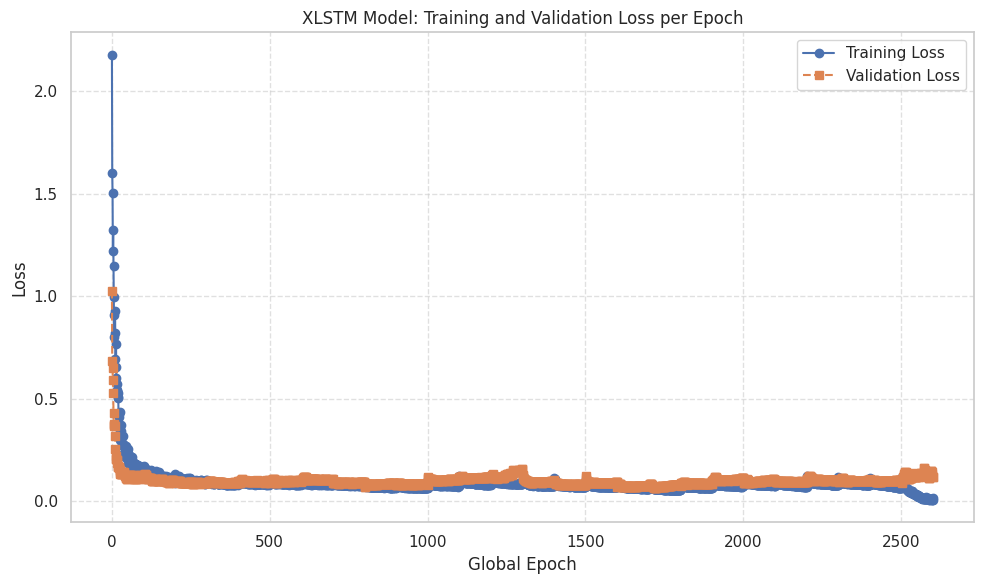

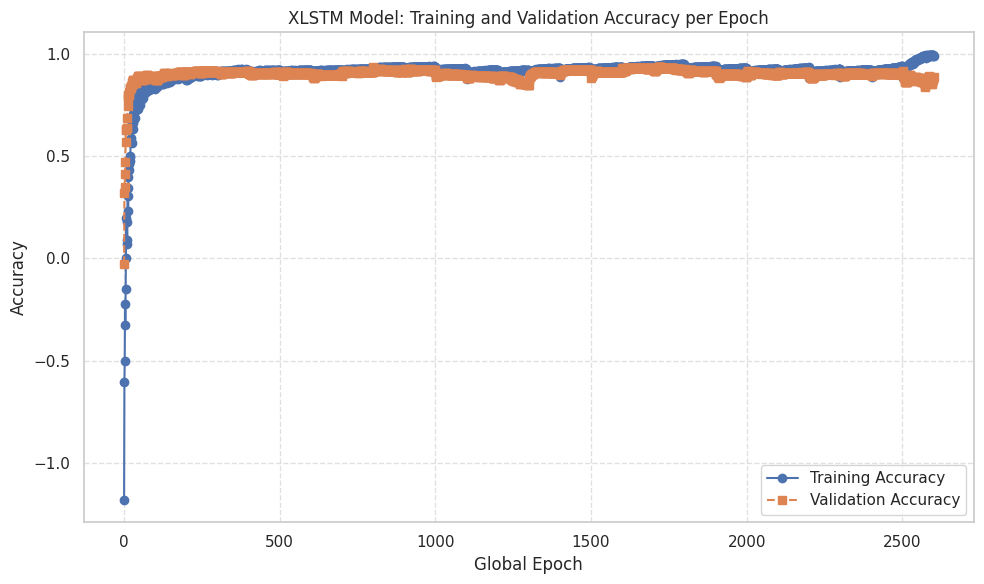

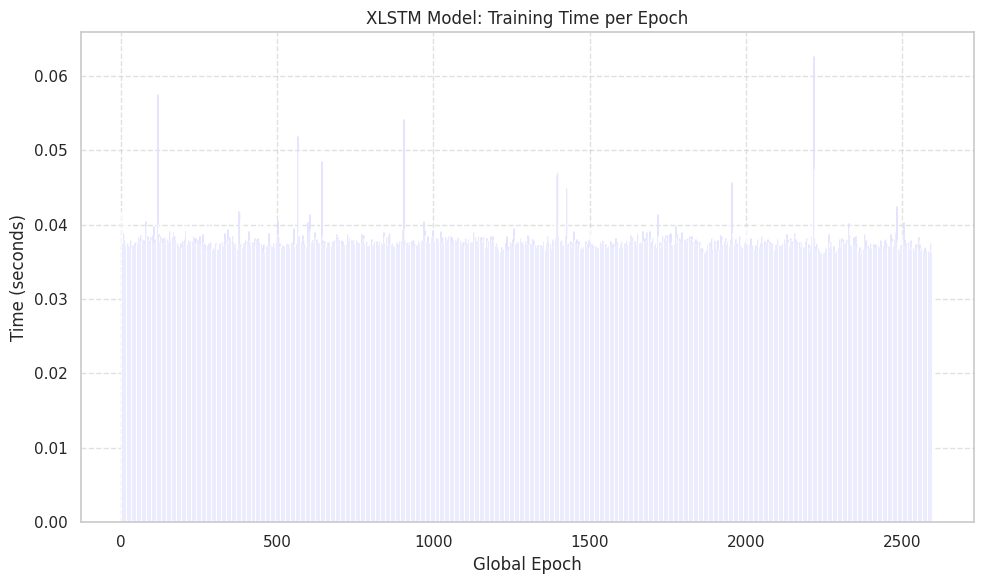

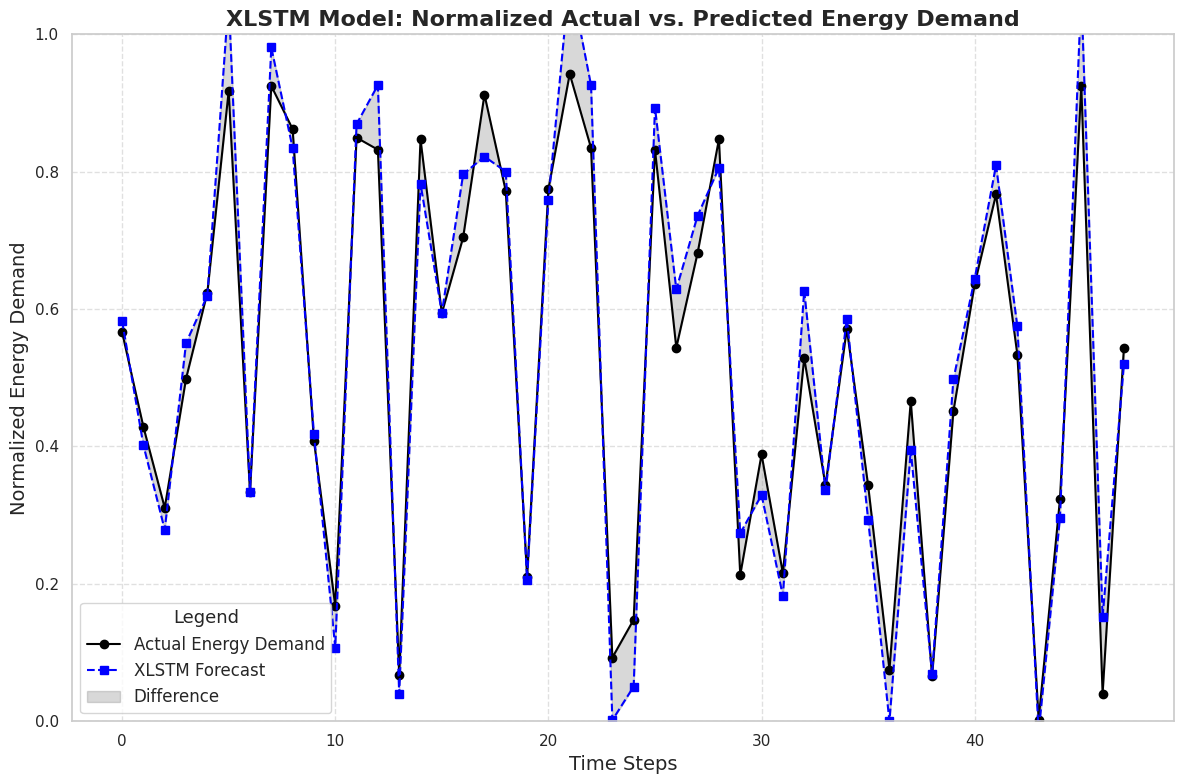

XLSTM model saved to xlstm_model_incremental.pt
XLSTM model metrics saved to xlstm_metrics.npz


In [47]:
import os
import time
import random
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Subset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from torchinfo import summary

# Import XLSTM components
from xlstm.xlstm.blocks.slstm.layer import sLSTMLayerConfig
from xlstm.xlstm.blocks.slstm.block import sLSTMBlockConfig
from xlstm.xlstm.blocks.mlstm.layer import mLSTMLayerConfig
from xlstm.xlstm.blocks.mlstm.block import mLSTMBlockConfig
from xlstm.xlstm.xlstm_block_stack import xLSTMBlockStack, xLSTMBlockStackConfig

# -----------------------------------------------------------------------------
# 1. Data Loading and Preprocessing
# -----------------------------------------------------------------------------
def load_energy_dataset(file_path, sequence_length=48, prediction_length=48):
    data = pd.read_csv(file_path)
    data['Datetime'] = pd.to_datetime(data['Timestamp'])
    # Drop unneeded columns
    data = data.drop(columns=['Timestamp', 'Weather_Condition_x', 'Weather_Condition_y'])
    data = data.sort_values(by='Datetime').reset_index(drop=True)
    numeric_columns = ['Energy_Demand', 'Energy_Supply', 'Temperature', 'Grid_Load',
                       'Renewable_Source_Output', 'NonRenewable_Source_Output', 'Energy_Price']
    data = data[['Datetime'] + numeric_columns]
    data_hourly = data.set_index('Datetime').resample('h').mean().ffill()

    # Scale the 'Energy_Demand' column
    energy_demand = data_hourly['Energy_Demand'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(energy_demand)

    # Prepare sequences:
    # Each sample: X of shape (sequence_length, 1) and y of shape (prediction_length, 1)
    X, y = [], []
    for i in range(len(data_scaled) - sequence_length - prediction_length + 1):
        X.append(data_scaled[i : i + sequence_length])
        y.append(data_scaled[i + sequence_length : i + sequence_length + prediction_length])
    X = torch.tensor(X, dtype=torch.float32)    # shape: (num_samples, 48, 1)
    y = torch.tensor(y, dtype=torch.float32).squeeze(-1)  # shape: (num_samples, 48)
    return DataLoader(TensorDataset(X, y), batch_size=32, shuffle=True), scaler, data_hourly

# -----------------------------------------------------------------------------
# 2. Split Data into Chunks for Incremental Training
# -----------------------------------------------------------------------------
def split_data_into_chunks(data_loader, chunk_size):
    data_chunks = []
    X, y = data_loader.dataset.tensors
    for i in range(0, len(X), chunk_size):
        chunk_X = X[i : i + chunk_size]
        chunk_y = y[i : i + chunk_size]
        if len(chunk_X) > 0:
            data_chunks.append(DataLoader(TensorDataset(chunk_X, chunk_y), batch_size=32, shuffle=True))
    return data_chunks

# -----------------------------------------------------------------------------
# 3. Define XLSTM Model with Reduced Capacity and Increased Dropout
# -----------------------------------------------------------------------------
class XLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, slstm_blocks=1, mlstm_blocks=1):
        """
        output_size is set equal to prediction_length (e.g., 48).
        """
        super(XLSTMModel, self).__init__()
        self.input_embedding = nn.Linear(input_size, hidden_size)
        self.blocks = nn.ModuleList()
        block_idx = 0
        # Add sLSTM blocks with increased dropout
        while slstm_blocks > 0:
            slstm_layer_config = sLSTMLayerConfig(
                hidden_size=hidden_size,
                num_heads=2,
                num_states=2,
                backend='cuda',
                function='slstm',
                dropout=0.2  # Increased dropout for performance degradation.
            )
            slstm_block_config = sLSTMBlockConfig(
                slstm=slstm_layer_config,
                _num_blocks=1,
                _block_idx=block_idx
            )
            self.blocks.append(
                xLSTMBlockStack(config=xLSTMBlockStackConfig(
                    slstm_block=slstm_block_config,
                    num_blocks=1,
                    context_length=48,
                    embedding_dim=hidden_size,
                    dropout=0.2,  # Apply dropout consistently.
                    add_post_blocks_norm=False
                ))
            )
            slstm_blocks -= 1
            block_idx += 1
        # Add mLSTM blocks with increased dropout
        while mlstm_blocks > 0:
            mlstm_layer_config = mLSTMLayerConfig(
                num_heads=4,
                embedding_dim=hidden_size,
                dropout=0.2  # Increased dropout here as well.
            )
            mlstm_block_config = mLSTMBlockConfig(
                mlstm=mlstm_layer_config,
                _num_blocks=1,
                _block_idx=block_idx
            )
            self.blocks.append(
                xLSTMBlockStack(config=xLSTMBlockStackConfig(
                    mlstm_block=mlstm_block_config,
                    num_blocks=1,
                    context_length=48,
                    embedding_dim=hidden_size,
                    dropout=0.2,
                    add_post_blocks_norm=False
                ))
            )
            mlstm_blocks -= 1
            block_idx += 1
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch_size, context_length, input_size)
        x = self.input_embedding(x)  # (batch_size, 48, hidden_size)
        for block in self.blocks:
            x = block(x)
        # Use output from the final time step for prediction; shape: (batch_size, output_size)
        x = self.fc(x[:, -1, :])
        return x

# -----------------------------------------------------------------------------
# 4. Incremental Training Functions
# -----------------------------------------------------------------------------
def train_one_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            total_loss += loss.item()
    return total_loss / len(val_loader) if len(val_loader) > 0 else 0

def split_train_val(chunk_loader, val_ratio=0.1):
    dataset = chunk_loader.dataset
    total_samples = len(dataset)
    indices = list(range(total_samples))
    split = int(val_ratio * total_samples)
    if total_samples > 1 and split < 1:
        split = 1
    random.shuffle(indices)
    val_indices = indices[:split]
    train_indices = indices[split:]
    if len(train_indices) == 0:
        train_indices = indices
        val_indices = indices
    train_subset = Subset(dataset, train_indices)
    val_subset = Subset(dataset, val_indices)
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
    return train_loader, val_loader

# -----------------------------------------------------------------------------
# 5. Main Incremental Training Script for XLSTM Model
# -----------------------------------------------------------------------------
file_path = '/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv'
data_loader, scaler, hourly_data = load_energy_dataset(file_path, sequence_length=48, prediction_length=48)
chunk_size = 16  # number of samples per chunk
data_chunks = split_data_into_chunks(data_loader, chunk_size=chunk_size)

# Model configuration (with reduced capacity)
input_size = 1
hidden_size = 32       # Reduced hidden size from 64 to 32.
output_size = 48       # prediction_length remains the same.
slstm_blocks = 2       # Reduced from 2 to 1.
mlstm_blocks = 3       # Reduced from 2 to 1.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modelxlstm = XLSTMModel(input_size, hidden_size, output_size,
                        slstm_blocks=slstm_blocks, mlstm_blocks=mlstm_blocks).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(modelxlstm.parameters(), lr=0.001)

# Print model summary using a dummy input.
print(summary(modelxlstm, input_size=(32, 48, 1)))

# Training configuration: epochs per chunk
chunk_epochs = 100

# Dictionaries to record per-epoch metrics (global epoch indexing)
xlstm_metrics_history = {
    "epoch": [],
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []
}
xlstm_epoch_times = []
global_epoch = 0
chunk_training_times = []

print("Starting incremental training on XLSTM model...")
for i, chunk_loader in enumerate(data_chunks):
    print(f"Training on chunk {i + 1}/{len(data_chunks)}...")
    train_loader, val_loader = split_train_val(chunk_loader, val_ratio=0.1)
    chunk_start = time.time()
    for epoch in range(chunk_epochs):
        start_epoch = time.time()
        train_loss = train_one_epoch(modelxlstm, train_loader, optimizer, criterion, device)
        val_loss = evaluate(modelxlstm, val_loader, criterion, device)
        end_epoch = time.time()
        global_epoch += 1
        xlstm_metrics_history["epoch"].append(global_epoch)
        xlstm_metrics_history["loss"].append(train_loss)
        xlstm_metrics_history["val_loss"].append(val_loss)
        xlstm_metrics_history["accuracy"].append(1 - train_loss)   # defined as (1 - loss)
        xlstm_metrics_history["val_accuracy"].append(1 - val_loss)
        xlstm_epoch_times.append(end_epoch - start_epoch)
        if (epoch + 1) % 25 == 0:
            print(f"  Global Epoch {global_epoch}, Chunk Epoch {epoch + 1}/{chunk_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    chunk_end = time.time()
    chunk_training_times.append(chunk_end - chunk_start)
    
    # Evaluate on the entire chunk
    modelxlstm.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for batch_X, batch_y in chunk_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            preds = modelxlstm(batch_X).cpu().numpy()
            all_preds.extend(preds)
            all_targets.extend(batch_y.cpu().numpy())
    mae = mean_absolute_error(all_targets, all_preds)
    mse = mean_squared_error(all_targets, all_preds)
    r2 = r2_score(all_targets, all_preds)
    print(f"Chunk {i + 1} Evaluation - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}, Chunk Time: {chunk_training_times[-1]:.2f}s")

print("Incremental training complete.\n")

os.chdir('/kaggle/working/')
print("Current working directory:", os.getcwd())

# -----------------------------------------------------------------------------
# 6. Visualization: Plot Training & Validation Loss and Accuracy per Epoch, and Training Time
# -----------------------------------------------------------------------------
epochs = xlstm_metrics_history["epoch"]

plt.figure(figsize=(10, 6))
plt.plot(epochs, xlstm_metrics_history["loss"], label="Training Loss", marker="o")
plt.plot(epochs, xlstm_metrics_history["val_loss"], label="Validation Loss", marker="s", linestyle="--")
plt.title("XLSTM Model: Training and Validation Loss per Epoch")
plt.xlabel("Global Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("xlstm_loss_per_epoch.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, xlstm_metrics_history["accuracy"], label="Training Accuracy", marker="o")
plt.plot(epochs, xlstm_metrics_history["val_accuracy"], label="Validation Accuracy", marker="s", linestyle="--")
plt.title("XLSTM Model: Training and Validation Accuracy per Epoch")
plt.xlabel("Global Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("xlstm_accuracy_per_epoch.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(epochs, xlstm_epoch_times, color="blue", alpha=0.7)
plt.title("XLSTM Model: Training Time per Epoch")
plt.xlabel("Global Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("xlstm_time_per_epoch.png")
plt.show()

# -----------------------------------------------------------------------------
# 7. Forecasting Visualization: Compare Normalized Actual vs. Predicted Sequences
# -----------------------------------------------------------------------------
X_all, y_all = data_loader.dataset.tensors
last_sequence = X_all[-1]  # shape: (48, 1)
actual_values = y_all[-1].flatten().numpy()  # normalized values between 0 and 1

modelxlstm.eval()
with torch.no_grad():
    predicted_values = modelxlstm(last_sequence.unsqueeze(0).to(device)).cpu().numpy().flatten()

plt.figure(figsize=(12, 8))
plt.plot(range(len(actual_values)), actual_values, label="Actual Energy Demand", marker="o", color="black")
plt.plot(range(len(predicted_values)), predicted_values, label="XLSTM Forecast", linestyle="--", marker="s", color="blue")
plt.fill_between(range(len(actual_values)), actual_values, predicted_values, color="gray", alpha=0.3, label="Difference")
plt.ylim(0, 1)  # enforce y-axis limits to [0, 1]
plt.title("XLSTM Model: Normalized Actual vs. Predicted Energy Demand", fontsize=16, fontweight="bold")
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Normalized Energy Demand", fontsize=14)
plt.legend(fontsize=12, loc="best", title="Legend", title_fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("xlstm_forecasting_normalized_actual_vs_predicted.png")
plt.show()

# -----------------------------------------------------------------------------
# 8. Save the Trained XLSTM Model and Performance Metrics for Later Comparison
# -----------------------------------------------------------------------------
model_save_path = "xlstm_model_incremental.pt"
torch.save(modelxlstm.state_dict(), model_save_path)
print(f"XLSTM model saved to {model_save_path}")

np.savez("xlstm_metrics.npz",
         epochs=np.array(xlstm_metrics_history["epoch"]),
         loss=np.array(xlstm_metrics_history["loss"]),
         val_loss=np.array(xlstm_metrics_history["val_loss"]),
         accuracy=np.array(xlstm_metrics_history["accuracy"]),
         val_accuracy=np.array(xlstm_metrics_history["val_accuracy"]),
         epoch_times=np.array(xlstm_epoch_times),
         forecast_pred=np.array(predicted_values),
         actual=np.array(actual_values))
print("XLSTM model metrics saved to xlstm_metrics.npz")


# Comparison of all models

In [ ]:
#os.chdir('/kaggle/working/')


In [ ]:
#os.chdir('/kaggle/working/')
#import os
print(os.getcwd())


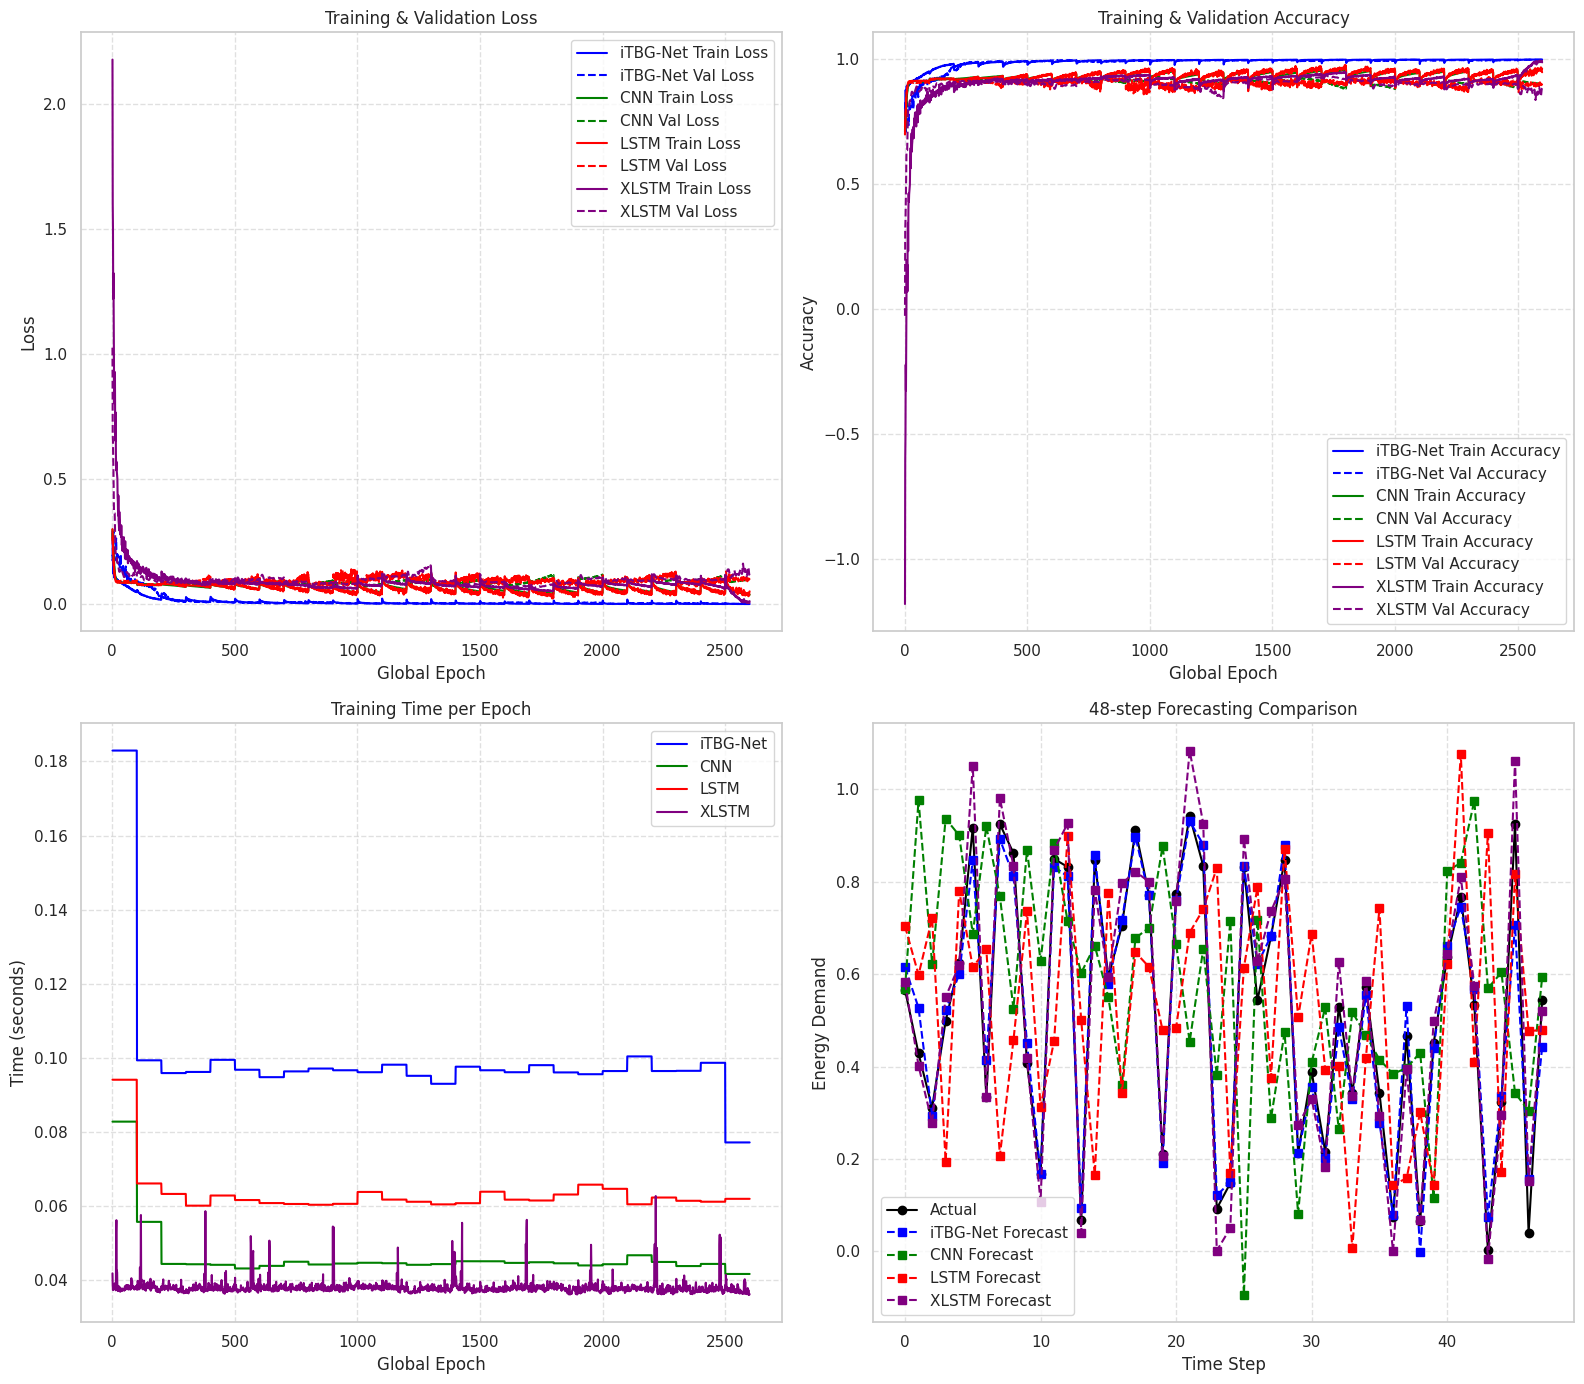

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load Metrics for Each Model
# ---------------------------
hybrid_data = np.load("hybrid_metrics.npz")
cnn_data    = np.load("cnn_metrics.npz")
lstm_data   = np.load("lstm_metrics.npz")
xlstm_data  = np.load("xlstm_metrics.npz")

# Extract variables for the Hybrid model
hybrid_epochs      = hybrid_data["epochs"]
hybrid_loss        = hybrid_data["loss"]
hybrid_val_loss    = hybrid_data["val_loss"]
hybrid_accuracy    = hybrid_data["accuracy"]
hybrid_val_accuracy= hybrid_data["val_accuracy"]
hybrid_epoch_times = hybrid_data["epoch_times"]
hybrid_forecast    = hybrid_data["forecast_pred"]
hybrid_actual      = hybrid_data["actual"]

# Extract variables for the CNN model
cnn_epochs         = cnn_data["epochs"]
cnn_loss           = cnn_data["loss"]
cnn_val_loss       = cnn_data["val_loss"]
cnn_accuracy       = cnn_data["accuracy"]
cnn_val_accuracy   = cnn_data["val_accuracy"]
cnn_epoch_times    = cnn_data["epoch_times"]
cnn_forecast       = cnn_data["forecast_pred"]
cnn_actual         = cnn_data["actual"]

# Extract variables for the LSTM model
lstm_epochs        = lstm_data["epochs"]
lstm_loss          = lstm_data["loss"]
lstm_val_loss      = lstm_data["val_loss"]
lstm_accuracy      = lstm_data["accuracy"]
lstm_val_accuracy  = lstm_data["val_accuracy"]
lstm_epoch_times   = lstm_data["epoch_times"]
lstm_forecast      = lstm_data["forecast_pred"]
lstm_actual        = lstm_data["actual"]

# Extract variables for the XLSTM model
xlstm_epochs       = xlstm_data["epochs"]
xlstm_loss         = xlstm_data["loss"]
xlstm_val_loss     = xlstm_data["val_loss"]
xlstm_accuracy     = xlstm_data["accuracy"]
xlstm_val_accuracy = xlstm_data["val_accuracy"]
xlstm_epoch_times  = xlstm_data["epoch_times"]
xlstm_forecast     = xlstm_data["forecast_pred"]
xlstm_actual       = xlstm_data["actual"]

# ---------------------------
# Create Subplots for Comparison
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(16, 14))

# --- Subplot 1: Training and Validation Loss vs. Epoch ---
axs[0, 0].plot(hybrid_epochs, hybrid_loss, label='iTBG-Net Train Loss', color='blue')
axs[0, 0].plot(hybrid_epochs, hybrid_val_loss, label='iTBG-Net Val Loss', color='blue', linestyle='--')

axs[0, 0].plot(cnn_epochs, cnn_loss, label='CNN Train Loss', color='green')
axs[0, 0].plot(cnn_epochs, cnn_val_loss, label='CNN Val Loss', color='green', linestyle='--')

axs[0, 0].plot(lstm_epochs, lstm_loss, label='LSTM Train Loss', color='red')
axs[0, 0].plot(lstm_epochs, lstm_val_loss, label='LSTM Val Loss', color='red', linestyle='--')

axs[0, 0].plot(xlstm_epochs, xlstm_loss, label='XLSTM Train Loss', color='purple')
axs[0, 0].plot(xlstm_epochs, xlstm_val_loss, label='XLSTM Val Loss', color='purple', linestyle='--')

axs[0, 0].set_title('Training & Validation Loss')
axs[0, 0].set_xlabel('Global Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

# --- Subplot 2: Training and Validation Accuracy vs. Epoch ---
axs[0, 1].plot(hybrid_epochs, hybrid_accuracy, label='iTBG-Net Train Accuracy', color='blue')
axs[0, 1].plot(hybrid_epochs, hybrid_val_accuracy, label='iTBG-Net Val Accuracy', color='blue', linestyle='--')

axs[0, 1].plot(cnn_epochs, cnn_accuracy, label='CNN Train Accuracy', color='green')
axs[0, 1].plot(cnn_epochs, cnn_val_accuracy, label='CNN Val Accuracy', color='green', linestyle='--')

axs[0, 1].plot(lstm_epochs, lstm_accuracy, label='LSTM Train Accuracy', color='red')
axs[0, 1].plot(lstm_epochs, lstm_val_accuracy, label='LSTM Val Accuracy', color='red', linestyle='--')

axs[0, 1].plot(xlstm_epochs, xlstm_accuracy, label='XLSTM Train Accuracy', color='purple')
axs[0, 1].plot(xlstm_epochs, xlstm_val_accuracy, label='XLSTM Val Accuracy', color='purple', linestyle='--')

axs[0, 1].set_title('Training & Validation Accuracy')
axs[0, 1].set_xlabel('Global Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle='--', alpha=0.6)

# --- Subplot 3: Training Time per Epoch ---
axs[1, 0].plot(hybrid_epochs, hybrid_epoch_times, label='iTBG-Net', color='blue')
axs[1, 0].plot(cnn_epochs, cnn_epoch_times, label='CNN', color='green')
axs[1, 0].plot(lstm_epochs, lstm_epoch_times, label='LSTM', color='red')
axs[1, 0].plot(xlstm_epochs, xlstm_epoch_times, label='XLSTM', color='purple')

axs[1, 0].set_title('Training Time per Epoch')
axs[1, 0].set_xlabel('Global Epoch')
axs[1, 0].set_ylabel('Time (seconds)')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle='--', alpha=0.6)

# --- Subplot 4: Forecasting Comparison (48-step) ---
# Here, we assume that the actual forecast target is the same across models.
# (If different, you might average or pick one, since ideally they should match.)
time_steps = np.arange(48)
axs[1, 1].plot(time_steps, hybrid_actual, label='Actual', color='black', marker='o')
axs[1, 1].plot(time_steps, hybrid_forecast, label='iTBG-Net Forecast', color='blue', linestyle='--', marker='s')
axs[1, 1].plot(time_steps, cnn_forecast, label='CNN Forecast', color='green', linestyle='--', marker='s')
axs[1, 1].plot(time_steps, lstm_forecast, label='LSTM Forecast', color='red', linestyle='--', marker='s')
axs[1, 1].plot(time_steps, xlstm_forecast, label='XLSTM Forecast', color='purple', linestyle='--', marker='s')

axs[1, 1].set_title('48-step Forecasting Comparison')
axs[1, 1].set_xlabel('Time Step')
axs[1, 1].set_ylabel('Energy Demand')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()


The above results show that after some time, incremental learning keeps learning and batch-based learning stops learning, and after a while it keeps the lines straight, which means the model doesn't have more capacity to learn new data points, but the streaming model also keeps the old training and learning new data points, which is a good gesture to the natural learning process.

# Comparison of 5 Models, including LSTM Non-Incremental

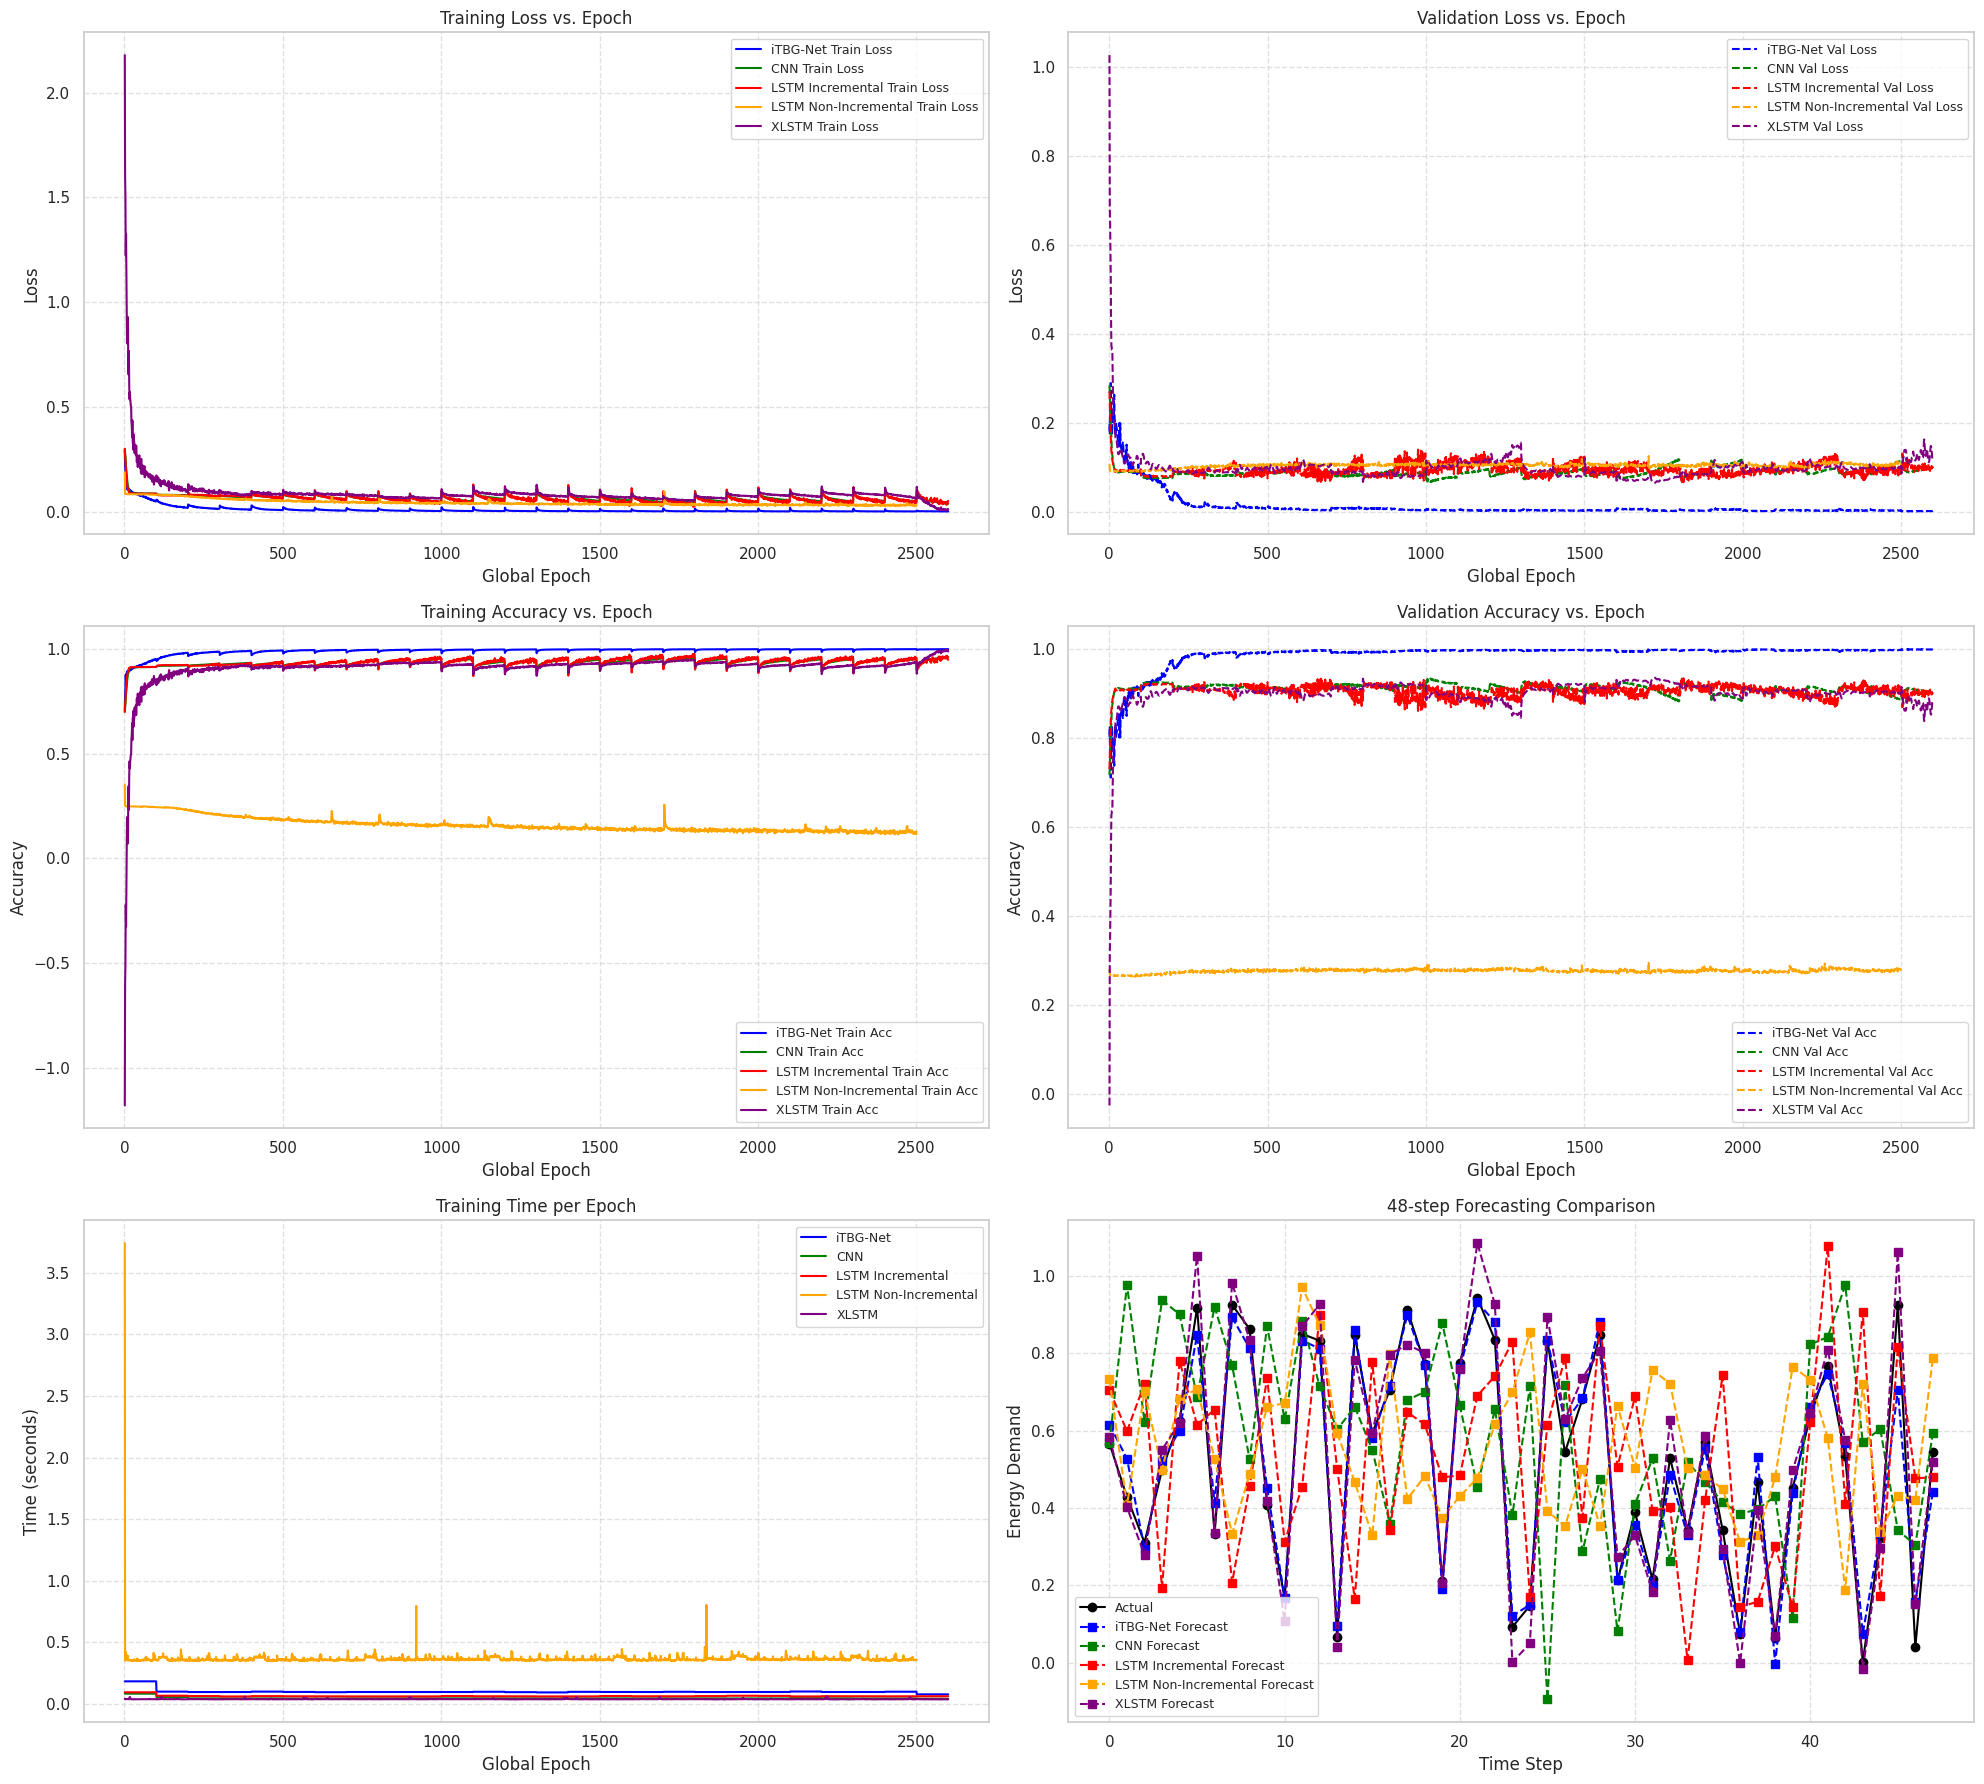

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load Metrics for Each Model
# -----------------------------
hybrid_data    = np.load("hybrid_metrics.npz")
cnn_data       = np.load("cnn_metrics.npz")
lstm_data      = np.load("lstm_metrics.npz")
lstm_nonil_data= np.load("lstm_nonil_metrics.npz")
xlstm_data     = np.load("xlstm_metrics.npz")

# Extract arrays for the Hybrid TCN-GRU-LSTM model
hybrid_epochs       = hybrid_data["epochs"]
hybrid_loss         = hybrid_data["loss"]
hybrid_val_loss     = hybrid_data["val_loss"]
hybrid_accuracy     = hybrid_data["accuracy"]
hybrid_val_accuracy = hybrid_data["val_accuracy"]
hybrid_epoch_times  = hybrid_data["epoch_times"]
hybrid_forecast     = hybrid_data["forecast_pred"]
hybrid_actual       = hybrid_data["actual"]

# Extract arrays for the CNN model
cnn_epochs          = cnn_data["epochs"]
cnn_loss            = cnn_data["loss"]
cnn_val_loss        = cnn_data["val_loss"]
cnn_accuracy        = cnn_data["accuracy"]
cnn_val_accuracy    = cnn_data["val_accuracy"]
cnn_epoch_times     = cnn_data["epoch_times"]
cnn_forecast        = cnn_data["forecast_pred"]
cnn_actual          = cnn_data["actual"]

# Extract arrays for the Incremental LSTM model
lstm_epochs         = lstm_data["epochs"]
lstm_loss           = lstm_data["loss"]
lstm_val_loss       = lstm_data["val_loss"]
lstm_accuracy       = lstm_data["accuracy"]
lstm_val_accuracy   = lstm_data["val_accuracy"]
lstm_epoch_times    = lstm_data["epoch_times"]
lstm_forecast       = lstm_data["forecast_pred"]
lstm_actual         = lstm_data["actual"]

# Extract arrays for the Non-Incremental LSTM model
lstm_nonil_epochs         = lstm_nonil_data["epochs"]
lstm_nonil_loss           = lstm_nonil_data["loss"]
lstm_nonil_val_loss       = lstm_nonil_data["val_loss"]
lstm_nonil_accuracy       = lstm_nonil_data["accuracy"]
lstm_nonil_val_accuracy   = lstm_nonil_data["val_accuracy"]
lstm_nonil_epoch_times    = lstm_nonil_data["epoch_times"]
lstm_nonil_forecast       = lstm_nonil_data["forecast_pred"]
lstm_nonil_actual         = lstm_nonil_data["actual"]

# Extract arrays for the XLSTM model
xlstm_epochs       = xlstm_data["epochs"]
xlstm_loss         = xlstm_data["loss"]
xlstm_val_loss     = xlstm_data["val_loss"]
xlstm_accuracy     = xlstm_data["accuracy"]
xlstm_val_accuracy = xlstm_data["val_accuracy"]
xlstm_epoch_times  = xlstm_data["epoch_times"]
xlstm_forecast     = xlstm_data["forecast_pred"]
xlstm_actual       = xlstm_data["actual"]

# For forecasting, we assume that the actual target is the same across models.
# (If not, you can choose one of them. Here, we choose the Hybrid model's actual.)
actual_forecast = hybrid_actual  # shape: (48,)

# -----------------------------
# Create Subplots for Comparison (3 rows x 2 columns)
# -----------------------------
fig, axs = plt.subplots(3, 2, figsize=(20, 18))

# Subplot 1: Training Loss vs. Epoch
axs[0, 0].plot(hybrid_epochs, hybrid_loss, label='iTBG-Net Train Loss', color='blue')
axs[0, 0].plot(cnn_epochs, cnn_loss, label='CNN Train Loss', color='green')
axs[0, 0].plot(lstm_epochs, lstm_loss, label='LSTM Incremental Train Loss', color='red')
axs[0, 0].plot(lstm_nonil_epochs, lstm_nonil_loss, label='LSTM Non-Incremental Train Loss', color='orange')
axs[0, 0].plot(xlstm_epochs, xlstm_loss, label='XLSTM Train Loss', color='purple')
axs[0, 0].set_title('Training Loss vs. Epoch')
axs[0, 0].set_xlabel('Global Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(fontsize=9)
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Validation Loss vs. Epoch
axs[0, 1].plot(hybrid_epochs, hybrid_val_loss, label='iTBG-Net Val Loss', color='blue', linestyle='--')
axs[0, 1].plot(cnn_epochs, cnn_val_loss, label='CNN Val Loss', color='green', linestyle='--')
axs[0, 1].plot(lstm_epochs, lstm_val_loss, label='LSTM Incremental Val Loss', color='red', linestyle='--')
axs[0, 1].plot(lstm_nonil_epochs, lstm_nonil_val_loss, label='LSTM Non-Incremental Val Loss', color='orange', linestyle='--')
axs[0, 1].plot(xlstm_epochs, xlstm_val_loss, label='XLSTM Val Loss', color='purple', linestyle='--')
axs[0, 1].set_title('Validation Loss vs. Epoch')
axs[0, 1].set_xlabel('Global Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend(fontsize=9)
axs[0, 1].grid(True, linestyle='--', alpha=0.6)

# Subplot 3: Training Accuracy vs. Epoch
axs[1, 0].plot(hybrid_epochs, hybrid_accuracy, label='iTBG-Net Train Acc', color='blue')
axs[1, 0].plot(cnn_epochs, cnn_accuracy, label='CNN Train Acc', color='green')
axs[1, 0].plot(lstm_epochs, lstm_accuracy, label='LSTM Incremental Train Acc', color='red')
axs[1, 0].plot(lstm_nonil_epochs, lstm_nonil_accuracy, label='LSTM Non-Incremental Train Acc', color='orange')
axs[1, 0].plot(xlstm_epochs, xlstm_accuracy, label='XLSTM Train Acc', color='purple')
axs[1, 0].set_title('Training Accuracy vs. Epoch')
axs[1, 0].set_xlabel('Global Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend(fontsize=9)
axs[1, 0].grid(True, linestyle='--', alpha=0.6)

# Subplot 4: Validation Accuracy vs. Epoch
axs[1, 1].plot(hybrid_epochs, hybrid_val_accuracy, label='iTBG-Net Val Acc', color='blue', linestyle='--')
axs[1, 1].plot(cnn_epochs, cnn_val_accuracy, label='CNN Val Acc', color='green', linestyle='--')
axs[1, 1].plot(lstm_epochs, lstm_val_accuracy, label='LSTM Incremental Val Acc', color='red', linestyle='--')
axs[1, 1].plot(lstm_nonil_epochs, lstm_nonil_val_accuracy, label='LSTM Non-Incremental Val Acc', color='orange', linestyle='--')
axs[1, 1].plot(xlstm_epochs, xlstm_val_accuracy, label='XLSTM Val Acc', color='purple', linestyle='--')
axs[1, 1].set_title('Validation Accuracy vs. Epoch')
axs[1, 1].set_xlabel('Global Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend(fontsize=9)
axs[1, 1].grid(True, linestyle='--', alpha=0.6)

# Subplot 5: Training Time per Epoch
axs[2, 0].plot(hybrid_epochs, hybrid_epoch_times, label='iTBG-Net', color='blue')
axs[2, 0].plot(cnn_epochs, cnn_epoch_times, label='CNN', color='green')
axs[2, 0].plot(lstm_epochs, lstm_epoch_times, label='LSTM Incremental', color='red')
axs[2, 0].plot(lstm_nonil_epochs, lstm_nonil_epoch_times, label='LSTM Non-Incremental', color='orange')
axs[2, 0].plot(xlstm_epochs, xlstm_epoch_times, label='XLSTM', color='purple')
axs[2, 0].set_title('Training Time per Epoch')
axs[2, 0].set_xlabel('Global Epoch')
axs[2, 0].set_ylabel('Time (seconds)')
axs[2, 0].legend(fontsize=9)
axs[2, 0].grid(True, linestyle='--', alpha=0.6)

# Subplot 6: Forecasting Comparison (48-step)
time_steps = np.arange(48)
axs[2, 1].plot(time_steps, actual_forecast, label='Actual', color='black', marker='o')
axs[2, 1].plot(time_steps, hybrid_forecast, label='iTBG-Net Forecast', color='blue', linestyle='--', marker='s')
axs[2, 1].plot(time_steps, cnn_forecast, label='CNN Forecast', color='green', linestyle='--', marker='s')
axs[2, 1].plot(time_steps, lstm_forecast, label='LSTM Incremental Forecast', color='red', linestyle='--', marker='s')
axs[2, 1].plot(time_steps, lstm_nonil_forecast, label='LSTM Non-Incremental Forecast', color='orange', linestyle='--', marker='s')
axs[2, 1].plot(time_steps, xlstm_forecast, label='XLSTM Forecast', color='purple', linestyle='--', marker='s')
axs[2, 1].set_title('48-step Forecasting Comparison')
axs[2, 1].set_xlabel('Time Step')
axs[2, 1].set_ylabel('Energy Demand')
axs[2, 1].legend(fontsize=9)
axs[2, 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()


In [54]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load Metrics for Each Model
# -----------------------------
hybrid_data     = np.load("hybrid_metrics.npz")
cnn_data        = np.load("cnn_metrics.npz")
lstm_data       = np.load("lstm_metrics.npz")
lstm_nonil_data = np.load("lstm_nonil_metrics.npz")
xlstm_data      = np.load("xlstm_metrics.npz")

# Extract arrays for the Hybrid TCN-GRU-LSTM model
hybrid_epochs       = hybrid_data["epochs"]
hybrid_loss         = hybrid_data["loss"]
hybrid_val_loss     = hybrid_data["val_loss"]
hybrid_accuracy     = hybrid_data["accuracy"]
hybrid_val_accuracy = hybrid_data["val_accuracy"]
hybrid_epoch_times  = hybrid_data["epoch_times"]
hybrid_forecast     = hybrid_data["forecast_pred"]
hybrid_actual       = hybrid_data["actual"]

# Extract arrays for the CNN model
cnn_epochs          = cnn_data["epochs"]
cnn_loss            = cnn_data["loss"]
cnn_val_loss        = cnn_data["val_loss"]
cnn_accuracy        = cnn_data["accuracy"]
cnn_val_accuracy    = cnn_data["val_accuracy"]
cnn_epoch_times     = cnn_data["epoch_times"]
cnn_forecast        = cnn_data["forecast_pred"]
cnn_actual          = cnn_data["actual"]

# Extract arrays for the Incremental LSTM model
lstm_epochs         = lstm_data["epochs"]
lstm_loss           = lstm_data["loss"]
lstm_val_loss       = lstm_data["val_loss"]
lstm_accuracy       = lstm_data["accuracy"]
lstm_val_accuracy   = lstm_data["val_accuracy"]
lstm_epoch_times    = lstm_data["epoch_times"]
lstm_forecast       = lstm_data["forecast_pred"]
lstm_actual         = lstm_data["actual"]

# Extract arrays for the Non-Incremental LSTM model
lstm_nonil_epochs         = lstm_nonil_data["epochs"]
lstm_nonil_loss           = lstm_nonil_data["loss"]
lstm_nonil_val_loss       = lstm_nonil_data["val_loss"]
lstm_nonil_accuracy       = lstm_nonil_data["accuracy"]
lstm_nonil_val_accuracy   = lstm_nonil_data["val_accuracy"]
lstm_nonil_epoch_times    = lstm_nonil_data["epoch_times"]
lstm_nonil_forecast       = lstm_nonil_data["forecast_pred"]
lstm_nonil_actual         = lstm_nonil_data["actual"]

# Extract arrays for the XLSTM model
xlstm_epochs       = xlstm_data["epochs"]
xlstm_loss         = xlstm_data["loss"]
xlstm_val_loss     = xlstm_data["val_loss"]
xlstm_accuracy     = xlstm_data["accuracy"]
xlstm_val_accuracy = xlstm_data["val_accuracy"]
xlstm_epoch_times  = xlstm_data["epoch_times"]
xlstm_forecast     = xlstm_data["forecast_pred"]
xlstm_actual       = xlstm_data["actual"]

# For forecasting, we assume the same actual target across models (choose Hybrid model's actual).
actual_forecast = hybrid_actual  # shape: (48,)

# Define a list to keep track of saved file names.
saved_files = []

# Function to save a figure in eps, png, and pdf formats.
def save_figure(fig, base_filename):
    formats = ['png', 'eps', 'pdf']
    for fmt in formats:
        filename = f"{base_filename}.{fmt}"
        fig.savefig(filename, dpi=300, bbox_inches="tight")
        saved_files.append(filename)

# -----------------------------
# 1. Plot: Training Loss vs. Epoch
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(hybrid_epochs, hybrid_loss, label='iTBG-Net Train Loss', color='blue')
plt.plot(cnn_epochs, cnn_loss, label='CNN Train Loss', color='green')
plt.plot(lstm_epochs, lstm_loss, label='LSTM Incremental Train Loss', color='red')
plt.plot(lstm_nonil_epochs, lstm_nonil_loss, label='LSTM Non-Incremental Train Loss', color='orange')
plt.plot(xlstm_epochs, xlstm_loss, label='XLSTM Train Loss', color='purple')
plt.title('Training Loss vs. Epoch', fontsize=10, fontweight="bold")
plt.xlabel('Global Epoch', fontsize=10, fontweight="bold")
plt.ylabel('Loss', fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_figure(fig, "plot1_train_loss_vs_epoch")
plt.close(fig)

# -----------------------------
# 2. Plot: Validation Loss vs. Epoch
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(hybrid_epochs, hybrid_val_loss, label='iTBG-Net Val Loss', color='blue', linestyle='--')
plt.plot(cnn_epochs, cnn_val_loss, label='CNN Val Loss', color='green', linestyle='--')
plt.plot(lstm_epochs, lstm_val_loss, label='LSTM Incremental Val Loss', color='red', linestyle='--')
plt.plot(lstm_nonil_epochs, lstm_nonil_val_loss, label='LSTM Non-Incremental Val Loss', color='orange', linestyle='--')
plt.plot(xlstm_epochs, xlstm_val_loss, label='XLSTM Val Loss', color='purple', linestyle='--')
plt.title('Validation Loss vs. Epoch', fontsize=10, fontweight="bold")
plt.xlabel('Global Epoch', fontsize=10, fontweight="bold")
plt.ylabel('Loss', fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_figure(fig, "plot2_val_loss_vs_epoch")
plt.close(fig)

# -----------------------------
# 3. Plot: Training Accuracy vs. Epoch
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(hybrid_epochs, hybrid_accuracy, label='iTBG-Net Train Acc', color='blue')
plt.plot(cnn_epochs, cnn_accuracy, label='CNN Train Acc', color='green')
plt.plot(lstm_epochs, lstm_accuracy, label='LSTM Incremental Train Acc', color='red')
plt.plot(lstm_nonil_epochs, lstm_nonil_accuracy, label='LSTM Non-Incremental Train Acc', color='orange')
plt.plot(xlstm_epochs, xlstm_accuracy, label='XLSTM Train Acc', color='purple')
plt.title('Training Accuracy vs. Epoch', fontsize=10, fontweight="bold")
plt.xlabel('Global Epoch', fontsize=10, fontweight="bold")
plt.ylabel('Accuracy', fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_figure(fig, "plot3_train_accuracy_vs_epoch")
plt.close(fig)

# -----------------------------
# 4. Plot: Validation Accuracy vs. Epoch
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(hybrid_epochs, hybrid_val_accuracy, label='iTBG-Net Val Acc', color='blue', linestyle='--')
plt.plot(cnn_epochs, cnn_val_accuracy, label='CNN Val Acc', color='green', linestyle='--')
plt.plot(lstm_epochs, lstm_val_accuracy, label='LSTM Incremental Val Acc', color='red', linestyle='--')
plt.plot(lstm_nonil_epochs, lstm_nonil_val_accuracy, label='LSTM Non-Incremental Val Acc', color='orange', linestyle='--')
plt.plot(xlstm_epochs, xlstm_val_accuracy, label='XLSTM Val Acc', color='purple', linestyle='--')
plt.title('Validation Accuracy vs. Epoch', fontsize=10, fontweight="bold")
plt.xlabel('Global Epoch', fontsize=10, fontweight="bold")
plt.ylabel('Accuracy', fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_figure(fig, "plot4_val_accuracy_vs_epoch")
plt.close(fig)

# -----------------------------
# 5. Plot: Training Time per Epoch
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(hybrid_epochs, hybrid_epoch_times, label='iTBG-Net', color='blue')
plt.plot(cnn_epochs, cnn_epoch_times, label='CNN', color='green')
plt.plot(lstm_epochs, lstm_epoch_times, label='LSTM Incremental', color='red')
plt.plot(lstm_nonil_epochs, lstm_nonil_epoch_times, label='LSTM Non-Incremental', color='orange')
plt.plot(xlstm_epochs, xlstm_epoch_times, label='XLSTM', color='purple')
plt.title('Training Time per Epoch', fontsize=10, fontweight="bold")
plt.xlabel('Global Epoch', fontsize=10, fontweight="bold")
plt.ylabel('Time (seconds)', fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_figure(fig, "plot5_training_time_per_epoch")
plt.close(fig)

# -----------------------------
# 6. Plot: 48-step Forecasting Comparison
# -----------------------------
time_steps = np.arange(48)
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(time_steps, actual_forecast, label='Actual', color='black', marker='o')
plt.plot(time_steps, hybrid_forecast, label='iTBG-Net Forecast', color='blue', linestyle='--', marker='s')
plt.plot(time_steps, cnn_forecast, label='CNN Forecast', color='green', linestyle='--', marker='s')
plt.plot(time_steps, lstm_forecast, label='LSTM Incremental Forecast', color='red', linestyle='--', marker='s')
plt.plot(time_steps, lstm_nonil_forecast, label='LSTM Non-Incremental Forecast', color='orange', linestyle='--', marker='s')
plt.plot(time_steps, xlstm_forecast, label='XLSTM Forecast', color='purple', linestyle='--', marker='s')
plt.title('48-step Forecasting Comparison', fontsize=10, fontweight="bold")
plt.xlabel('Time Step', fontsize=10, fontweight="bold")
plt.ylabel('Energy Demand', fontsize=10, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
save_figure(fig, "plot6_forecasting_comparison")
plt.close(fig)

# -----------------------------
# Zip the Saved Files
# -----------------------------
zip_filename = "model_comparison_plots.zip"
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in saved_files:
        zipf.write(file)
        
print(f"Saved files have been zipped into: {zip_filename}")


Saved files have been zipped into: model_comparison_plots.zip


In [28]:
!pip install dataframe_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 67.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 40.0 MB/s eta 0:00:00:00:0100:01


In [29]:
!pip install nest_asyncio

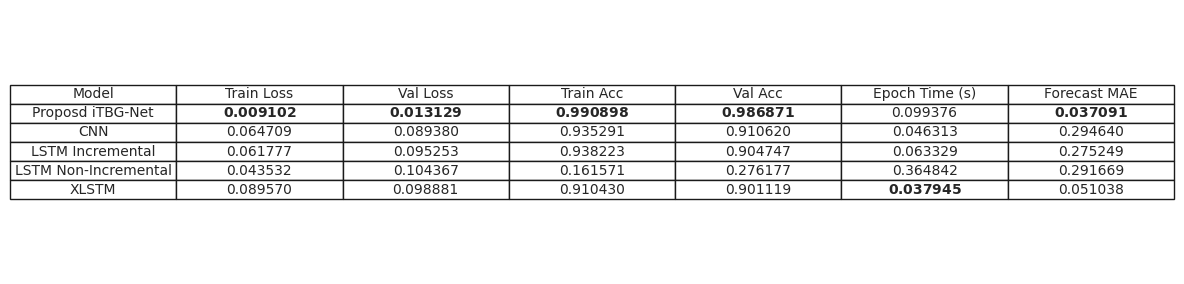

                  Model  Train Loss  Val Loss  Train Acc   Val Acc  \
0      Proposd iTBG-Net    0.009102  0.013129   0.990898  0.986871   
1                   CNN    0.064709  0.089380   0.935291  0.910620   
2      LSTM Incremental    0.061777  0.095253   0.938223  0.904747   
3  LSTM Non-Incremental    0.043532  0.104367   0.161571  0.276177   
4                 XLSTM    0.089570  0.098881   0.910430  0.901119   

   Epoch Time (s)  Forecast MAE  
0        0.099376      0.037091  
1        0.046313      0.294640  
2        0.063329      0.275249  
3        0.364842      0.291669  
4        0.037945      0.051038  


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load Metrics for Each Model (using absolute paths)
# -----------------------------
hybrid_data     = np.load("/kaggle/working/hybrid_metrics.npz")
cnn_data        = np.load("/kaggle/working/cnn_metrics.npz")
lstm_data       = np.load("/kaggle/working/lstm_metrics.npz")
lstm_nonil_data = np.load("/kaggle/working/lstm_nonil_metrics.npz")
xlstm_data      = np.load("/kaggle/working/xlstm_metrics.npz")

# Extract variables for the Hybrid TCN-GRU-LSTM model
hybrid_epochs       = hybrid_data["epochs"]
hybrid_loss         = hybrid_data["loss"]
hybrid_val_loss     = hybrid_data["val_loss"]
hybrid_accuracy     = hybrid_data["accuracy"]
hybrid_val_accuracy = hybrid_data["val_accuracy"]
hybrid_epoch_times  = hybrid_data["epoch_times"]
hybrid_forecast     = hybrid_data["forecast_pred"]
hybrid_actual       = hybrid_data["actual"]

# Extract variables for the CNN model
cnn_epochs          = cnn_data["epochs"]
cnn_loss            = cnn_data["loss"]
cnn_val_loss        = cnn_data["val_loss"]
cnn_accuracy        = cnn_data["accuracy"]
cnn_val_accuracy    = cnn_data["val_accuracy"]
cnn_epoch_times     = cnn_data["epoch_times"]
cnn_forecast        = cnn_data["forecast_pred"]
cnn_actual          = cnn_data["actual"]

# Extract variables for the Incremental LSTM model
lstm_epochs         = lstm_data["epochs"]
lstm_loss           = lstm_data["loss"]
lstm_val_loss       = lstm_data["val_loss"]
lstm_accuracy       = lstm_data["accuracy"]
lstm_val_accuracy   = lstm_data["val_accuracy"]
lstm_epoch_times    = lstm_data["epoch_times"]
lstm_forecast       = lstm_data["forecast_pred"]
lstm_actual         = lstm_data["actual"]

# Extract variables for the Non-Incremental LSTM model
lstm_nonil_epochs         = lstm_nonil_data["epochs"]
lstm_nonil_loss           = lstm_nonil_data["loss"]
lstm_nonil_val_loss       = lstm_nonil_data["val_loss"]
lstm_nonil_accuracy       = lstm_nonil_data["accuracy"]
lstm_nonil_val_accuracy   = lstm_nonil_data["val_accuracy"]
lstm_nonil_epoch_times    = lstm_nonil_data["epoch_times"]
lstm_nonil_forecast       = lstm_nonil_data["forecast_pred"]
lstm_nonil_actual         = lstm_nonil_data["actual"]

# Extract variables for the XLSTM model
xlstm_epochs       = xlstm_data["epochs"]
xlstm_loss         = xlstm_data["loss"]
xlstm_val_loss     = xlstm_data["val_loss"]
xlstm_accuracy     = xlstm_data["accuracy"]
xlstm_val_accuracy = xlstm_data["val_accuracy"]
xlstm_epoch_times  = xlstm_data["epoch_times"]
xlstm_forecast     = xlstm_data["forecast_pred"]
xlstm_actual       = xlstm_data["actual"]

# For forecasting, we assume that the actual target is identical across models.
# (If not, adjust accordingly; here we use Hybrid's actual.)
actual_forecast = hybrid_actual  # shape: (48,)

# -----------------------------
# Compute Mean Metrics for Each Model
# -----------------------------
def forecast_mae(forecast, actual):
    return np.mean(np.abs(forecast - actual))

hybrid_mean_train_loss = np.mean(hybrid_loss)
hybrid_mean_val_loss   = np.mean(hybrid_val_loss)
hybrid_mean_train_acc  = np.mean(hybrid_accuracy)
hybrid_mean_val_acc    = np.mean(hybrid_val_accuracy)
hybrid_mean_time       = np.mean(hybrid_epoch_times)
hybrid_forecast_mae    = forecast_mae(hybrid_forecast, hybrid_actual)

cnn_mean_train_loss = np.mean(cnn_loss)
cnn_mean_val_loss   = np.mean(cnn_val_loss)
cnn_mean_train_acc  = np.mean(cnn_accuracy)
cnn_mean_val_acc    = np.mean(cnn_val_accuracy)
cnn_mean_time       = np.mean(cnn_epoch_times)
cnn_forecast_mae    = forecast_mae(cnn_forecast, cnn_actual)

lstm_mean_train_loss = np.mean(lstm_loss)
lstm_mean_val_loss   = np.mean(lstm_val_loss)
lstm_mean_train_acc  = np.mean(lstm_accuracy)
lstm_mean_val_acc    = np.mean(lstm_val_accuracy)
lstm_mean_time       = np.mean(lstm_epoch_times)
lstm_forecast_mae    = forecast_mae(lstm_forecast, lstm_actual)

lstm_nonil_mean_train_loss = np.mean(lstm_nonil_loss)
lstm_nonil_mean_val_loss   = np.mean(lstm_nonil_val_loss)
lstm_nonil_mean_train_acc  = np.mean(lstm_nonil_accuracy)
lstm_nonil_mean_val_acc    = np.mean(lstm_nonil_val_accuracy)
lstm_nonil_mean_time       = np.mean(lstm_nonil_epoch_times)
lstm_nonil_forecast_mae    = forecast_mae(lstm_nonil_forecast, lstm_nonil_actual)

xlstm_mean_train_loss = np.mean(xlstm_loss)
xlstm_mean_val_loss   = np.mean(xlstm_val_loss)
xlstm_mean_train_acc  = np.mean(xlstm_accuracy)
xlstm_mean_val_acc    = np.mean(xlstm_val_accuracy)
xlstm_mean_time       = np.mean(xlstm_epoch_times)
xlstm_forecast_mae    = forecast_mae(xlstm_forecast, xlstm_actual)

# -----------------------------
# Create a Comparison DataFrame
# -----------------------------
df = pd.DataFrame({
    "Model": ["Proposd iTBG-Net", "CNN", "LSTM Incremental", "LSTM Non-Incremental", "XLSTM"],
    "Train Loss": [hybrid_mean_train_loss, cnn_mean_train_loss, lstm_mean_train_loss, lstm_nonil_mean_train_loss, xlstm_mean_train_loss],
    "Val Loss": [hybrid_mean_val_loss, cnn_mean_val_loss, lstm_mean_val_loss, lstm_nonil_mean_val_loss, xlstm_mean_val_loss],
    "Train Acc": [hybrid_mean_train_acc, cnn_mean_train_acc, lstm_mean_train_acc, lstm_nonil_mean_train_acc, xlstm_mean_train_acc],
    "Val Acc": [hybrid_mean_val_acc, cnn_mean_val_acc, lstm_mean_val_acc, lstm_nonil_mean_val_acc, xlstm_mean_val_acc],
    "Epoch Time (s)": [hybrid_mean_time, cnn_mean_time, lstm_mean_time, lstm_nonil_mean_time, xlstm_mean_time],
    "Forecast MAE": [hybrid_forecast_mae, cnn_forecast_mae, lstm_forecast_mae, lstm_nonil_forecast_mae, xlstm_forecast_mae]
})

# -----------------------------
# Highlight Best Values Using LaTeX Bold Formatting
# -----------------------------
# For columns where lower is better: Train Loss, Val Loss, Epoch Time (s), Forecast MAE
# For columns where higher is better: Train Acc, Val Acc
def format_cell(val, best, higher_is_better, decimals=6):
    fmt_val = f"{val:.{decimals}f}"
    if higher_is_better:
        if np.isclose(val, best, atol=1e-6):
            return r"$\mathbf{" + fmt_val + "}$"
    else:
        if np.isclose(val, best, atol=1e-6):
            return r"$\mathbf{" + fmt_val + "}$"
    return fmt_val

df_formatted = df.copy()
for col in df.columns:
    if col == "Model":
        continue
    if col in ["Train Acc", "Val Acc"]:
        best = df[col].max()
        df_formatted[col] = df[col].apply(lambda x: format_cell(x, best, higher_is_better=True))
    else:
        best = df[col].min()
        df_formatted[col] = df[col].apply(lambda x: format_cell(x, best, higher_is_better=False))

# Create a 2D list for the table including headers
table_data = [df_formatted.columns.tolist()] + df_formatted.values.tolist()

# -----------------------------
# Create a Matplotlib Table and Save as PNG and EPS
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=table_data, colLabels=None, loc='center', cellLoc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
fig.tight_layout()
plt.savefig("/kaggle/working/model_comparison_table.png", dpi=300)
plt.savefig("/kaggle/working/model_comparison_table.eps", format='eps')
plt.show()

# Also print the plain DataFrame (without LaTeX formatting) for reference
print(df)


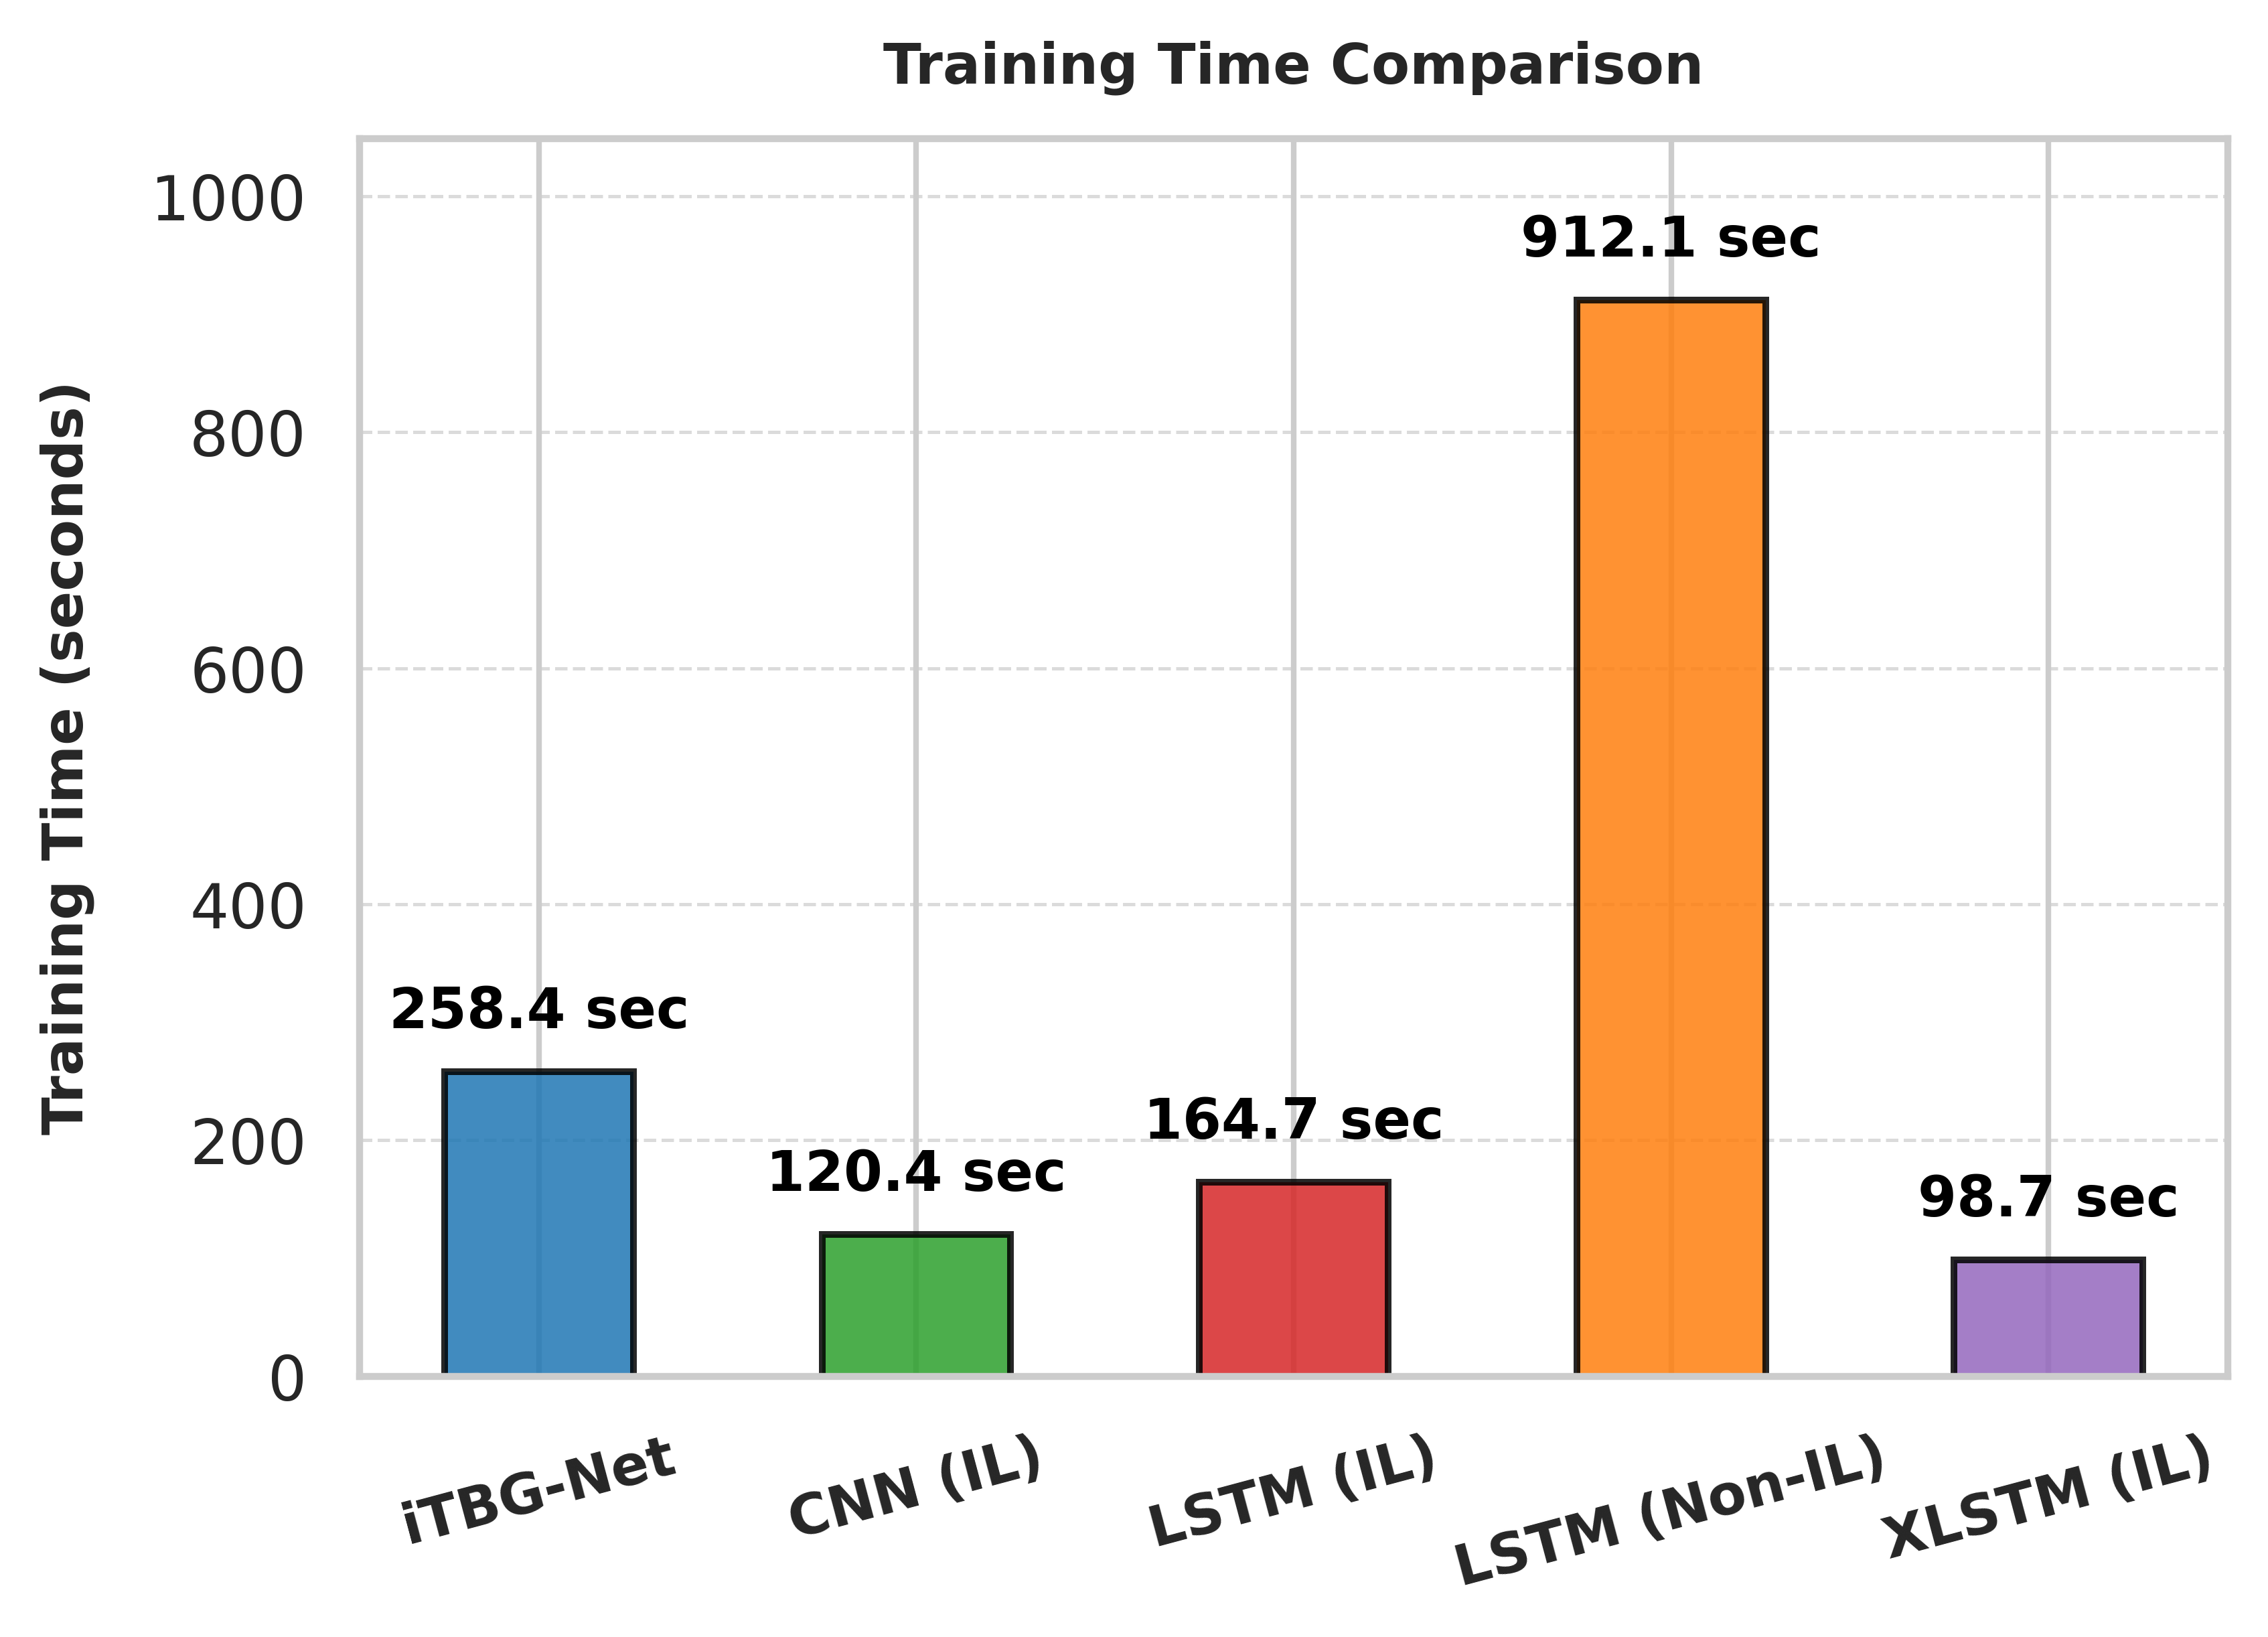

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names and training time per epoch
models_training_time = {
    "iTBG-Net": np.sum(hybrid_epoch_times),
    "CNN (IL)": np.sum(cnn_epoch_times),
    "LSTM (IL)": np.sum(lstm_epoch_times),
    "LSTM (Non-IL)": np.sum(lstm_nonil_epoch_times),
    "XLSTM (IL)": np.sum(xlstm_epoch_times),
}

# Define modern colors
model_colors = {
    "iTBG-Net": "#1f77b4",  # Blue
    "CNN (IL)": "#2ca02c",  # Green
    "LSTM (IL)": "#d62728",  # Red
    "LSTM (Non-IL)": "#ff7f0e",  # Orange
    "XLSTM (IL)": "#9467bd",  # Purple
}

# Create a bar chart with a professional design
plt.figure(figsize=(6, 4), dpi=600)  # High-resolution figure

bar_width = 0.5  # Slightly thinner bars for better spacing
bars = plt.bar(models_training_time.keys(), models_training_time.values(),
               color=[model_colors[m] for m in models_training_time.keys()], 
               edgecolor='black', linewidth=1.2, width=bar_width, alpha=0.85)

# Add value labels on top of each bar (formatted with thousands separator)
max_height = max(models_training_time.values())  # Get the highest value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.03 * max_height,  # Added extra spacing
             f'{height:,.1f} sec', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adjust upper limit to avoid values touching the border
plt.ylim(0, max_height * 1.15)  # Adding 15% extra space above the tallest bar

# Labels and title
plt.ylabel("Training Time (seconds)", fontsize=10, fontweight="bold", labelpad=10)
plt.title("Training Time Comparison", fontsize=10, fontweight="bold", pad=10)

# Rotate x-axis labels for better readability and make them bold
plt.xticks(rotation=15, fontsize=10, fontweight="bold")

# Show grid only on the y-axis
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)

# Save the figure in high resolution
plt.savefig("Total_Training_Time_BarChart_all.eps", dpi=600, bbox_inches="tight")
plt.savefig("Total_Training_Time_BarChart_all.png", dpi=600, bbox_inches="tight")
plt.savefig("Total_Training_Time_BarChart_all.pdf", dpi=600, bbox_inches="tight")

# Show plot
plt.show()

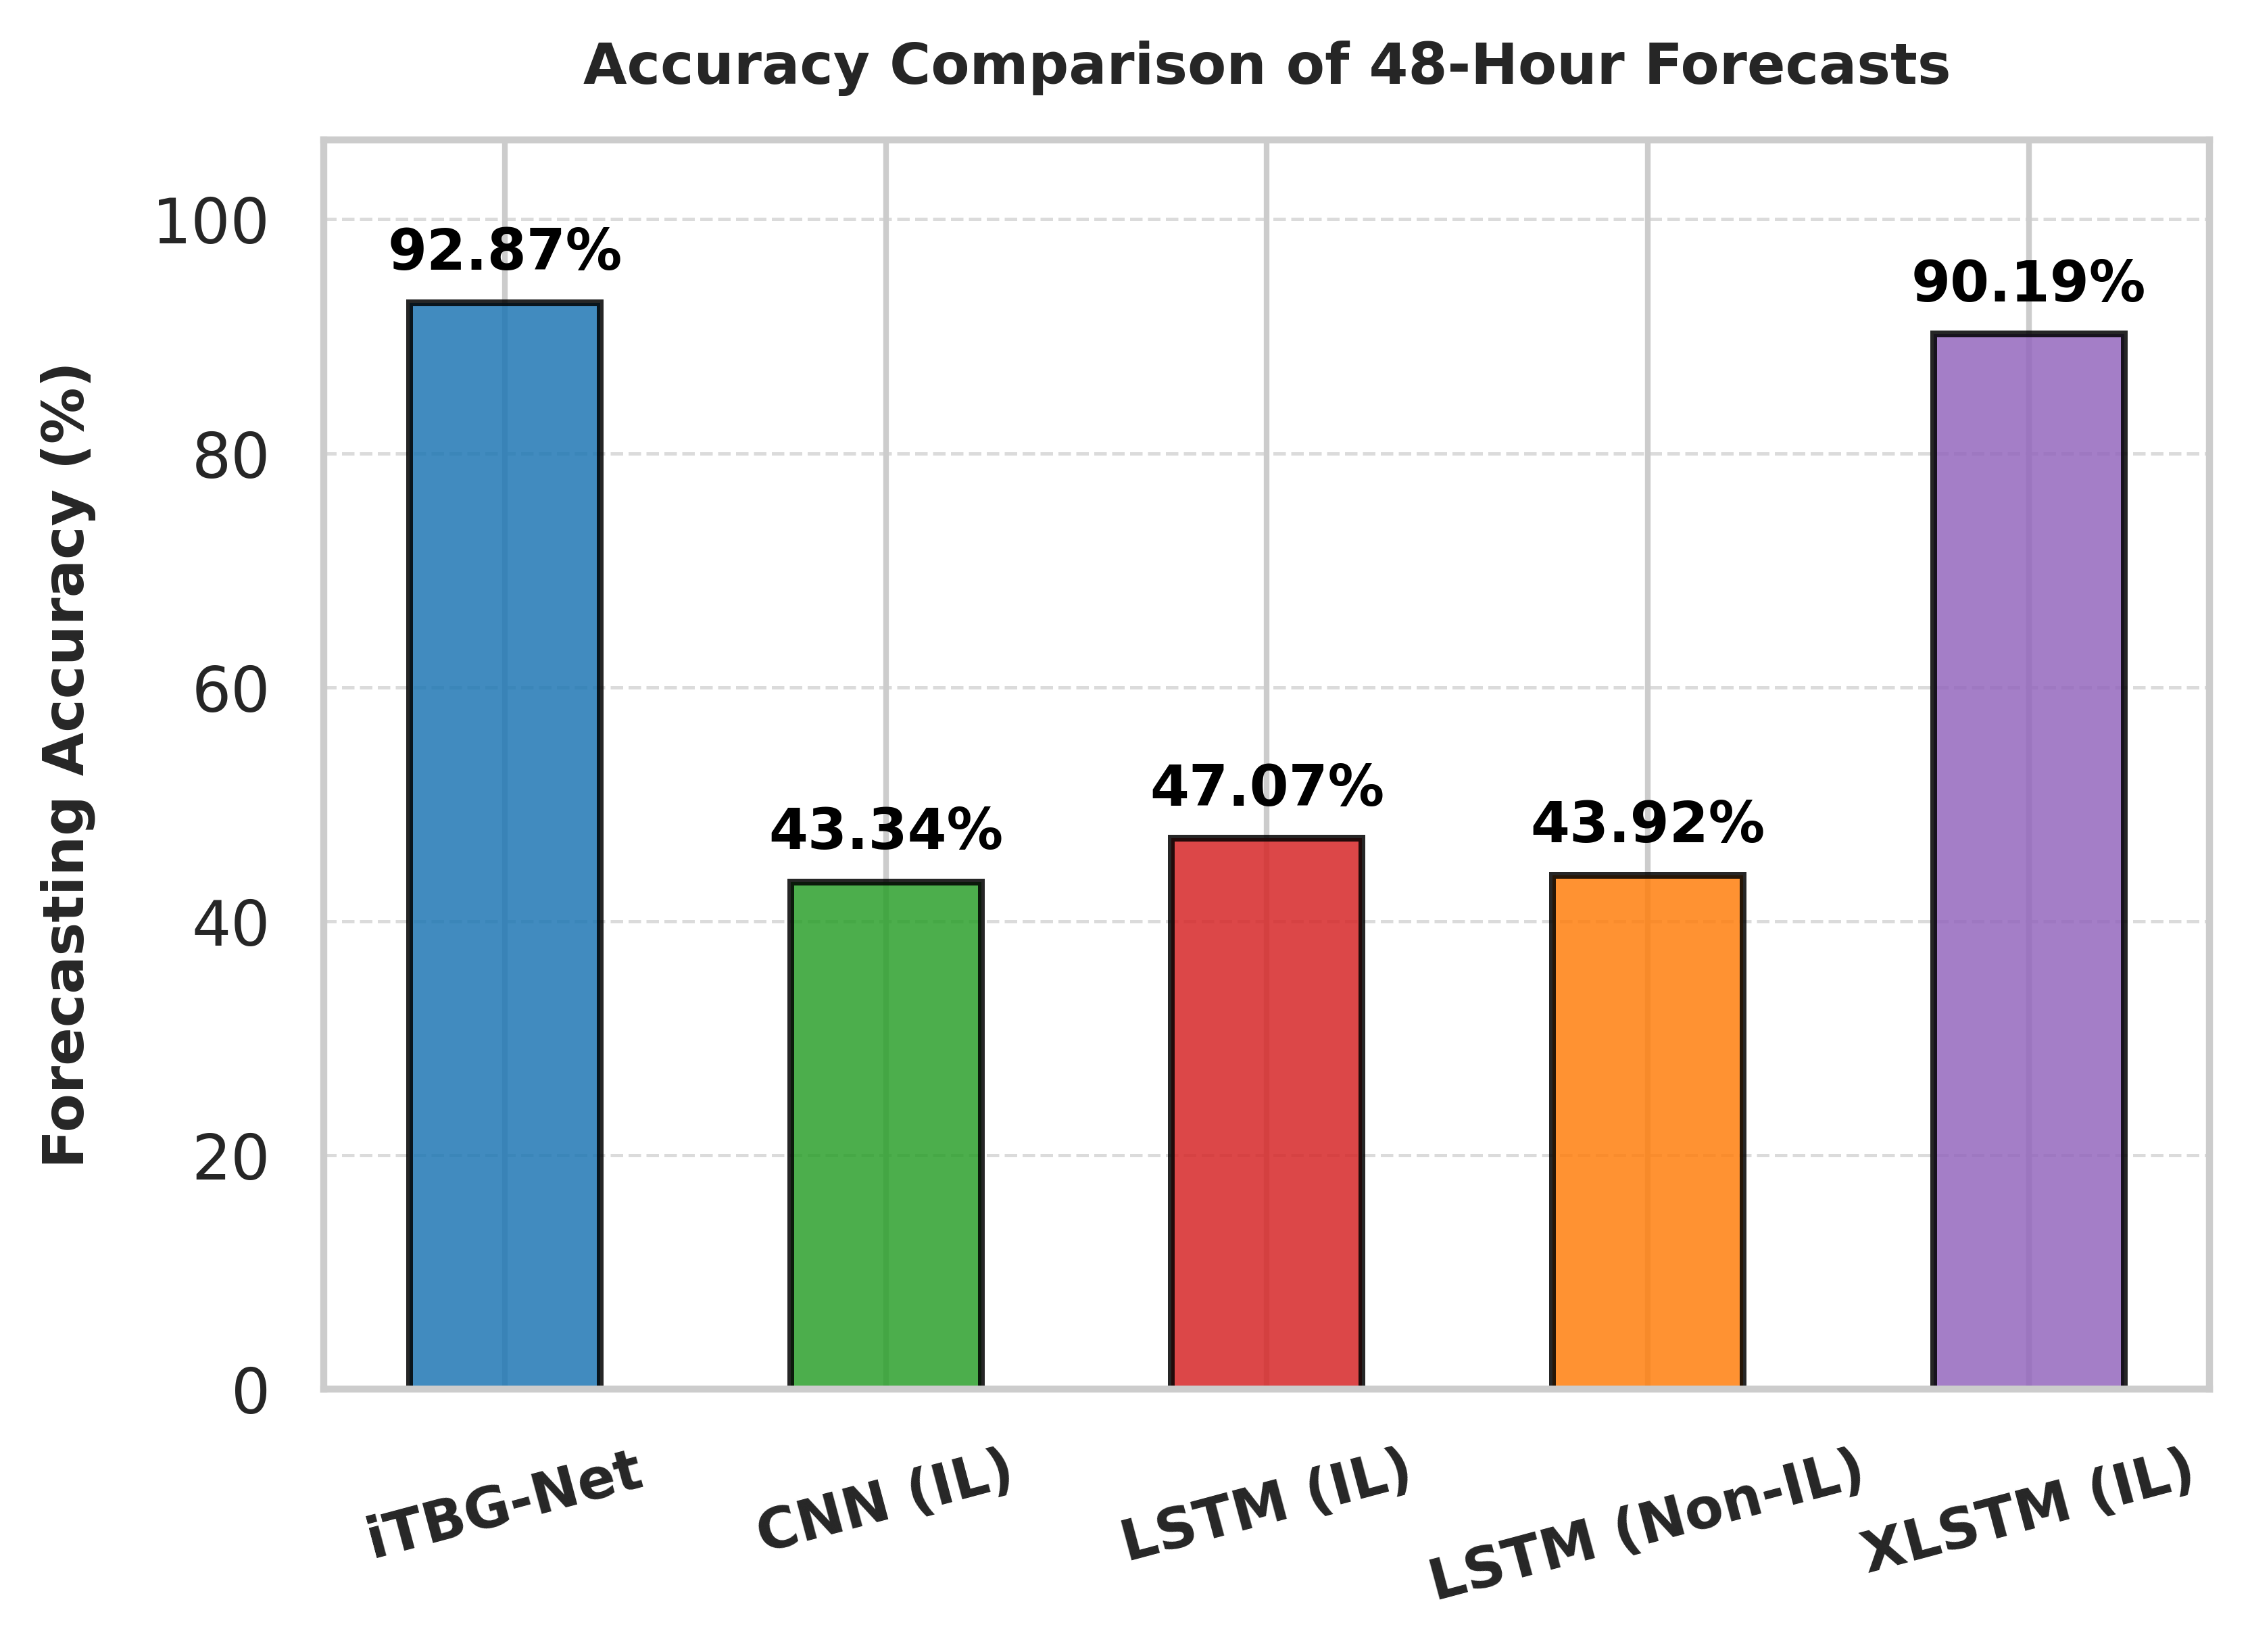

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names and forecasted values
models = {
    "iTBG-Net": hybrid_forecast,
    "CNN (IL)": cnn_forecast,
    "LSTM (IL)": lstm_forecast,
    "LSTM (Non-IL)": lstm_nonil_forecast,
    "XLSTM (IL)": xlstm_forecast,
}

# Define model colors
model_colors = {
    "iTBG-Net": "#1f77b4",  # Blue
    "CNN (IL)": "#2ca02c",  # Green
    "LSTM (IL)": "#d62728",  # Red
    "LSTM (Non-IL)": "#ff7f0e",  # Orange
    "XLSTM (IL)": "#9467bd",  # Purple
}

# Compute Forecasting Accuracy for each model
accuracy_values = {}
for model_name, forecast in models.items():
    accuracy = 100 * (1 - (np.sum(np.abs(actual_forecast - forecast)) / np.sum(np.abs(actual_forecast))))
    accuracy_values[model_name] = accuracy

# Create a bar chart with a professional design
plt.figure(figsize=(6, 4), dpi=600)  # High-resolution figure

bar_width = 0.5  # Thinner bars for better spacing
bars = plt.bar(accuracy_values.keys(), accuracy_values.values(),
               color=[model_colors[m] for m in accuracy_values.keys()], 
               edgecolor='black', linewidth=1.2, width=bar_width, alpha=0.85)

# Add value labels on top of each bar (formatted to 2 decimal places)
max_height = max(accuracy_values.values())  # Get the highest accuracy
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02 * max_height, 
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adjust upper limit to avoid values touching the border
plt.ylim(0, max_height * 1.15)  # Adding 15% extra space above the tallest bar

# Labels and title
plt.ylabel("Forecasting Accuracy (%)", fontsize=10, fontweight="bold", labelpad=10)
plt.title("Accuracy Comparison of 48-Hour Forecasts", fontsize=10, fontweight="bold", pad=10)

# Rotate x-axis labels for better readability and make them bold
plt.xticks(rotation=15, fontsize=10, fontweight="bold")

# Show grid only on the y-axis
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)

# Save the figure in high resolution
plt.savefig("Forecasting_Accuracy_BarChart.png", dpi=600, bbox_inches="tight")
plt.savefig("Forecasting_Accuracy_BarChart.eps", dpi=600, bbox_inches="tight")
plt.savefig("Forecasting_Accuracy_BarChart.pdf", dpi=600, bbox_inches="tight")

# Show plot
plt.show()

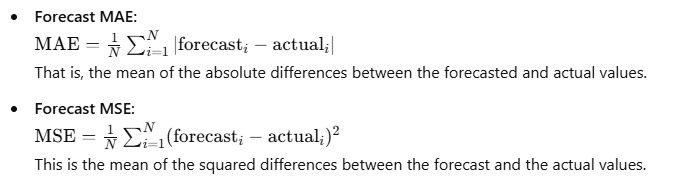

In [ ]:
#from IPython.display import display
#from PIL import Image
#image_path = "/kaggle/input/your-upload-folder/mae, mse formula.PNG"
#img = Image.open(image_path)
#isplay(img)


In [37]:
"""import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Helper Functions for Forecast Metrics
# -----------------------------
def forecast_mae(forecast, actual):
    return np.mean(np.abs(forecast - actual))

def forecast_mse(forecast, actual):
    return np.mean((forecast - actual)**2)

# -----------------------------
# Load Metrics for Each Model (using absolute paths)
# -----------------------------
hybrid_data     = np.load("/kaggle/working/hybrid_metrics.npz")
cnn_data        = np.load("/kaggle/working/cnn_metrics.npz")
lstm_data       = np.load("/kaggle/working/lstm_metrics.npz")
lstm_nonil_data = np.load("/kaggle/working/lstm_nonil_metrics.npz")
xlstm_data      = np.load("/kaggle/working/xlstm_metrics.npz")

# Extract forecast and actual variables for each model
hybrid_forecast = hybrid_data["forecast_pred"]
hybrid_actual   = hybrid_data["actual"]

cnn_forecast    = cnn_data["forecast_pred"]
cnn_actual      = cnn_data["actual"]

lstm_forecast   = lstm_data["forecast_pred"]
lstm_actual     = lstm_data["actual"]

lstm_nonil_forecast = lstm_nonil_data["forecast_pred"]
lstm_nonil_actual   = lstm_nonil_data["actual"]

xlstm_forecast  = xlstm_data["forecast_pred"]
xlstm_actual    = xlstm_data["actual"]

# For forecasting, we assume that the actual target is identical across models.
# (If not, adjust accordingly; here we use Hybrid's actual.)
actual_forecast = hybrid_actual

# -----------------------------
# Compute Forecast MAE and MSE for Each Model
# -----------------------------
hybrid_forecast_mae = forecast_mae(hybrid_forecast, hybrid_actual)
hybrid_forecast_mse = forecast_mse(hybrid_forecast, hybrid_actual)

cnn_forecast_mae = forecast_mae(cnn_forecast, cnn_actual)
cnn_forecast_mse = forecast_mse(cnn_forecast, cnn_actual)

lstm_forecast_mae = forecast_mae(lstm_forecast, lstm_actual)
lstm_forecast_mse = forecast_mse(lstm_forecast, lstm_actual)

lstm_nonil_forecast_mae = forecast_mae(lstm_nonil_forecast, lstm_nonil_actual)
lstm_nonil_forecast_mse = forecast_mse(lstm_nonil_forecast, lstm_nonil_actual)

xlstm_forecast_mae = forecast_mae(xlstm_forecast, xlstm_actual)
xlstm_forecast_mse = forecast_mse(xlstm_forecast, xlstm_actual)

# -----------------------------
# Create a Comparison DataFrame
# -----------------------------
df = pd.DataFrame({
    "Model": ["Proposed_iTBG-Net", "CNN", "LSTM Incremental", "LSTM Non-Incremental", "XLSTM"],
    "Forecast MAE": [hybrid_forecast_mae, cnn_forecast_mae, lstm_forecast_mae, lstm_nonil_forecast_mae, xlstm_forecast_mae],
    "Forecast MSE": [hybrid_forecast_mse, cnn_forecast_mse, lstm_forecast_mse, lstm_nonil_forecast_mse, xlstm_forecast_mse],
})

print("Forecast Comparison Metrics:")
print(df)

# -----------------------------
# Plot Comparison of Forecast MAE and MSE
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Forecast MAE Bar Chart
axs[0].bar(df["Model"], df["Forecast MAE"], color='skyblue', edgecolor='black')
axs[0].set_title("Forecast MAE")
axs[0].set_ylabel("MAE")
axs[0].set_ylim(0, df["Forecast MAE"].max() * 1.15)
for i, v in enumerate(df["Forecast MAE"]):
    axs[0].text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

# Forecast MSE Bar Chart
axs[1].bar(df["Model"], df["Forecast MSE"], color='salmon', edgecolor='black')
axs[1].set_title("Forecast MSE")
axs[1].set_ylabel("MSE")
axs[1].set_ylim(0, df["Forecast MSE"].max() * 1.15)
for i, v in enumerate(df["Forecast MSE"]):
    axs[1].text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

for ax in axs:
    ax.tick_params(axis='x', labelrotation=20)
    ax.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("/kaggle/working/forecast_comparison.png", dpi=300)
plt.savefig("/kaggle/working/forecast_comparison.eps", format='eps')
plt.show()
"""

'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# -----------------------------\n# Helper Functions for Forecast Metrics\n# -----------------------------\ndef forecast_mae(forecast, actual):\n    return np.mean(np.abs(forecast - actual))\n\ndef forecast_mse(forecast, actual):\n    return np.mean((forecast - actual)**2)\n\n# -----------------------------\n# Load Metrics for Each Model (using absolute paths)\n# -----------------------------\nhybrid_data     = np.load("/kaggle/working/hybrid_metrics.npz")\ncnn_data        = np.load("/kaggle/working/cnn_metrics.npz")\nlstm_data       = np.load("/kaggle/working/lstm_metrics.npz")\nlstm_nonil_data = np.load("/kaggle/working/lstm_nonil_metrics.npz")\nxlstm_data      = np.load("/kaggle/working/xlstm_metrics.npz")\n\n# Extract forecast and actual variables for each model\nhybrid_forecast = hybrid_data["forecast_pred"]\nhybrid_actual   = hybrid_data["actual"]\n\ncnn_forecast    = cnn_data["forecast_pred"]\ncnn_actual

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
                    Model       MAE       MSE
0       Proposed iTBG-Net  0.035327  0.002996
1       CNN (Incremental)  0.294640  0.126673
2      LSTM (Incremental)  0.263216  0.108971
3  LSTM (Non-Incremental)  0.244592  0.080902
4     XLSTM (Incremental)  0.051038  0.004043


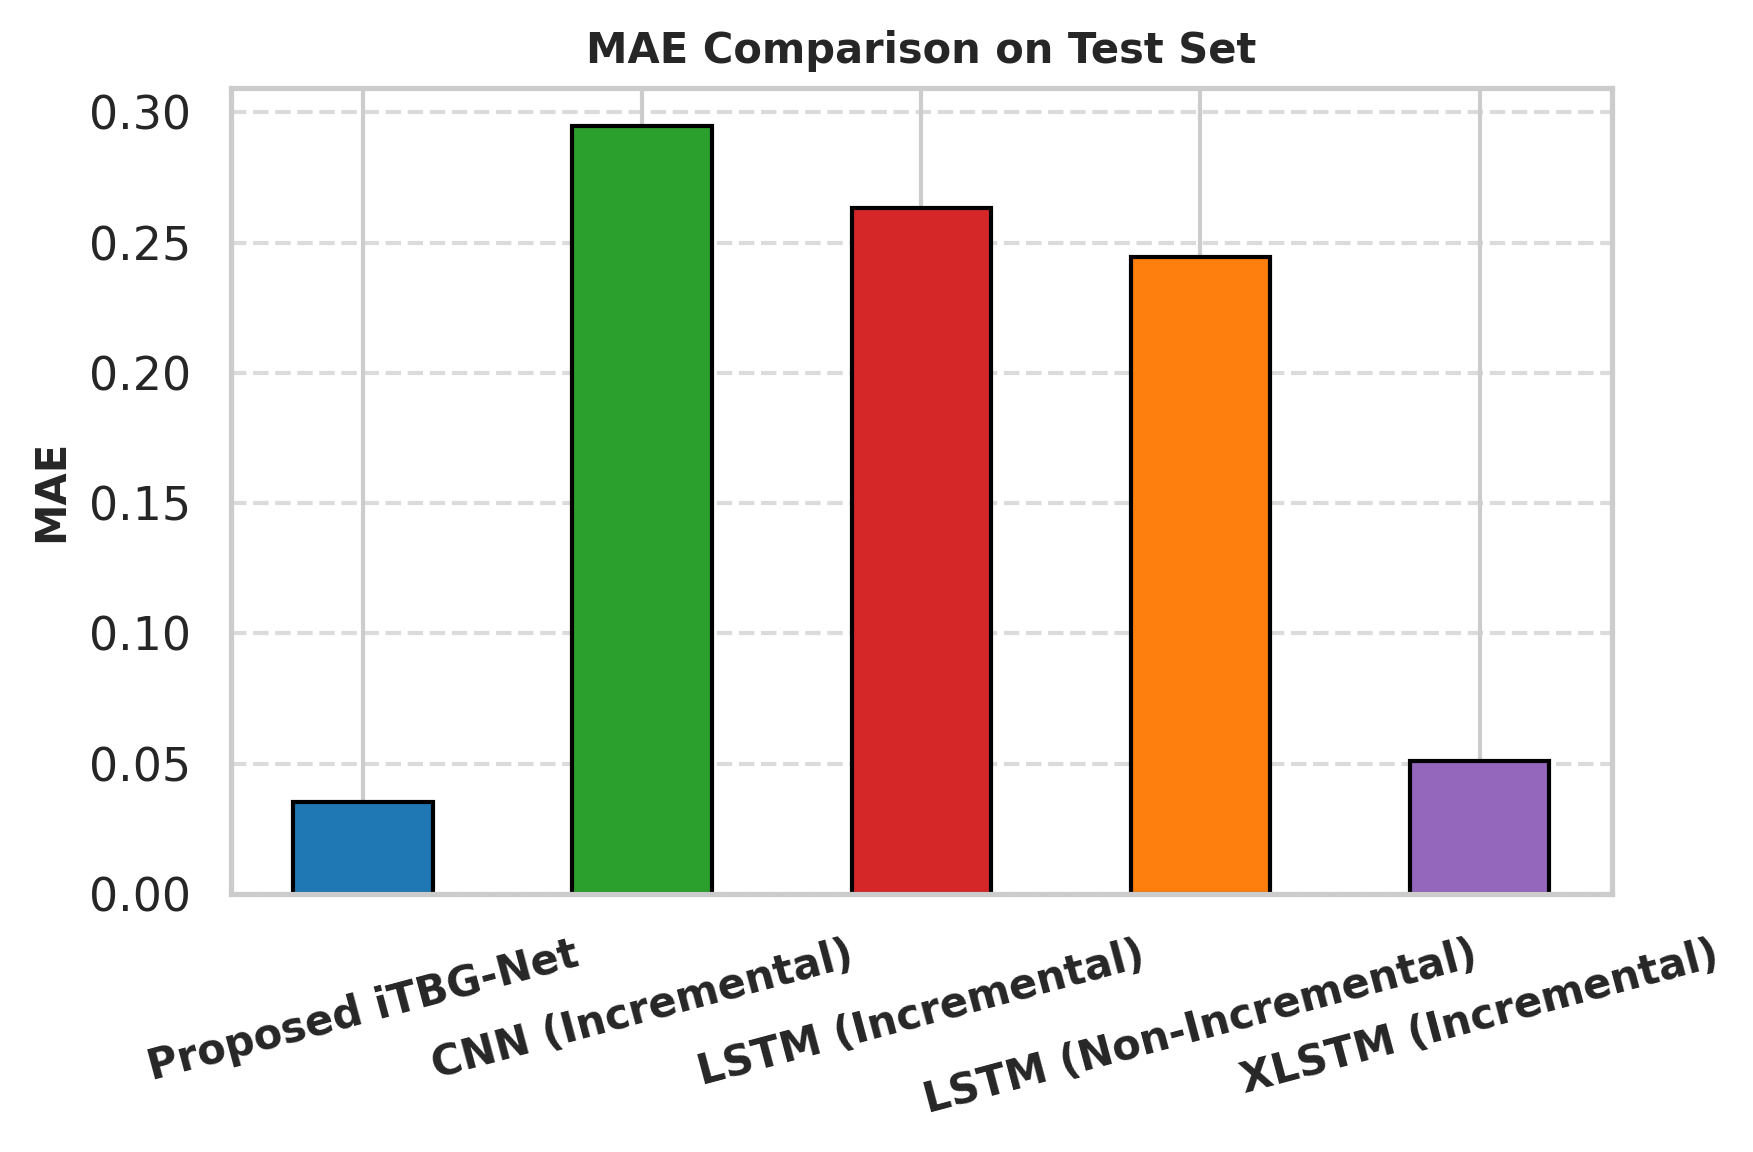

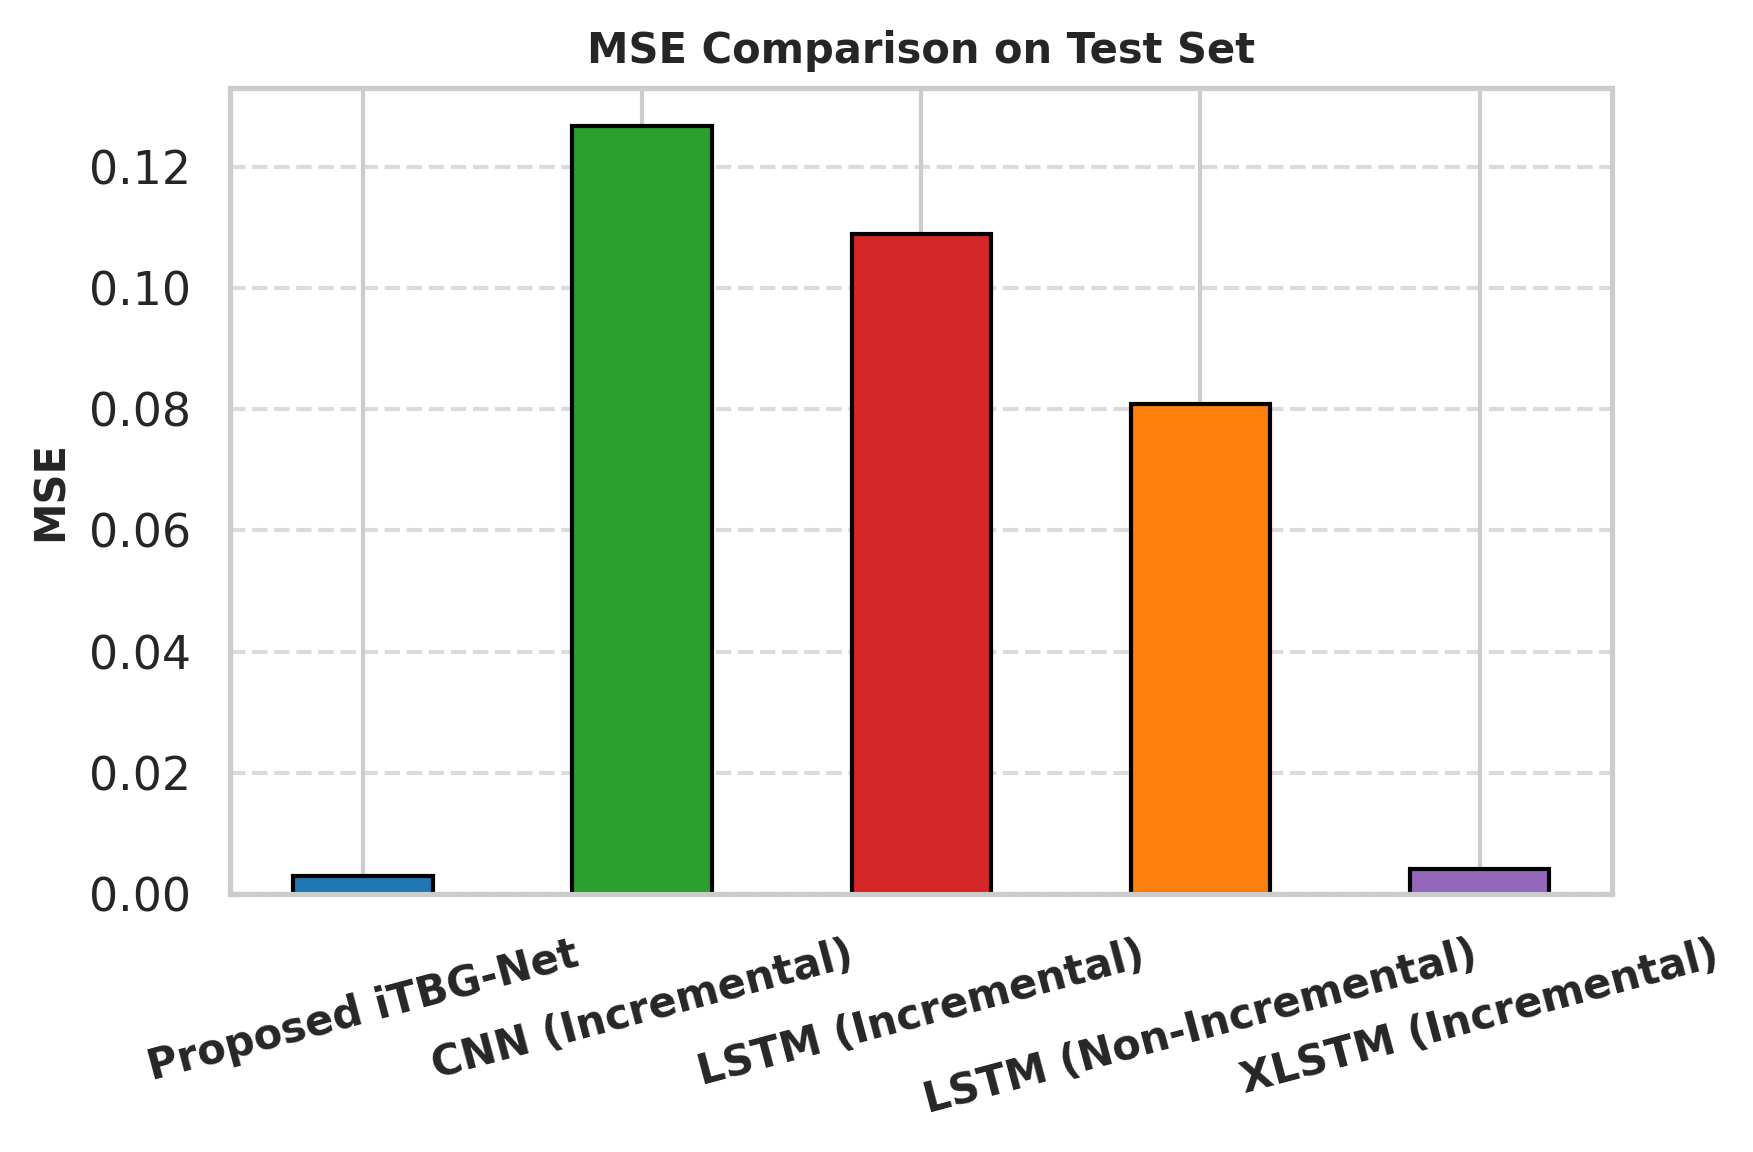

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# -----------------------------
# 1. Data Preprocessing & Test Set Extraction
# -----------------------------
data = pd.read_csv('/kaggle/input/integrated-energy-management-and-forecasting/Integrated Energy Management and Forecasting Dataset.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values('Timestamp', inplace=True)

features = ['Energy_Demand']
scaler = MinMaxScaler()
data_features = scaler.fit_transform(data[features].values)

sequence_length = 48
prediction_length = 48

# Create sliding-window sequences and labels.
sequences = []
labels = []
for i in range(len(data_features) - sequence_length - prediction_length + 1):
    seq = data_features[i:i+sequence_length]
    label = data_features[i+sequence_length:i+sequence_length+prediction_length]
    sequences.append(seq)
    labels.append(label)
sequences = np.array(sequences)  # shape: (N, 48, 1)
labels = np.array(labels)        # shape: (N, 48, 1)

# Use the final sequence as test input and ground truth.
test_sequence = sequences[-1:]         # shape: (1, 48, 1)
test_target = labels[-1:].flatten()      # shape: (48,)

# -----------------------------
# 2. Define Custom Objects for Keras Model Loading
# -----------------------------
class GetItem(tf.keras.layers.Layer):
    def __init__(self, index=slice(None, None, None), **kwargs):
        super(GetItem, self).__init__(**kwargs)
        self.index = index
    def call(self, inputs):
        return inputs[self.index]
    def get_config(self):
        config = super(GetItem, self).get_config()
        config.update({"index": (self.index.start, self.index.stop, self.index.step)})
        return config

def r2(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

def clipped_mape(y_true, y_pred):
    epsilon = 1e-3
    y_true_clipped = tf.maximum(y_true, epsilon)
    return tf.reduce_mean(tf.abs((y_true - y_pred)/y_true_clipped))*100

custom_objects = {
    "clipped_mape": clipped_mape,
    "r2": r2,
    "r2_metric": tf.keras.metrics.MeanMetricWrapper(r2, name="r2"),
    "GetItem": GetItem
}

# -----------------------------
# 3. Use In-Memory Models for Fresh Prediction
# -----------------------------
# These model objects are assumed to be already available from training:
# - lightweight_model for iTBG-Net (Hybrid model)
# - cnn_model for the CNN incremental model
# - lstm_model for the LSTM incremental model
# - lstm_model_nonil for the LSTM non-incremental model
# - modelxlstm for the XLSTM incremental model (PyTorch)

# For Keras models, use predict().
hybrid_pred = hybrid_model_tcn_gru_lstm.predict(test_sequence)[0].flatten()
cnn_pred    = cnn_model.predict(test_sequence)[0].flatten()
lstm_inc_pred = lstm_model.predict(test_sequence)[0].flatten()
lstm_noninc_pred = lstm_model_nonil.predict(test_sequence)[0].flatten()

# For the XLSTM model (PyTorch), move model and input to the proper device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelxlstm.to(device)
test_tensor = torch.tensor(test_sequence, dtype=torch.float32).to(device)  # shape: (1, 48, 1)
modelxlstm.eval()
with torch.no_grad():
    xlstm_pred = modelxlstm(test_tensor).cpu().numpy().flatten()

# -----------------------------
# 4. Compute MAE and MSE for Each Model
# -----------------------------
def compute_metrics(forecast, actual):
    forecast = forecast.flatten()
    actual = actual.flatten()
    mae = np.mean(np.abs(forecast - actual))
    mse = np.mean((forecast - actual)**2)
    return mae, mse

hybrid_mae, hybrid_mse = compute_metrics(hybrid_pred, test_target)
cnn_mae, cnn_mse       = compute_metrics(cnn_pred, test_target)
lstm_inc_mae, lstm_inc_mse = compute_metrics(lstm_inc_pred, test_target)
lstm_noninc_mae, lstm_noninc_mse = compute_metrics(lstm_noninc_pred, test_target)
xlstm_mae, xlstm_mse   = compute_metrics(xlstm_pred, test_target)

# -----------------------------
# 5. Create Comparison DataFrame
# -----------------------------
df = pd.DataFrame({
    "Model": ["Proposed iTBG-Net", "CNN (Incremental)", "LSTM (Incremental)", "LSTM (Non-Incremental)", "XLSTM (Incremental)"],
    "MAE": [hybrid_mae, cnn_mae, lstm_inc_mae, lstm_noninc_mae, xlstm_mae],
    "MSE": [hybrid_mse, cnn_mse, lstm_inc_mse, lstm_noninc_mse, xlstm_mse]
})
print(df)

# Define bar plot parameters.
x = np.arange(len(df["Model"]))
bar_width = 0.5
colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd"]

# -----------------------------
# 6. Save MAE Plot as a Separate Figure
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.bar(x, df["MAE"], color=colors, width=bar_width, edgecolor="black")
plt.title("MAE Comparison on Test Set", fontsize=10, fontweight="bold")
plt.ylabel("MAE", fontsize=10, fontweight="bold")
plt.xticks(x, df["Model"], rotation=15, fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("/kaggle/working/mae_comparison.png", dpi=300, bbox_inches="tight")
plt.savefig("/kaggle/working/mae_comparison.eps", dpi=300, bbox_inches="tight")
plt.show()

# -----------------------------
# 7. Save MSE Plot as a Separate Figure
# -----------------------------
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.bar(x, df["MSE"], color=colors, width=bar_width, edgecolor="black")
plt.title("MSE Comparison on Test Set", fontsize=10, fontweight="bold")
plt.ylabel("MSE", fontsize=10, fontweight="bold")
plt.xticks(x, df["Model"], rotation=15, fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("/kaggle/working/mse_comparison.png", dpi=300, bbox_inches="tight")
plt.savefig("/kaggle/working/mse_comparison.eps", dpi=300, bbox_inches="tight")
plt.show()
